<a href="https://colab.research.google.com/github/Dubious14/MY-Sberbank-Housing-Market-Project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
print("Please upload the train file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

try:
    train_original = pd.read_csv(file_name)
    print(f"\nFile '{file_name}' uploaded successfully!\n")
except Exception as e:
    print(f"Error reading the file: {e}")
    raise

Please upload the train file:


Saving train.csv to train.csv

File 'train.csv' uploaded successfully!



In [ ]:
print("Please upload the test file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

try:
    test_original = pd.read_csv(file_name)
    print(f"\nFile '{file_name}' uploaded successfully!\n")
except Exception as e:
    print(f"Error reading the file: {e}")
    raise

Please upload the test file:


Saving test.csv to test.csv

File 'test.csv' uploaded successfully!



In [ ]:
train = train_original.copy()
test = test_original.copy()



In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
train.describe(include='all')



id   timestamp       full_sq       life_sq         floor     max_floor      material    build_year      num_room      kitch_sq         state product_type             sub_area        area_m    raion_popul  green_zone_part   indust_part  children_preschool  preschool_quota  preschool_education_centers_raion  children_school  school_quota  school_education_centers_raion  school_education_centers_top_20_raion  hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  sport_objects_raion  additional_education_raion culture_objects_top_25  culture_objects_top_25_raion  shopping_centers_raion  office_raion thermal_power_plant_raion incineration_raion oil_chemistry_raion radiation_raion railroad_terminal_raion big_market_raion nuclear_reactor_raion detention_facility_raion      full_all         male_f       female_f     young_all    young_male  young_female       work_all     work_male   work_female     ekder_all    ekder_male  ekder_female       0_6_all  \
count   30471.000000       30471  30471.000000  24088.000000  30304.000000  20899.000000  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000        30471                30471  3.047100e+04   30471.000000     30471.000000  30471.000000        30471.000000     23783.000000                       30471.000000     30471.000000  23786.000000                    30471.000000                           30471.000000         16030.000000              30471.000000             30471.000000         30471.000000                30471.000000                  30471                  30471.000000            30471.000000  30471.000000                     30471              30471               30471           30471                   30471            30471                 30471                    30471  3.047100e+04   30471.000000   30471.000000  30471.000000  30471.000000  30471.000000   30471.000000  30471.000000  30471.000000  30471.000000  30471.000000  30471.000000  30471.000000   
unique           NaN        1161           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN            2                  146           NaN            NaN              NaN           NaN                 NaN              NaN                                NaN              NaN           NaN                             NaN                                    NaN                  NaN                       NaN                      NaN                  NaN                         NaN                      2                           NaN                     NaN           NaN                         2                  2                   2               2                       2                2                     2                        2           NaN            NaN            NaN           NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN           NaN           NaN   
top              NaN  2014-12-16           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN   Investment  Poselenie Sosenskoe           NaN            NaN              NaN           NaN                 NaN              NaN                                NaN              NaN           NaN                             NaN                                    NaN                  NaN                       NaN                      NaN                  NaN                         NaN                     no                           NaN                     NaN           NaN                        no                 no                  no              no                      no               no                    no                       no           NaN            NaN            NaN           NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN           NaN           NaN   
freq             NaN         160  

In [ ]:
# Apply log transformation to `price_doc`

train['log_price_doc'] = np.log1p(train['price_doc'])

In [ ]:
train = train_original.copy()
test = test_original.copy()
train['log_price_doc'] = np.log1p(train['price_doc'])

In [ ]:
columns_to_replace = ["full_sq", "life_sq", "material", "num_room", "kitch_sq", "max_floor"]
train[columns_to_replace] = train[columns_to_replace].replace(0, np.nan)
test[columns_to_replace] = test[columns_to_replace].replace(0, np.nan)


replace = {117:17, 99:np.nan}
train['max_floor'].replace(to_replace = replace, inplace = True)

<ipython-input-9-4d33a252c417>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['max_floor'].replace(to_replace = replace, inplace = True)


In [ ]:
# cheking built_year

# print(train["build_year"].dropna().sort_values().head(50))

replace = {215:2015, 0:np.nan, 1:np.nan, 3:np.nan, 20:np.nan, 71:np.nan}
train['build_year'].replace(to_replace = replace, inplace = True)


<ipython-input-10-7ee61984b901>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['build_year'].replace(to_replace = replace, inplace = True)


In [ ]:
# print(train["build_year"].dropna().sort_values(ascending=False).head(50))
# saw an extreme value in the describe
train.loc[train["build_year"] == 20052009, "build_year"] = 2005
train.loc[train["build_year"] == 4965, "build_year"] = 1965

# then saw 2018 which led us think that there were transaction that were taken before the house building was completed so we created a binary feature
# train.loc[train["build_year"].notna(), "pre_sale"] = (train["build_year"] > train["timestamp"].dt.year).astype(int)
# we will create it only after treating na values in build_year


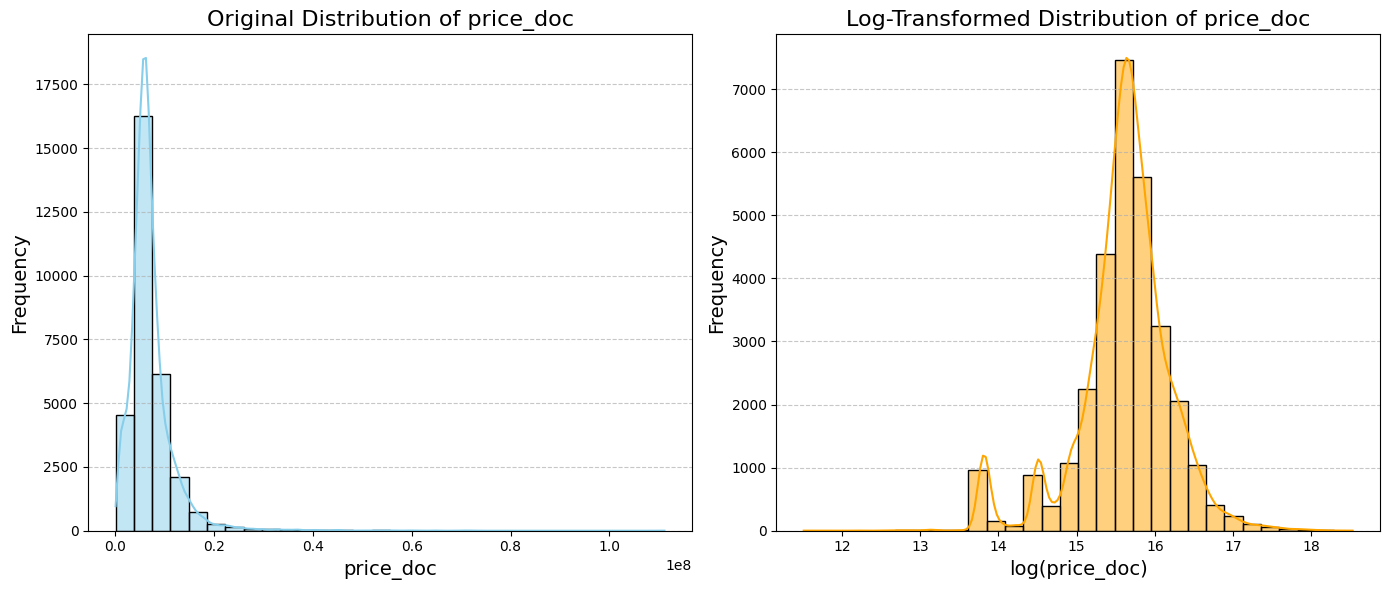

In [ ]:
plt.figure(figsize=(14, 6))

# Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(train['price_doc'], kde=True, bins=30, color='skyblue')
plt.title('Original Distribution of price_doc', fontsize=16)
plt.xlabel('price_doc', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Log-Transformed Distribution
plt.subplot(1, 2, 2)
sns.histplot(train['log_price_doc'], kde=True, bins=30, color='orange')
plt.title('Log-Transformed Distribution of price_doc', fontsize=16)
plt.xlabel('log(price_doc)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# train.drop(columns=['price_doc'], inplace=True)
# train.rename(columns={'log_price_doc': 'price_doc'}, inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)

# Display the column names and their data types
column_types = train.dtypes.reset_index()
column_types.columns = ['Column', 'Data Type']

# Print the result
print(column_types)

# Reset display option if needed
pd.reset_option('display.max_rows')

                                    Column Data Type
0                                       id     int64
1                                timestamp    object
2                                  full_sq   float64
3                                  life_sq   float64
4                                    floor   float64
5                                max_floor   float64
6                                 material   float64
7                               build_year   float64
8                                 num_room   float64
9                                 kitch_sq   float64
10                                   state   float64
11                            product_type    object
12                                sub_area    object
13                                  area_m   float64
14                             raion_popul     int64
15                         green_zone_part   float64
16                             indust_part   float64
17                      children_preschool    

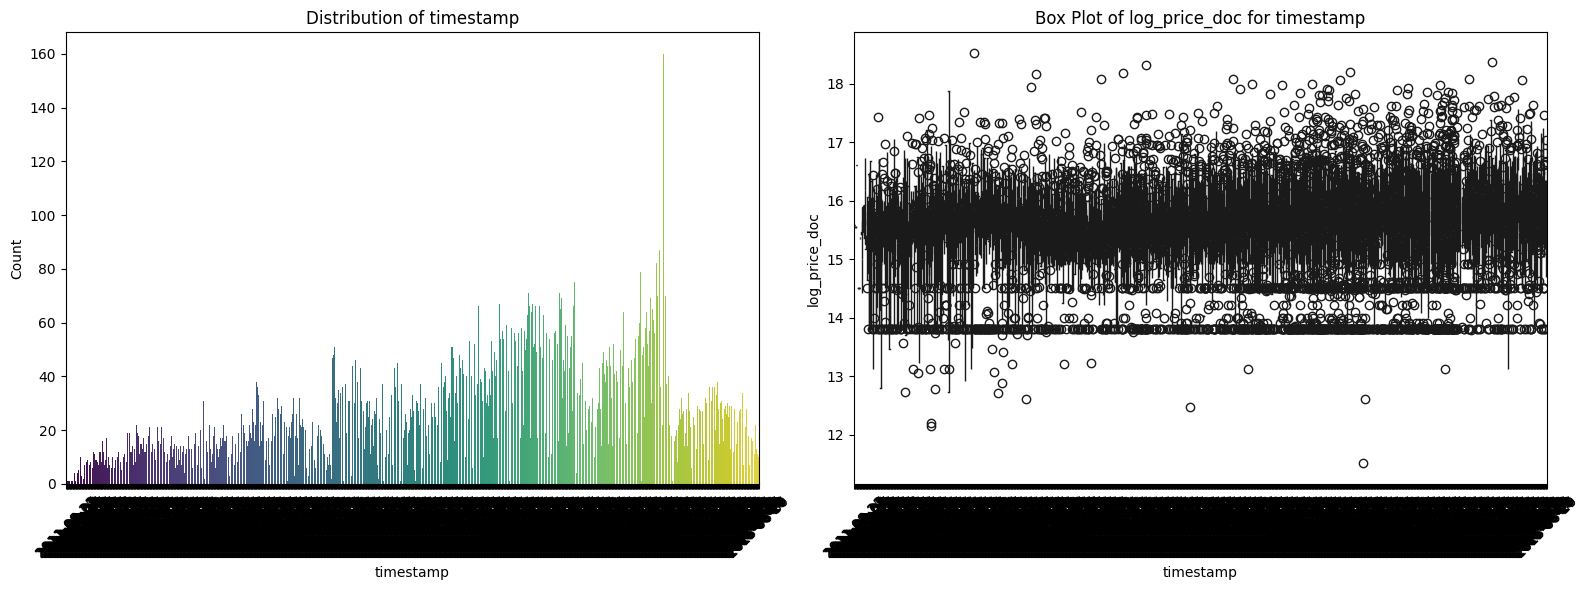

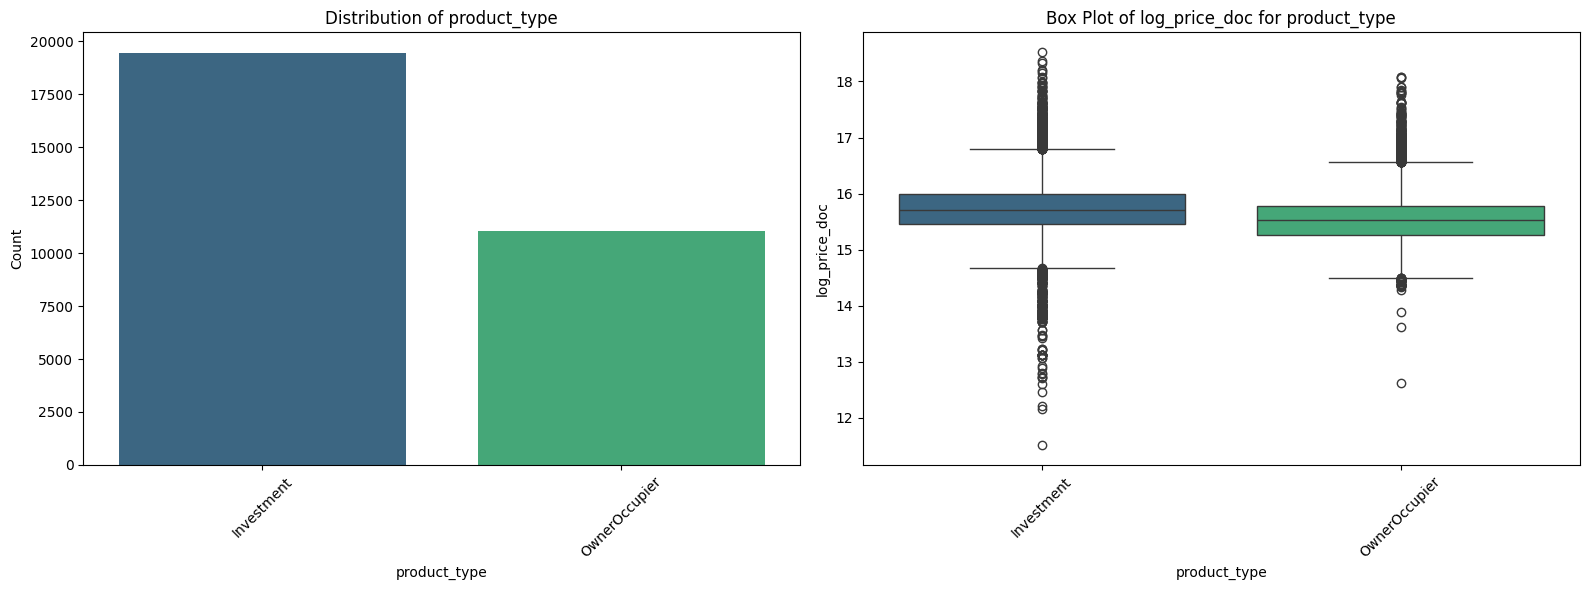

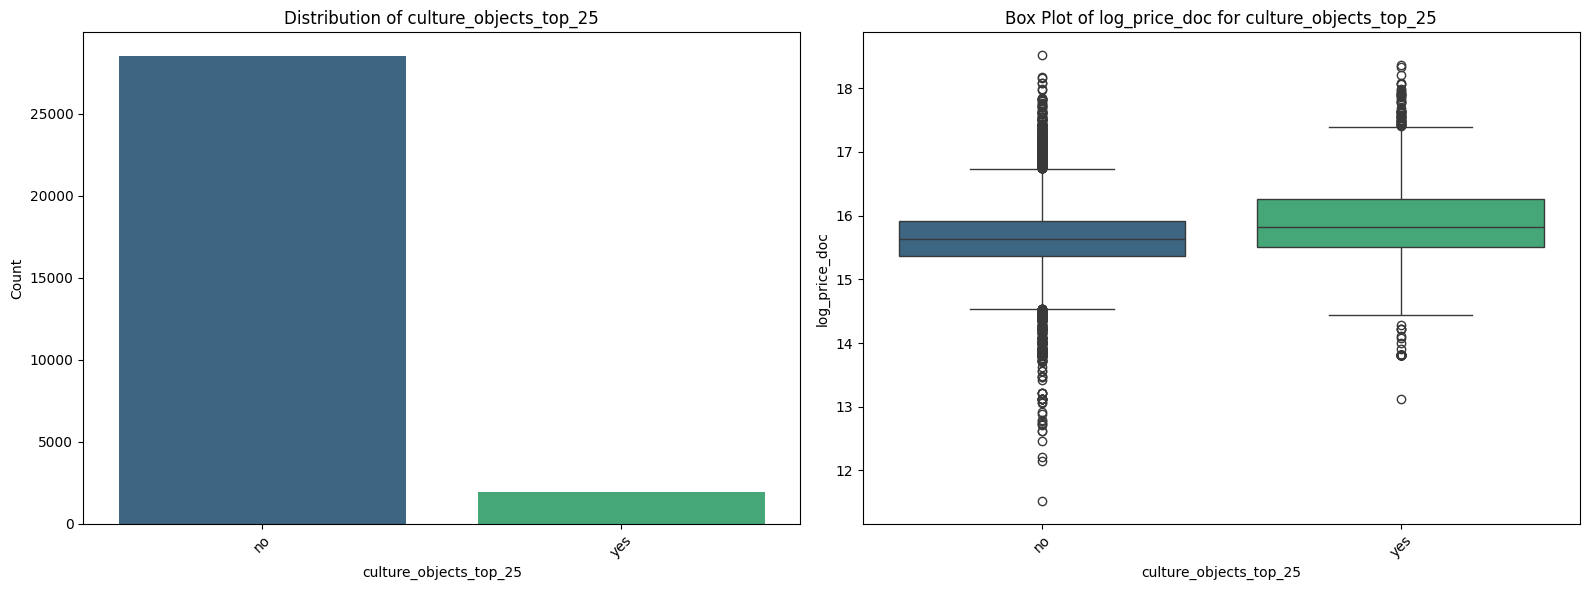

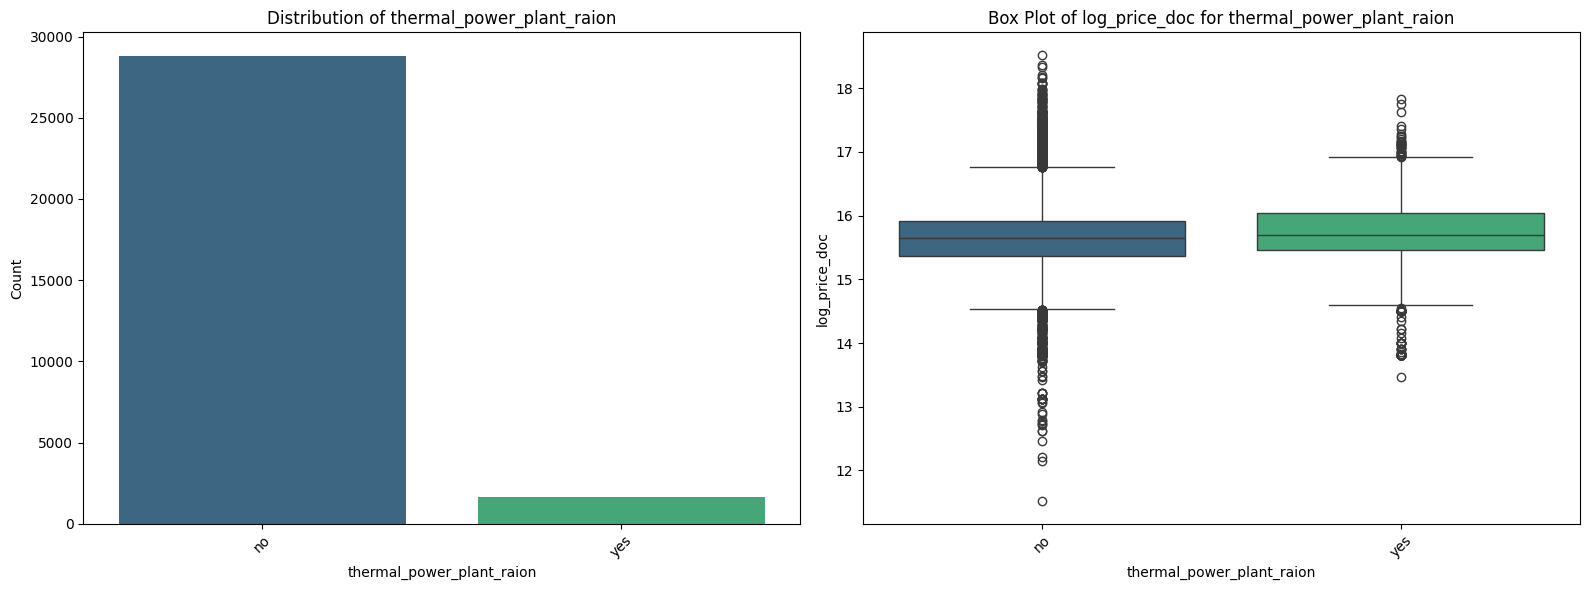

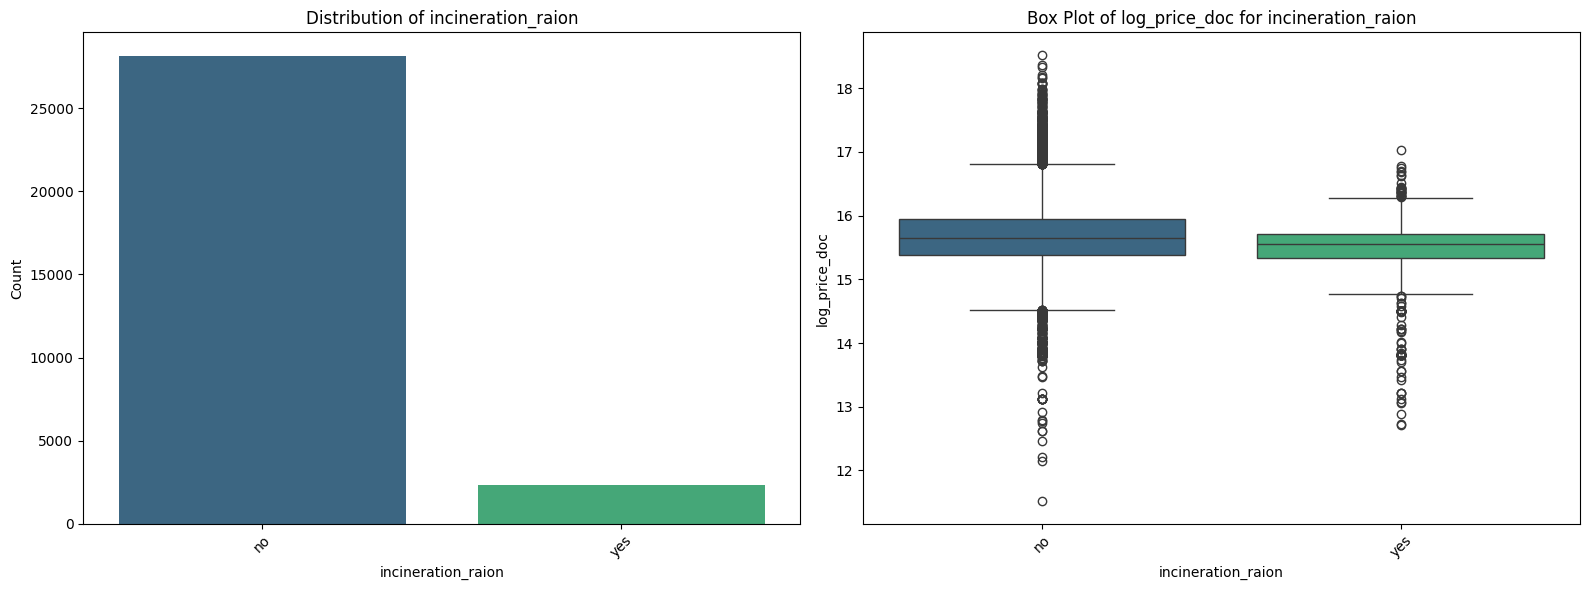

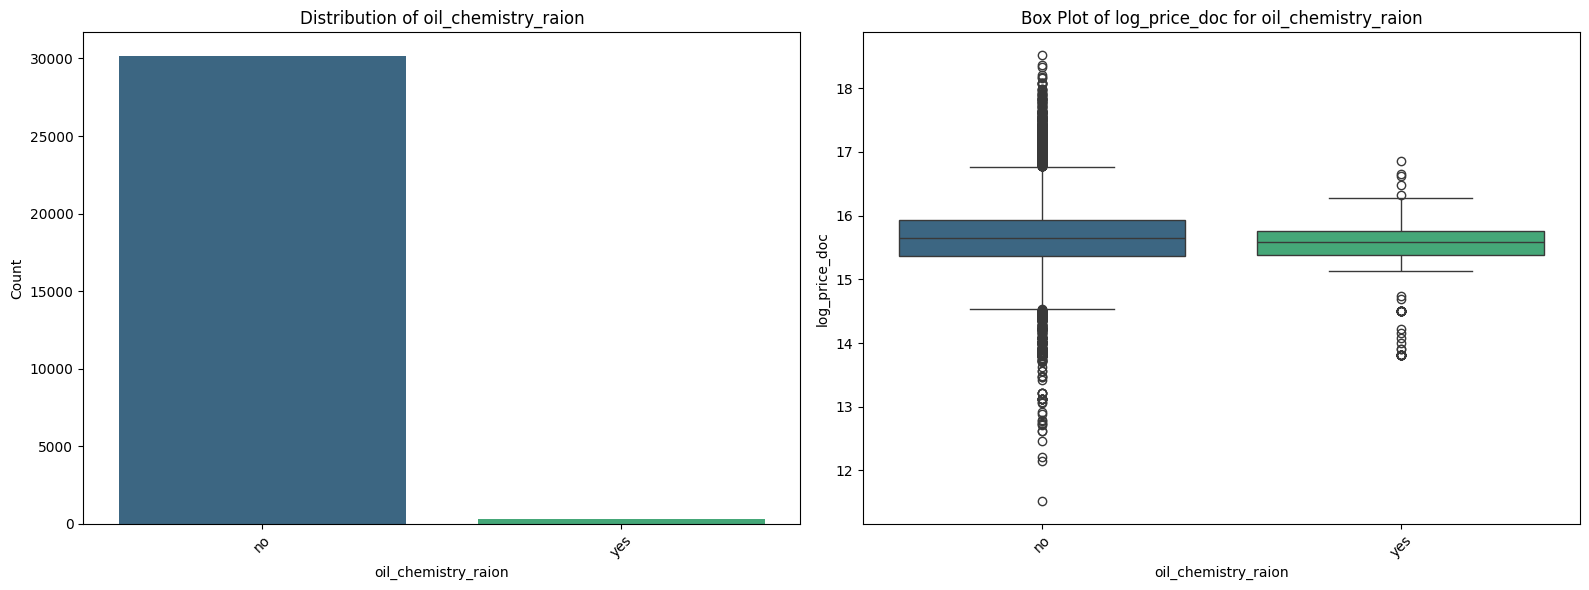

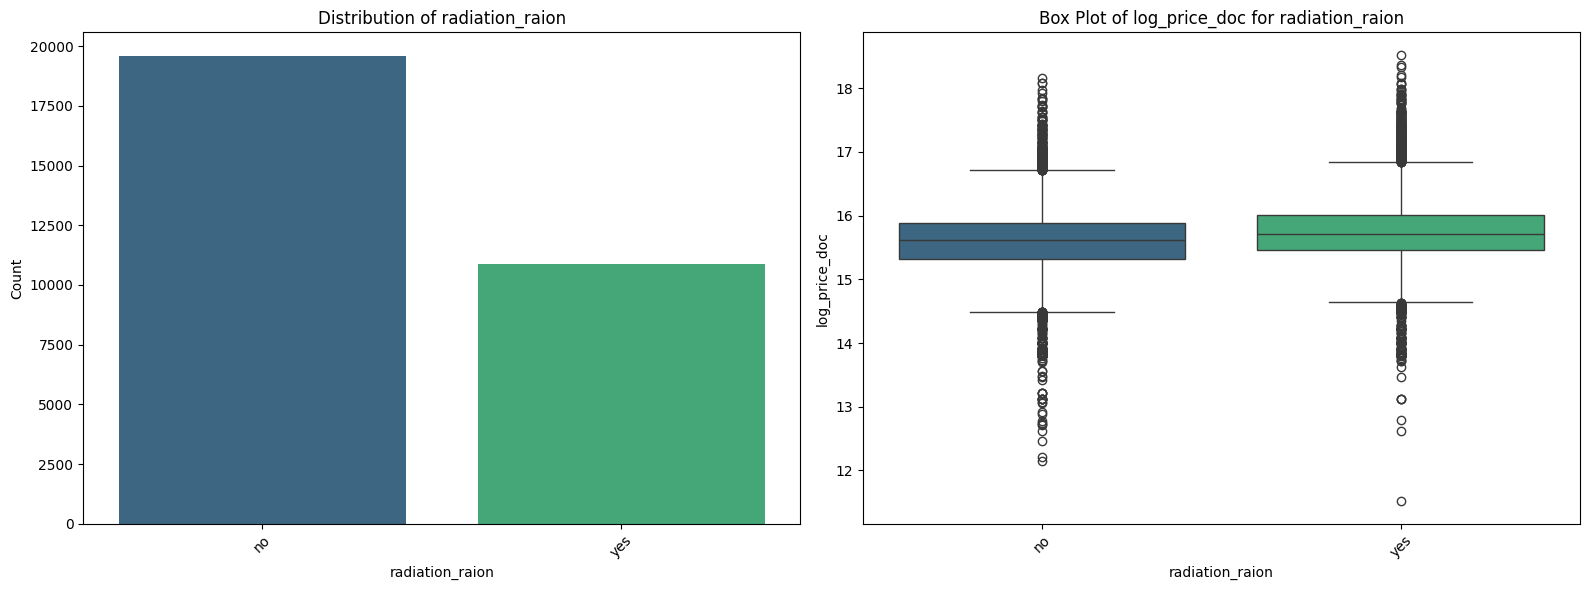

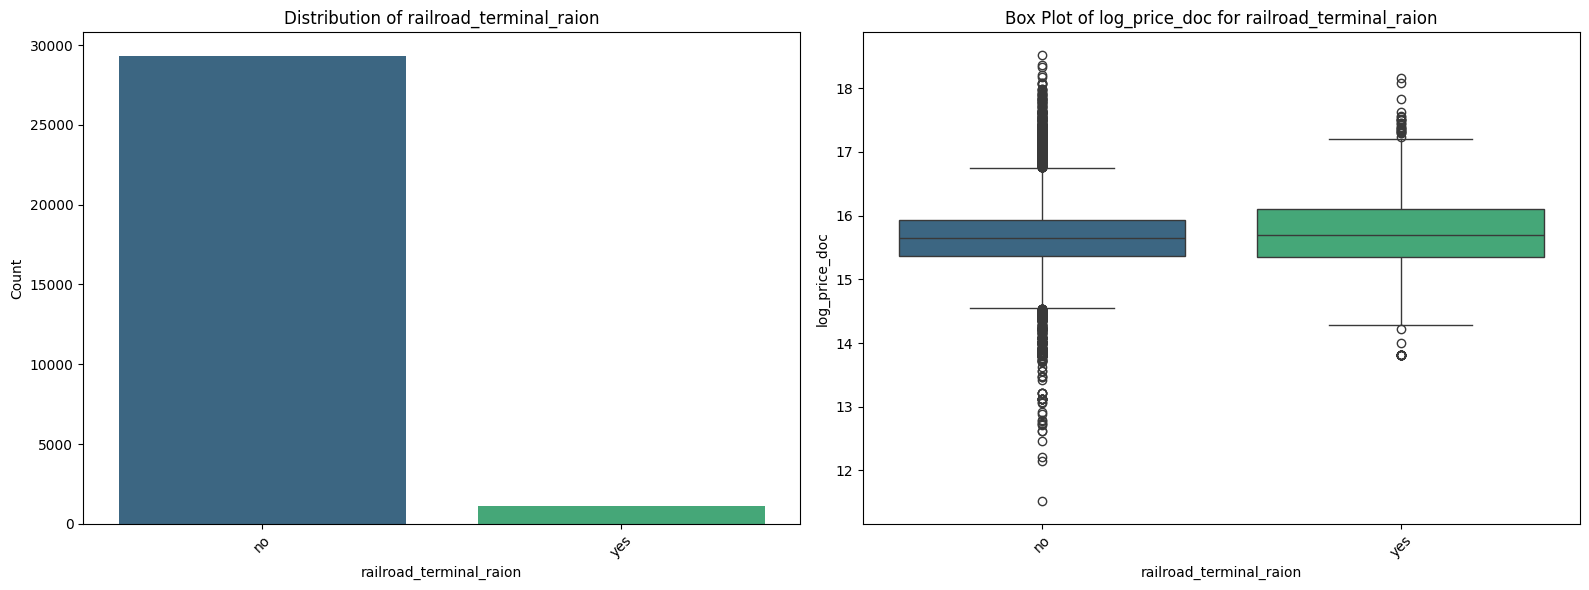

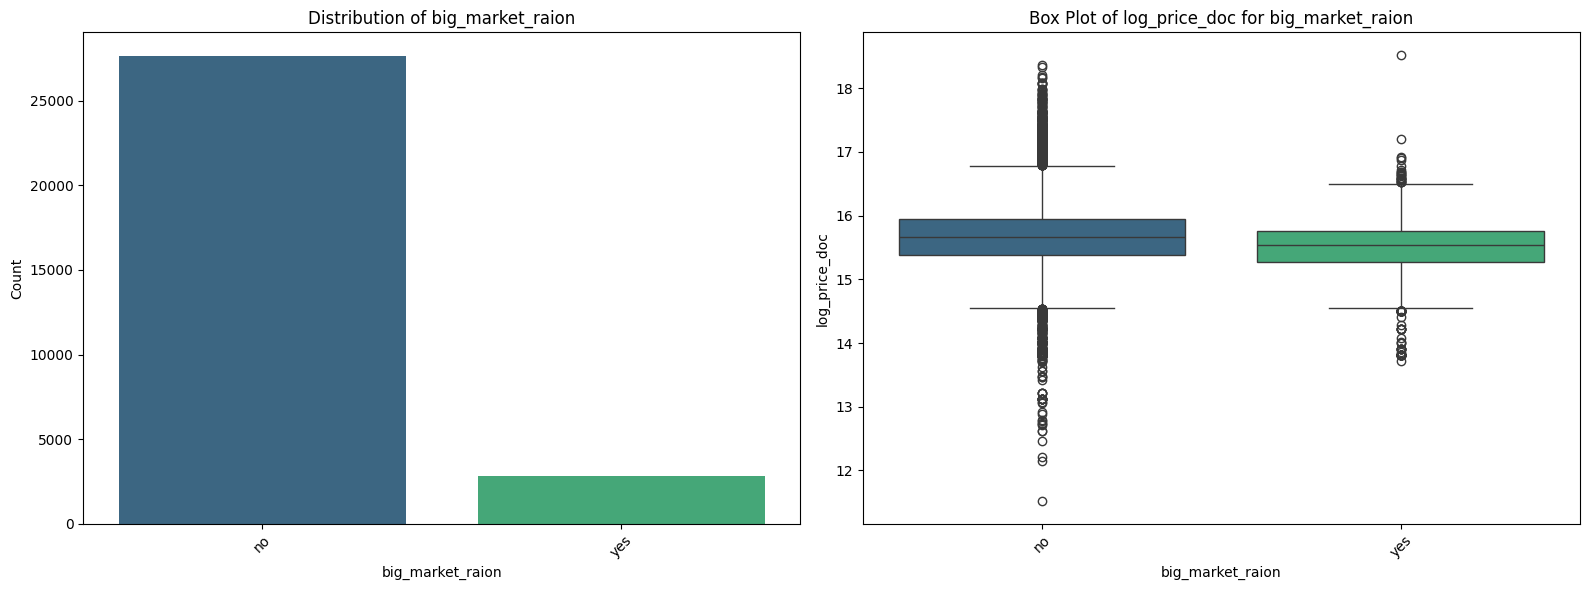

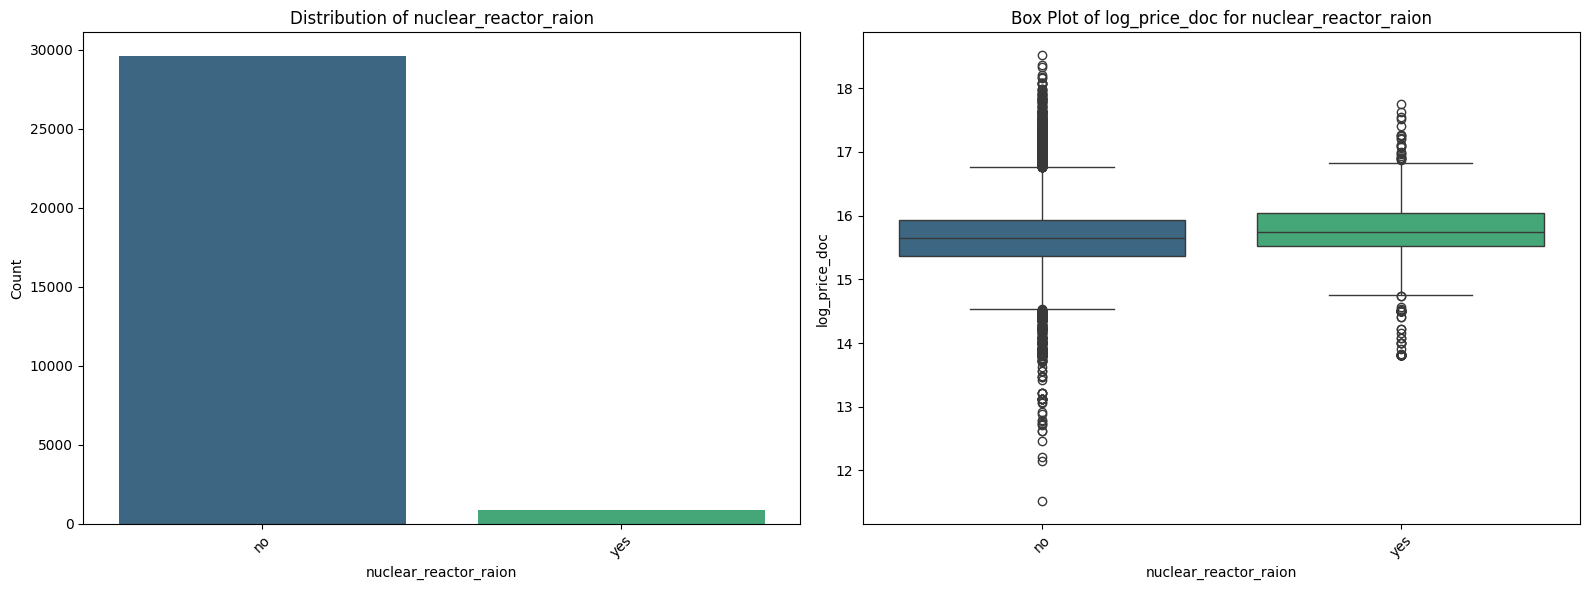

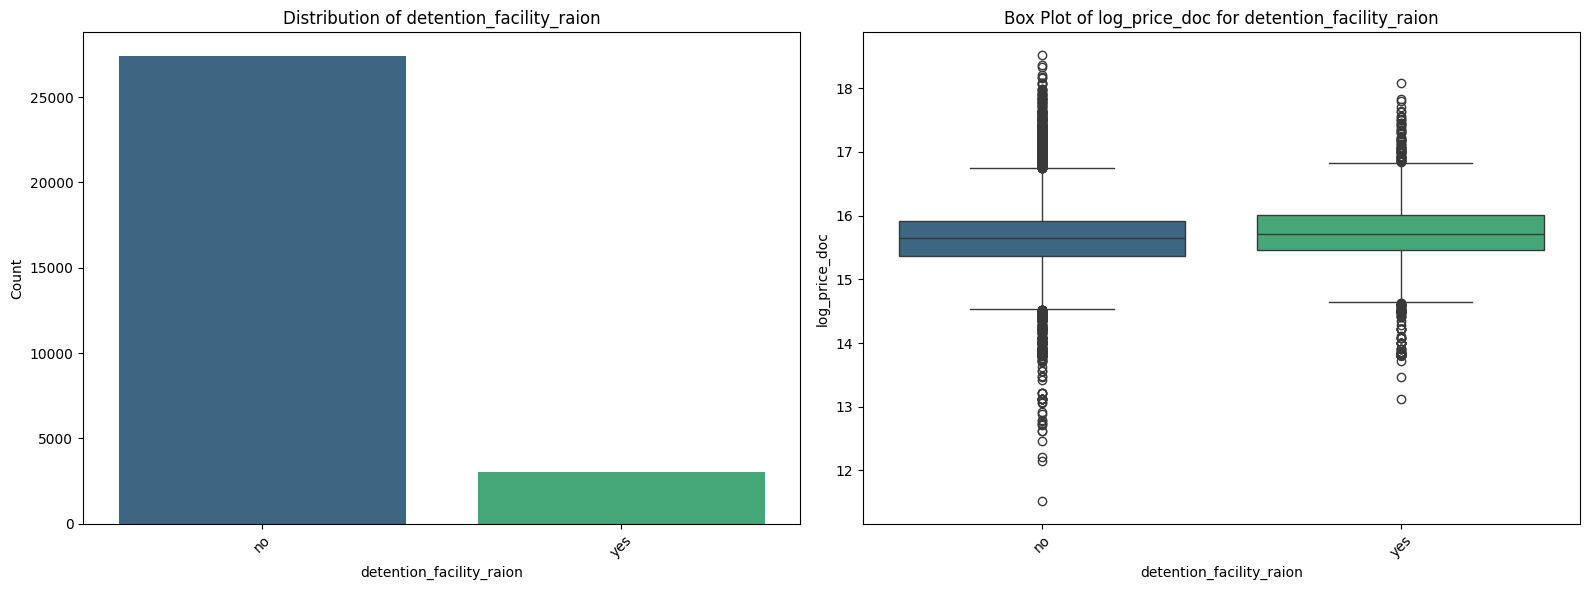

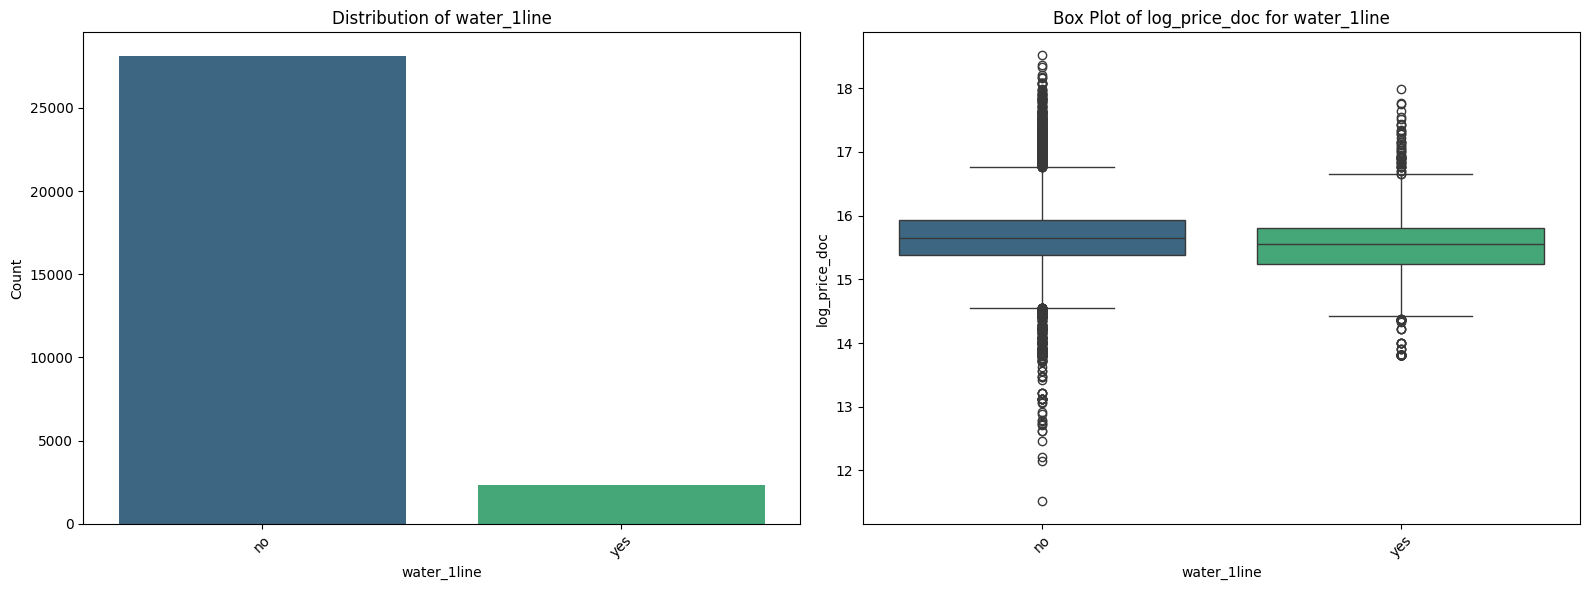

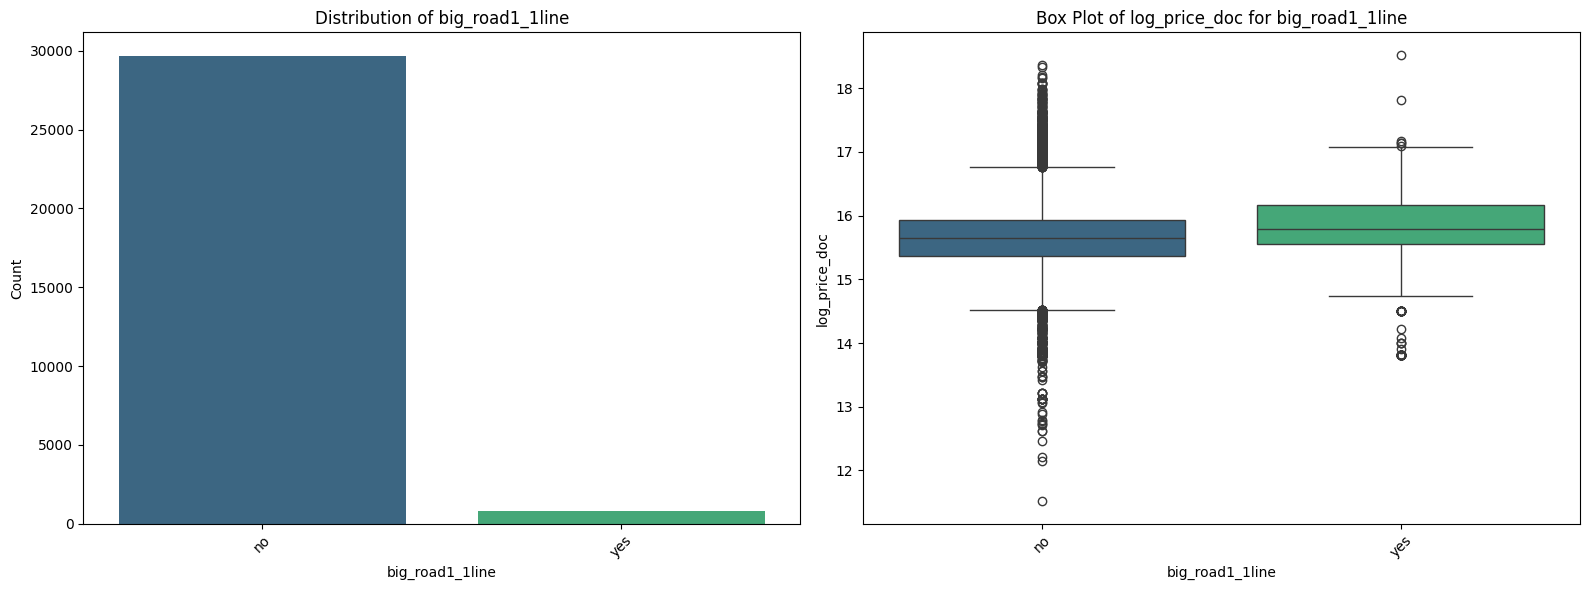

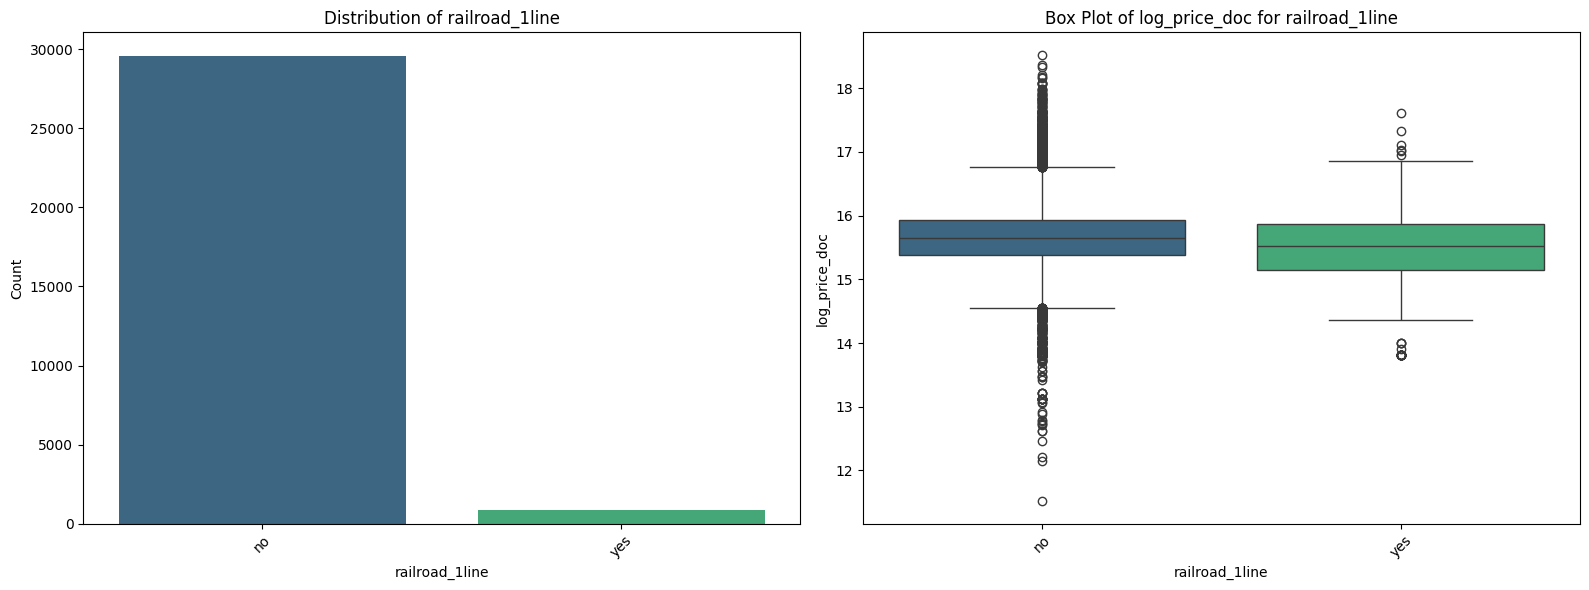

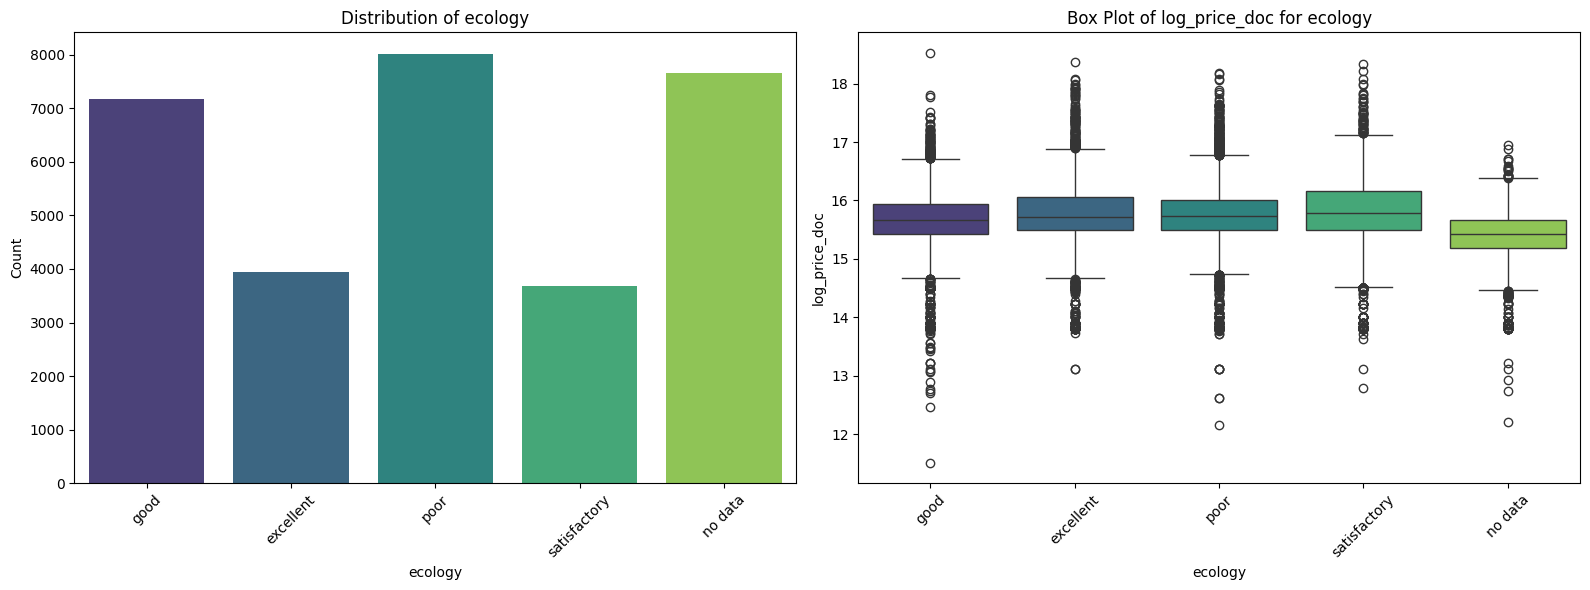

In [ ]:
object_columns = column_types[(column_types['Data Type'] == 'object') & (column_types['Column'] != 'sub_area')]['Column']

# Plot categorical columns with count plots & box plots
for col in object_columns:
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(data=train, x=col, palette='viridis', hue=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=train, x=col, y="log_price_doc", palette='viridis', hue=col)
    plt.title(f'Box Plot of log_price_doc for {col}')
    plt.ylabel('log_price_doc')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

<ipython-input-15-2c11df9c4022>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='product_type', y='log_price_doc', palette='muted')


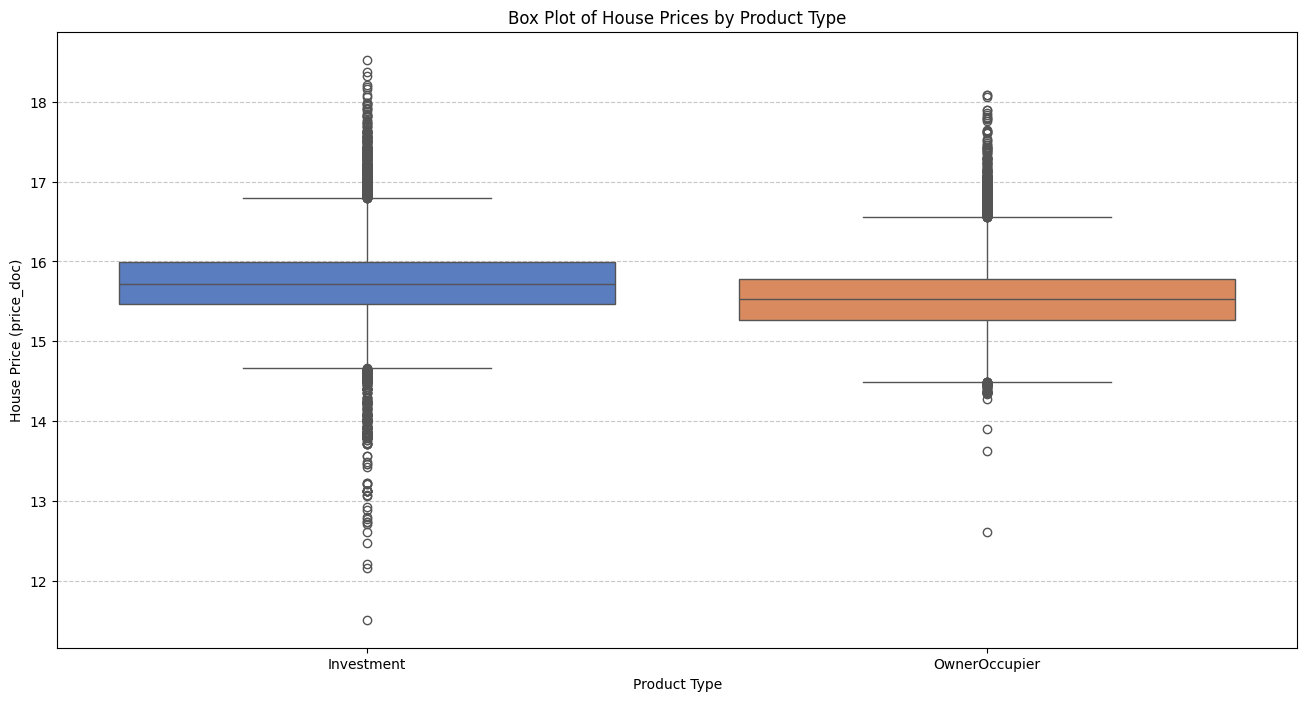

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=train, x='product_type', y='log_price_doc', palette='muted')
plt.title('Box Plot of House Prices by Product Type')
plt.xlabel('Product Type')
plt.ylabel('House Price (price_doc)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

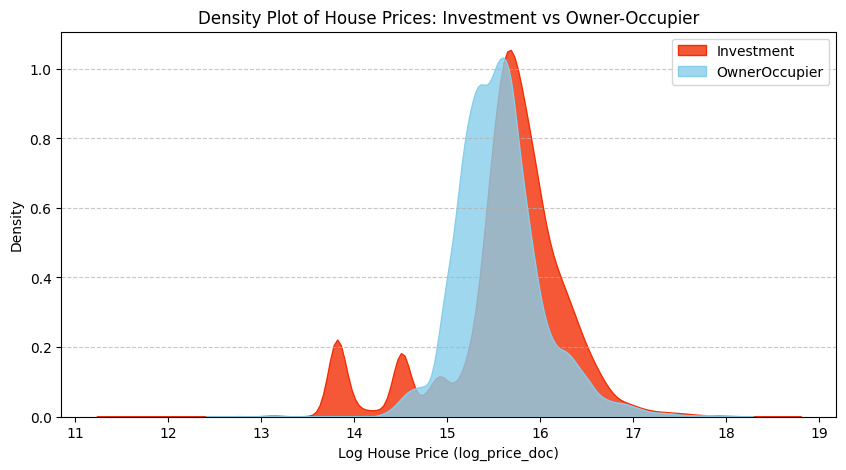

In [ ]:
plt.figure(figsize=(10, 5))

# Extract log-transformed house prices for each category
investment_prices = train[train['product_type'] == 'Investment']['log_price_doc']
owner_prices = train[train['product_type'] == 'OwnerOccupier']['log_price_doc']

# Plot both distributions on the same grid
sns.kdeplot(investment_prices, fill=True, color='#f32e04', alpha=0.8, label='Investment')
sns.kdeplot(owner_prices, fill=True, color='skyblue', alpha=0.8, label='OwnerOccupier')

# Customize plot
plt.title('Density Plot of House Prices: Investment vs Owner-Occupier')
plt.xlabel('Log House Price (log_price_doc)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# conducting t test of means to check if Investment housing price is statistically significant from OwnerOccupier
# if it is, we might need to treat them diffrently when predicting housing price

random = 14

# Randomly sample 5000 observations from each group
investment_prices = train[train['product_type'] == 'Investment']['log_price_doc'].sample(n=5000, replace=False, random_state=random)
owner_prices = train[train['product_type'] == 'OwnerOccupier']['log_price_doc'].sample(n=5000, replace=False, random_state=random)

# Print sample sizes to verify
print(f"Sample size - Investment: {len(investment_prices)}, OwnerOccupier: {len(owner_prices)}")


Sample size - Investment: 5000, OwnerOccupier: 5000


Shapiro-Wilk Test (Investment): p-value = 0.00000
Shapiro-Wilk Test (OwnerOccupier): p-value = 0.00000


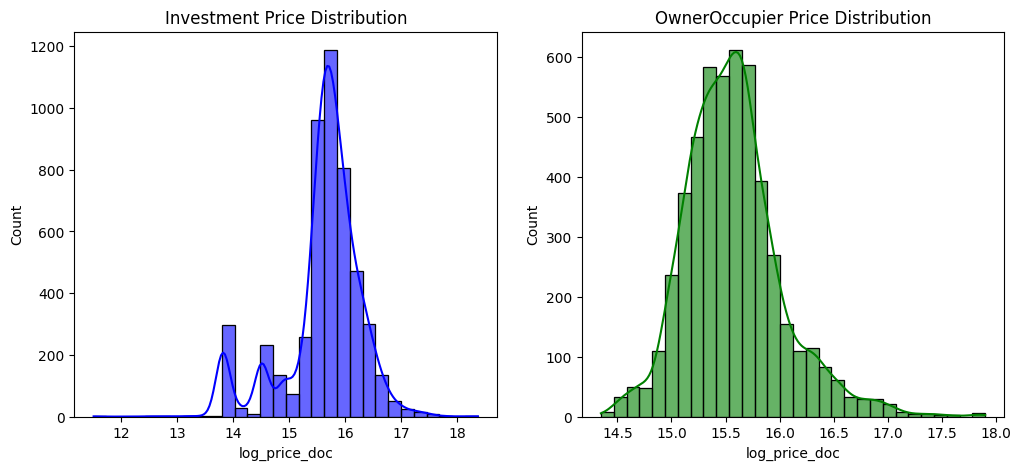

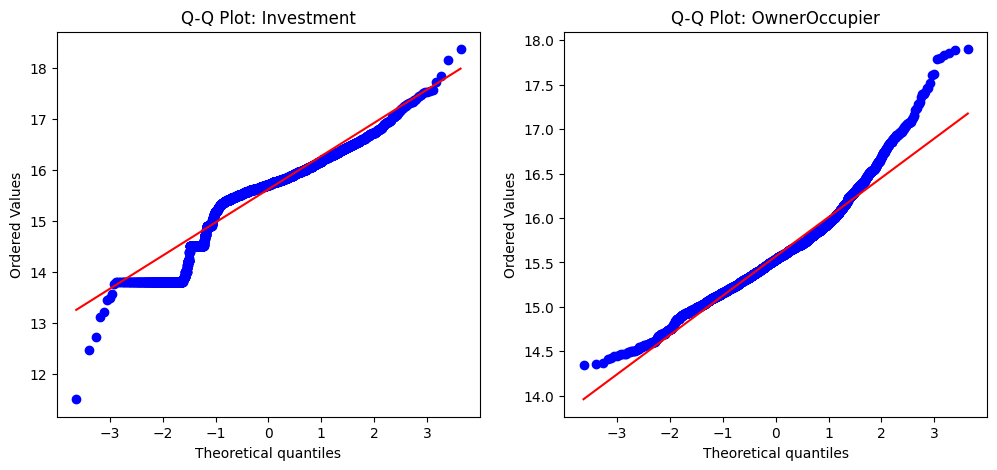

Investment Prices Data Type: float64
OwnerOccupier Prices Data Type: float64
Levene's Test for Equal Variance: p-value = 0.00000


In [ ]:
# Shapiro-Wilk Test for normality (H0: Data is normally distributed)
shapiro_investment = stats.shapiro(investment_prices)
shapiro_owner = stats.shapiro(owner_prices)

print(f"Shapiro-Wilk Test (Investment): p-value = {shapiro_investment.pvalue:.5f}")
print(f"Shapiro-Wilk Test (OwnerOccupier): p-value = {shapiro_owner.pvalue:.5f}")

# Histogram and Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(investment_prices, kde=True, bins=30, ax=axes[0], color="blue", alpha=0.6)
axes[0].set_title("Investment Price Distribution")

sns.histplot(owner_prices, kde=True, bins=30, ax=axes[1], color="green", alpha=0.6)
axes[1].set_title("OwnerOccupier Price Distribution")

plt.show()

# QQ-Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(investment_prices, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot: Investment")

stats.probplot(owner_prices, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot: OwnerOccupier")

plt.show()

print("Investment Prices Data Type:", investment_prices.dtype)
print("OwnerOccupier Prices Data Type:", owner_prices.dtype)

# Levene’s Test (H0: Variances are equal)
levene_test = stats.levene(investment_prices, owner_prices)
print(f"Levene's Test for Equal Variance: p-value = {levene_test.pvalue:.5f}")

# investment showed weird distribution in its lower values in the QQ plot, we further analyze it to see why it happens and how can we handle this

In [ ]:
# Perform Welch’s t-test (since variances are not equal)
welch_ttest = stats.ttest_ind(investment_prices, owner_prices, equal_var=False)

# Print the result
print(f"Welch’s T-Test: t-value = {welch_ttest.statistic:.5f}, p-value = {welch_ttest.pvalue:.5f}")


Welch’s T-Test: t-value = 5.06716, p-value = 0.00000


In [ ]:
# columns we suspect that don't change based on the region(sub_arae), so we can replace na values with the mode(which is for most features - the only unique value)
columns_to_analyze = [
    "area_m", "raion_popul", "green_zone_part", "indust_part", "children_preschool",
    "preschool_quota", "preschool_education_centers_raion", "children_school", "school_quota",
    "school_education_centers_raion", "school_education_centers_top_20_raion", "hospital_beds_raion",
    "healthcare_centers_raion", "university_top_20_raion", "sport_objects_raion",
    "additional_education_raion", "culture_objects_top_25", "culture_objects_top_25_raion",
    "shopping_centers_raion", "office_raion", "thermal_power_plant_raion", "incineration_raion",
    "oil_chemistry_raion", "radiation_raion", "railroad_terminal_raion", "big_market_raion",
    "nuclear_reactor_raion", "detention_facility_raion", "full_all", "male_f", "female_f",
    "young_all", "young_male", "young_female", "work_all", "work_male", "work_female",
    "ekder_all", "ekder_male", "ekder_female", "0_6_all", "0_6_male", "0_6_female",
    "7_14_all", "7_14_male", "7_14_female", "0_17_all", "0_17_male", "0_17_female",
    "16_29_all", "16_29_male", "16_29_female", "0_13_all", "0_13_male", "0_13_female",
    "raion_build_count_with_material_info", "build_count_block", "build_count_wood",
    "build_count_frame", "build_count_brick", "build_count_monolith", "build_count_panel",
    "build_count_foam", "build_count_slag", "build_count_mix", "raion_build_count_with_builddate_info",
    "build_count_before_1920", "build_count_1921-1945", "build_count_1946-1970",
    "build_count_1971-1995", "build_count_after_1995", "ID_metro"
]

In [ ]:
# Identify numerical and categorical columns
numerical_cols = [col for col in columns_to_analyze if train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in columns_to_analyze if train[col].dtype == 'object']

# Perform analysis for numerical columns
numerical_analysis = train.groupby("sub_area")[numerical_cols].agg(
    ["median", "mean", lambda x: x.mode().iloc[0] if not x.mode().empty else None, "nunique"]
)

# Rename the lambda function column for clarity
numerical_analysis.rename(columns={"<lambda_0>": "mode"}, inplace=True)

# Perform analysis for categorical columns
categorical_analysis = train.groupby("sub_area")[categorical_cols].agg(
    [lambda x: x.mode().iloc[0] if not x.mode().empty else None, "nunique"]
)

# Rename the lambda function column for clarity
categorical_analysis.rename(columns={"<lambda_0>": "mode"}, inplace=True)




In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)


print("Numerical Features Analysis:")
display(numerical_analysis)
print("\nCategorical Features Analysis:")
display(categorical_analysis)

Numerical Features Analysis:


area_m                                   raion_popul                           green_zone_part                   indust_part                   children_preschool                         preschool_quota                           preschool_education_centers_raion                    children_school                         school_quota                           school_education_centers_raion                    school_education_centers_top_20_raion                   hospital_beds_raion                         healthcare_centers_raion                   university_top_20_raion                   sport_objects_raion                    additional_education_raion                    culture_objects_top_25_raion                    shopping_centers_raion                    office_raion                       full_all                                male_f                            female_f                           young_all                         young_male  \
                                     median         mean         mode nunique      median      mean    mode nunique          median mean mode nunique      median mean mode nunique             median     mean   mode nunique          median     mean     mode nunique                            median  mean mode nunique          median     mean   mode nunique       median     mean     mode nunique                         median  mean mode nunique                                median mean mode nunique              median    mean    mode nunique                   median mean mode nunique                  median mean mode nunique              median  mean mode nunique                     median  mean mode nunique                       median  mean mode nunique                 median  mean mode nunique       median   mean mode nunique     median       mean     mode nunique    median      mean    mode nunique    median      mean    mode nunique    median     mean   mode nunique     median   
sub_area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
Ajeroport                        4662813.07   4662813.07   4662813.07       1    73007.00  73007.00   73007       1            0.11 0.11 0.11       1        0.05 0.05 0.05       1            4348.00  4348.00   4348       1         2058.00  2058.00  2058.00       1                              3.00  3.00    3       1         4231.00  4231.00   4231       1      4975.00  4975.00  4975.00       1                           6.00  6.00    6       1                                  1.00 1.00    1       1             1020.00 1020.00 1020.00       1                     0.00 0.00    0       1                    1.00 1.00    1       1                4.00  4.00    4       1                       3.00  3.00    3       1                         0.00  0.00    0       1                   3.00  3.00    3       1        14.00  14.00   14       1 1100773.00 1100773.00  1100773       1 502659.00 502659.00  502659       1 598114.00 598114.00  598114       1   9151.00  9151.00   9151       1    4737.00   
Akademicheskoe                   5704502.


Categorical Features Analysis:


culture_objects_top_25         thermal_power_plant_raion         incineration_raion         oil_chemistry_raion         radiation_raion         railroad_terminal_raion         big_market_raion         nuclear_reactor_raion         detention_facility_raion        
                                                 mode nunique                      mode nunique               mode nunique                mode nunique            mode nunique                    mode nunique             mode nunique                  mode nunique                     mode nunique
sub_area                                                                                                                                                                                                                                                                                              
Ajeroport                                          no       1                        no       1                 no       1                  no       1              no       1                      no       1               no       1                    no       1                       no       1
Akademicheskoe                                     no       1                       yes       1                 no       1                  no       1             yes       1                      no       1               no       1                   yes       1                       no       1
Alekseevskoe                                       no       1                        no       1                 no       1                  no       1             yes       1                      no       1               no       1                    no       1                       no       1
Altuf'evskoe                                       no       1                        no       1                 no       1                  no       1             yes       1                      no       1               no       1                    no       1                       no       1
Arbat                                             yes       1                        no       1                 no       1                  no       1              no       1                      no       1               no       1                    no       1                       no       1
Babushkinskoe                                      no       1                        no       1                 no       1                  no       1              no       1                      no       1               no       1                    no       1                      yes       1
Basmannoe                                          no       1                        no       1                 no       1                  no       1             yes       1                     yes       1               no       1                    no       1                       no       1
Begovoe                                            no       1                        no       1                 no       1                  no       1              no       1                      no       1               no       1                    no       1                       no       1
Beskudnikovskoe                                    no       1                        no       1                 no       1                  no       1              no       1                      no       1               no       1                    no       1                       no       1
Bibirevo                                           no       1                        no       1                 no       1                  no       1              no       1                      no       1               no       1                    no       1                       no       1
Birjulevo Vostochnoe                               no       1                        no       1                 no       1                  no       1             yes       1                      

In [ ]:
numerical_filtered = numerical_analysis.xs("nunique", axis=1, level=1).gt(1)
numerical_filtered_features = numerical_filtered.apply(lambda x: list(x.index[x]), axis=1)

# Filter categorical features where 'nunique' > 1 for each sub_area
categorical_filtered = categorical_analysis.xs("nunique", axis=1, level=1).gt(1)
categorical_filtered_features = categorical_filtered.apply(lambda x: list(x.index[x]), axis=1)

# Convert to DataFrames
numerical_filtered_df = pd.DataFrame(numerical_filtered_features, columns=["Features with >1 Unique Values"])
categorical_filtered_df = pd.DataFrame(categorical_filtered_features, columns=["Features with >1 Unique Values"])


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)


print("Numerical Features Analysis:")
display(numerical_filtered_df)
print("\nCategorical Features Analysis:")
display(categorical_filtered_df)

Numerical Features Analysis:


Features with >1 Unique Values
sub_area                                                     
Ajeroport                                          [ID_metro]
Akademicheskoe                                     [ID_metro]
Alekseevskoe                                       [ID_metro]
Altuf'evskoe                                       [ID_metro]
Arbat                                              [ID_metro]
Babushkinskoe                                      [ID_metro]
Basmannoe                                          [ID_metro]
Begovoe                                            [ID_metro]
Beskudnikovskoe                                    [ID_metro]
Bibirevo                                           [ID_metro]
Birjulevo Vostochnoe                               [ID_metro]
Birjulevo Zapadnoe                                 [ID_metro]
Bogorodskoe                                        [ID_metro]
Brateevo                                           [ID_metro]
Butyrskoe                                          [ID_metro]
Caricyno                                           [ID_metro]
Cheremushki                                        [ID_metro]
Chertanovo Central'noe                             [ID_metro]
Chertanovo Juzhnoe                                 [ID_metro]
Chertanovo Severnoe                                [ID_metro]
Danilovskoe                                        [ID_metro]
Dmitrovskoe                                        [ID_metro]
Donskoe                                            [ID_metro]
Dorogomilovo                                       [ID_metro]
Filevskij Park                                     [ID_metro]
Fili Davydkovo                                     [ID_metro]
Gagarinskoe                                        [ID_metro]
Gol'janovo                                         [ID_metro]
Golovinskoe                                        [ID_metro]
Hamovniki                                          [ID_metro]
Horoshevo-Mnevniki                                 [ID_metro]
Horoshevskoe                                       [ID_metro]
Hovrino                                            [ID_metro]
Ivanovskoe                                         [ID_metro]
Izmajlovo                                          [ID_metro]
Jakimanka                                          [ID_metro]
Jaroslavskoe                                       [ID_metro]
Jasenevo                                           [ID_metro]
Juzhnoe Butovo                                     [ID_metro]
Juzhnoe Medvedkovo                                 [ID_metro]
Juzhnoe Tushino                                    [ID_metro]
Juzhnoportovoe                                     [ID_metro]
Kapotnja                                           [ID_metro]
Kon'kovo                                           [ID_metro]
Koptevo                                            [ID_metro]
Kosino-Uhtomskoe                                   [ID_metro]
Kotlovka                                           [ID_metro]
Krasnosel'skoe                                     [ID_metro]
Krjukovo                                                   []
Krylatskoe                                         [ID_metro]
Kuncevo                                            [ID_metro]
Kurkino                                                    []
Kuz'minki                                          [ID_metro]
Lefortovo                                          [ID_metro]
Levoberezhnoe                                      [ID_metro]
Lianozovo                                                  []
Ljublino                                           [ID_metro]
Lomonosovskoe                                      [ID_metro]
Losinoostrovskoe                                   [ID_metro]
Mar'ina Roshha                                     [ID_metro]
Mar'ino                                            [ID_metro]
Marfino                                            [ID_metro]
Matushkino                                         [ID_metro]
M


Categorical Features Analysis:


Features with >1 Unique Values
sub_area                                                     
Ajeroport                                                  []
Akademicheskoe                                             []
Alekseevskoe                                               []
Altuf'evskoe                                               []
Arbat                                                      []
Babushkinskoe                                              []
Basmannoe                                                  []
Begovoe                                                    []
Beskudnikovskoe                                            []
Bibirevo                                                   []
Birjulevo Vostochnoe                                       []
Birjulevo Zapadnoe                                         []
Bogorodskoe                                                []
Brateevo                                                   []
Butyrskoe                                                  []
Caricyno                                                   []
Cheremushki                                                []
Chertanovo Central'noe                                     []
Chertanovo Juzhnoe                                         []
Chertanovo Severnoe                                        []
Danilovskoe                                                []
Dmitrovskoe                                                []
Donskoe                                                    []
Dorogomilovo                                               []
Filevskij Park                                             []
Fili Davydkovo                                             []
Gagarinskoe                                                []
Gol'janovo                                                 []
Golovinskoe                                                []
Hamovniki                                                  []
Horoshevo-Mnevniki                                         []
Horoshevskoe                                               []
Hovrino                                                    []
Ivanovskoe                                                 []
Izmajlovo                                                  []
Jakimanka                                                  []
Jaroslavskoe                                               []
Jasenevo                                                   []
Juzhnoe Butovo                                             []
Juzhnoe Medvedkovo                                         []
Juzhnoe Tushino                                            []
Juzhnoportovoe                                             []
Kapotnja                                                   []
Kon'kovo                                                   []
Koptevo                                                    []
Kosino-Uhtomskoe                                           []
Kotlovka                                                   []
Krasnosel'skoe                                             []
Krjukovo                                                   []
Krylatskoe                                                 []
Kuncevo                                                    []
Kurkino                                                    []
Kuz'minki                                                  []
Lefortovo                                                  []
Levoberezhnoe                                              []
Lianozovo                                                  []
Ljublino                                                   []
Lomonosovskoe                                              []
Losinoostrovskoe                                           []
Mar'ina Roshha                                             []
Mar'ino                                                    []
Marfino                                                    []
Matushkino                                                 []
M

In [ ]:
# data filling

# Identify numerical and categorical columns (excluding 'ID_metro')
columns_to_analyze.remove("ID_metro")
# removed ID_metro becuase this is the only feature amongst columns_to_analyze that had more than 1 unique value (For most of the sub_areas)

def fill_na_with_mode(group):
    for col in columns_to_analyze:
        mode_series = group[col].mode()
        if not mode_series.empty:
            group[col] = group[col].fillna(mode_series.iloc[0])
        else:
            # If no mode in the group, use the global mode of the column
            global_mode = train[col].mode().iloc[0] if not train[col].mode().empty else None
            if global_mode is not None:
                group[col] = group[col].fillna(global_mode)
    return group

# Apply the function to each sub_area
train = train.groupby("sub_area", group_keys=False).apply(fill_na_with_mode)
test = test.groupby("sub_area", group_keys=False).apply(fill_na_with_mode)

# Confirm that NA values are filled
print("Missing values after imputation:")
print(train[columns_to_analyze].isna().sum())

# Confirm that NA values are filled
print("Missing values after imputation:")
print(test[columns_to_analyze].isna().sum())


<ipython-input-25-1ca09430ce07>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = train.groupby("sub_area", group_keys=False).apply(fill_na_with_mode)


Missing values after imputation:
area_m                                   0
raion_popul                              0
green_zone_part                          0
indust_part                              0
children_preschool                       0
preschool_quota                          0
preschool_education_centers_raion        0
children_school                          0
school_quota                             0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
hospital_beds_raion                      0
healthcare_centers_raion                 0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25                   0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
office_raion                             0
thermal_power_plant_raion                0
incineration_raion                       0
oil_chemistry_raion  

<ipython-input-25-1ca09430ce07>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = test.groupby("sub_area", group_keys=False).apply(fill_na_with_mode)


In [ ]:
# Check for missing values
missing_values = train.isna().sum()
missing_percentage = (missing_values / len(train)) * 100

na_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Filter columns with missing percentage > 0
na_summary = na_summary[na_summary['Percentage (%)'] > 0].sort_values(by='Percentage (%)', ascending=True)

# Display the summary
print("Columns with Missing Values:")
print(na_summary)





Columns with Missing Values:
                             Missing Values  Percentage (%)
full_sq                                   2            0.01
ID_railroad_station_walk                 25            0.08
railroad_station_walk_min                25            0.08
railroad_station_walk_km                 25            0.08
metro_km_walk                            25            0.08
metro_min_walk                           25            0.08
floor                                   167            0.55
prom_part_5000                          178            0.58
cafe_sum_5000_min_price_avg             297            0.97
cafe_sum_5000_max_price_avg             297            0.97
cafe_avg_price_5000                     297            0.97
cafe_avg_price_3000                     991            3.25
cafe_sum_3000_max_price_avg             991            3.25
cafe_sum_3000_min_price_avg             991            3.25
cafe_sum_2000_min_price_avg            1725            5.66
cafe_sum_20

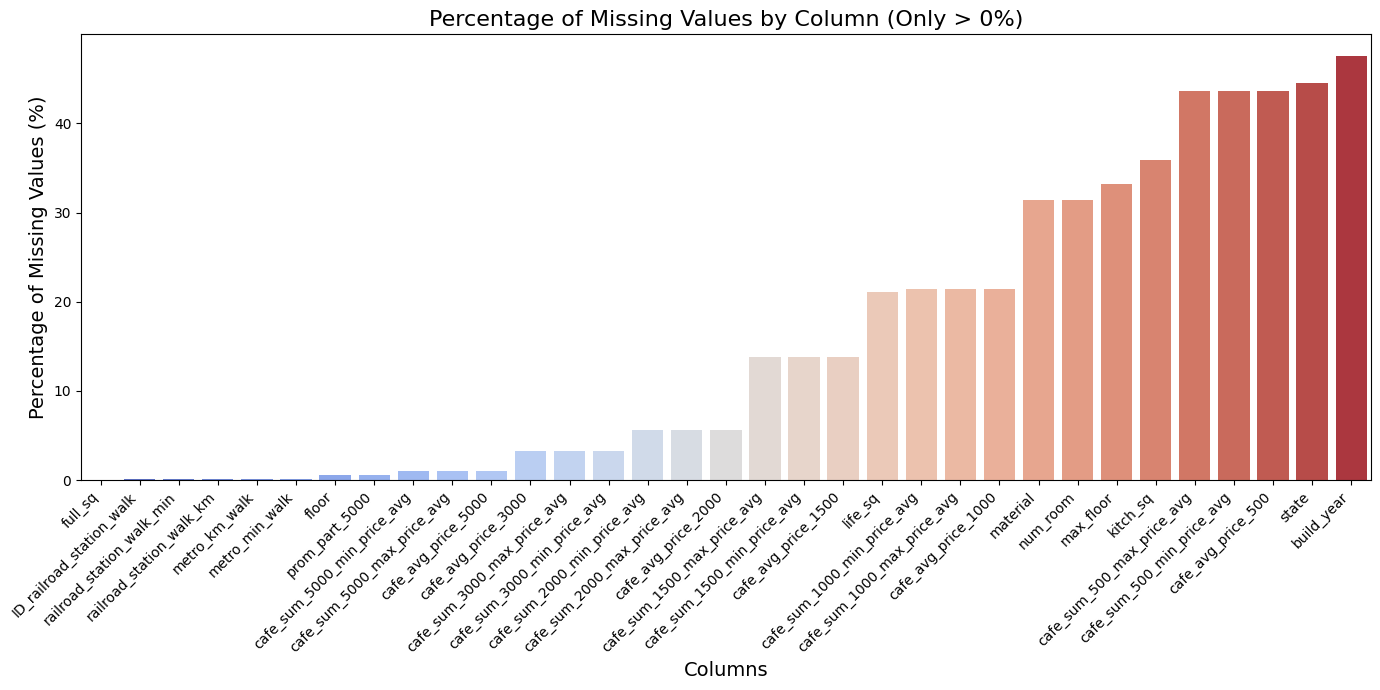

In [ ]:
# Plot columns with missing percentage > 0
plt.figure(figsize=(14, 7))
sns.barplot(
    x=na_summary.index,
    y=na_summary['Percentage (%)'],
    hue=na_summary.index,  # Set the `hue` to the same as `x` to utilize the palette
    dodge=False,  # Disable hue-based offset
    palette="coolwarm"
)
plt.title('Percentage of Missing Values by Column (Only > 0%)', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False)  # Disable the legend
plt.tight_layout()
plt.show()


In [ ]:
# filling NA for features with less than 30% NA

na_summary = na_summary.reset_index()
na_summary.columns = ['Column', 'Missing Values', 'Percentage (%)']

filtered_na_summary = na_summary[na_summary['Percentage (%)'] < 30]

# Split columns into two groups: those with "avg" in their name and those without
avg_columns = filtered_na_summary[filtered_na_summary['Column'].str.contains("avg", case=False)]['Column'].tolist()
non_avg_columns = filtered_na_summary[~filtered_na_summary['Column'].str.contains("avg", case=False)]['Column'].tolist()

# we dont want to replace this with the median because we think they are very important and need to be carefully treated
columns_to_exclude = ['floor', 'life_sq']
for col in columns_to_exclude:
  non_avg_columns.remove(col)


# Print or save the results
print("\nColumns with 'avg' in their name (Less than 30% missing):")
print(avg_columns)

print("\nColumns without 'avg' in their name (Less than 30% missing):")
print(non_avg_columns)


Columns with 'avg' in their name (Less than 30% missing):
['cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'cafe_avg_price_3000', 'cafe_sum_3000_max_price_avg', 'cafe_sum_3000_min_price_avg', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_sum_1500_max_price_avg', 'cafe_sum_1500_min_price_avg', 'cafe_avg_price_1500', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000']

Columns without 'avg' in their name (Less than 30% missing):
['full_sq', 'ID_railroad_station_walk', 'railroad_station_walk_min', 'railroad_station_walk_km', 'metro_km_walk', 'metro_min_walk', 'prom_part_5000']


In [ ]:
# Step 1: Impute Train Based on Its Own Statistics
for col in avg_columns:
    train[col] = train.groupby('sub_area')[col].transform(lambda x: x.fillna(x.mean()))

for col in non_avg_columns:
    train[col] = train.groupby('sub_area')[col].transform(lambda x: x.fillna(x.median()))

for col in avg_columns:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].mean())

for col in non_avg_columns:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())

# Step 2: Apply the Same Imputation to Test Using Train Statistics
for col in avg_columns:
    test[col] = test.groupby('sub_area')[col].transform(lambda x: x.fillna(train.groupby('sub_area')[col].transform('mean')))

for col in non_avg_columns:
    test[col] = test.groupby('sub_area')[col].transform(lambda x: x.fillna(train.groupby('sub_area')[col].transform('median')))

for col in avg_columns:
    if col in test.columns:
        test[col] = test[col].fillna(train[col].mean())  # Use train mean for test

for col in non_avg_columns:
    if col in test.columns:
        test[col] = test[col].fillna(train[col].median())  # Use train median for test

# Step 3: Confirm Missing Values are Filled
print("Missing values after imputation in Train:")
print(train[avg_columns + non_avg_columns].isna().sum())

print("\nMissing values after imputation in Test:")
print(test[avg_columns + non_avg_columns].isna().sum())


Missing values after imputation in Train:
cafe_sum_5000_min_price_avg    0
cafe_sum_5000_max_price_avg    0
cafe_avg_price_5000            0
cafe_avg_price_3000            0
cafe_sum_3000_max_price_avg    0
cafe_sum_3000_min_price_avg    0
cafe_sum_2000_min_price_avg    0
cafe_sum_2000_max_price_avg    0
cafe_avg_price_2000            0
cafe_sum_1500_max_price_avg    0
cafe_sum_1500_min_price_avg    0
cafe_avg_price_1500            0
cafe_sum_1000_min_price_avg    0
cafe_sum_1000_max_price_avg    0
cafe_avg_price_1000            0
full_sq                        0
ID_railroad_station_walk       0
railroad_station_walk_min      0
railroad_station_walk_km       0
metro_km_walk                  0
metro_min_walk                 0
prom_part_5000                 0
dtype: int64

Missing values after imputation in Test:
cafe_sum_5000_min_price_avg    0
cafe_sum_5000_max_price_avg    0
cafe_avg_price_5000            0
cafe_avg_price_3000            0
cafe_sum_3000_max_price_avg    0
cafe_sum_300

In [ ]:
#verify it worked

missing_values = train.isna().sum()
missing_percentager = (missing_values / len(train)) * 100

# Create a DataFrame summarizing missing values after imputation
na_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage (%)': missing_percentager.values
})

# Filter columns with missing percentage > 0
na_summary = na_summary[na_summary['Percentage (%)'] > 0].sort_values(by='Percentage (%)', ascending=True)

# Display the summary
print("Columns with Missing Values:")
print(na_summary)

Columns with Missing Values:
                         Column  Missing Values  Percentage (%)
4                         floor             167            0.55
3                       life_sq            6428           21.10
6                      material            9572           31.41
8                      num_room            9586           31.46
5                     max_floor           10125           33.23
9                      kitch_sq           10953           35.95
160  cafe_sum_500_min_price_avg           13281           43.59
161  cafe_sum_500_max_price_avg           13281           43.59
162          cafe_avg_price_500           13281           43.59
10                        state           13559           44.50
7                    build_year           14507           47.61


In [ ]:
# droping average features with more than 30% missing
avg_columns = na_summary[na_summary['Column'].str.contains("avg", case=False)]['Column'].tolist()
train.drop(columns=avg_columns, inplace=True)
test.drop(columns=avg_columns, inplace=True)

In [ ]:
# we saw a unique thing. max_floor, num_room, material and kitch_sq have the exact same missing percentage, we belive that the missing rows are the same for all of them. lets check:

target_columns = ['max_floor', 'num_room', 'kitch_sq', 'material']
missing_ids = set(train.loc[train[target_columns].isna().any(axis=1), 'id'])
num_unique_missing_ids = len(missing_ids)
print(f"Total number of unique IDs with missing values: {num_unique_missing_ids}")

# its indeed the same (10998 total missing rows - just like the number of missing rows for each of the features - meaning where one of the feature has na, all of them have na)

Total number of unique IDs with missing values: 10998


In [ ]:
features = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'log_price_doc', 'timestamp']
house_price_missing = train.loc[train['id'].isin(missing_ids), features]

# Display the first few rows
print(house_price_missing.info())
rows, columns = house_price_missing.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)


print("First 5 rows:")
display(house_price_missing.head())
print("\nTable Statistics:")
display(house_price_missing.describe())

# after looking at the description, we saw that also state and build_year had na in the exact rows of the features in target_columns (and more rows with na).
# this leads us to assume that they are also in that group, and they might share a common properties that can help us understand those houses better.


<class 'pandas.core.frame.DataFrame'>
Index: 10998 entries, 0 to 30458
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   full_sq        10998 non-null  float64
 1   life_sq        7750 non-null   float64
 2   floor          10831 non-null  float64
 3   max_floor      873 non-null    float64
 4   material       1426 non-null   float64
 5   build_year     204 non-null    float64
 6   num_room       1412 non-null   float64
 7   kitch_sq       45 non-null     float64
 8   state          466 non-null    float64
 9   product_type   10998 non-null  object 
 10  sub_area       10998 non-null  object 
 11  log_price_doc  10998 non-null  float64
 12  timestamp      10998 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1.2+ MB
None
Number of rows: 10998, Number of columns: 13
First 5 rows:


full_sq  life_sq  floor  max_floor  material  build_year  num_room  kitch_sq  state product_type           sub_area  log_price_doc   timestamp
0    43.00    27.00   4.00        NaN       NaN         NaN       NaN       NaN    NaN   Investment           Bibirevo          15.58  2011-08-20
1    34.00    19.00   3.00        NaN       NaN         NaN       NaN       NaN    NaN   Investment  Nagatinskij Zaton          15.61  2011-08-23
2    43.00    29.00   2.00        NaN       NaN         NaN       NaN       NaN    NaN   Investment     Tekstil'shhiki          15.56  2011-08-27
3    89.00    50.00   9.00        NaN       NaN         NaN       NaN       NaN    NaN   Investment             Mitino          16.39  2011-09-01
4    77.00    77.00   4.00        NaN       NaN         NaN       NaN       NaN    NaN   Investment          Basmannoe          16.61  2011-09-05


Table Statistics:


full_sq  life_sq    floor  max_floor  material  build_year  num_room  kitch_sq  state  log_price_doc
count 10998.00  7750.00 10831.00     873.00   1426.00      204.00   1412.00     45.00 466.00       10998.00
mean     54.50    35.48     8.07      15.55      1.63     2009.40      1.80      7.18   1.19          15.51
std      56.44    23.15     5.45       6.44      1.44       14.39      0.81      4.65   0.56           0.60
min       5.00     1.00     0.00       1.00      1.00     1954.00      1.00      1.00   1.00          12.15
25%      38.00    20.00     4.00      12.00      1.00     2014.00      1.00      1.00   1.00          15.26
50%      48.00    30.00     7.00      17.00      1.00     2014.00      2.00      9.00   1.00          15.55
75%      63.00    43.00    12.00      17.00      1.00     2015.00      2.00     11.00   1.00          15.80
max    5326.00   802.00    44.00      38.00      6.00     2017.00      6.00     14.00   4.00          18.53

In [ ]:
train = train.copy()
house_price_missing = house_price_missing.copy()

bins = [-np.inf] + list(range(1920, 2030, 20))
bin_labels = ["Before 1920"] + [f"{start}-{start+19}" for start in range(1920, 2020, 20)]

print("Bin Edges:", bins)
print("Bin Labels:", bin_labels)

# Filter out NaN values in build_year before binning
train_plot = train.dropna(subset=['build_year']).copy()

# Apply binning only to filtered data
train_plot['build_year_bin'] = pd.cut(train_plot['build_year'], bins=bins, labels=bin_labels, include_lowest=True)

# Convert to string format (no NaN values will remain)
train_plot['build_year_bin'] = train_plot['build_year_bin'].astype(str)

# Count occurrences in each bin
bin_counts = train_plot['build_year_bin'].value_counts()
print("Bin Distribution in train (filtered):\n", bin_counts)


Bin Edges: [-inf, 1920, 1940, 1960, 1980, 2000, 2020]
Bin Labels: ['Before 1920', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']
Bin Distribution in train (filtered):
 build_year_bin
1960-1979      6531
2000-2019      5117
1980-1999      3004
1940-1959      1114
1920-1939       142
Before 1920      56
Name: count, dtype: int64


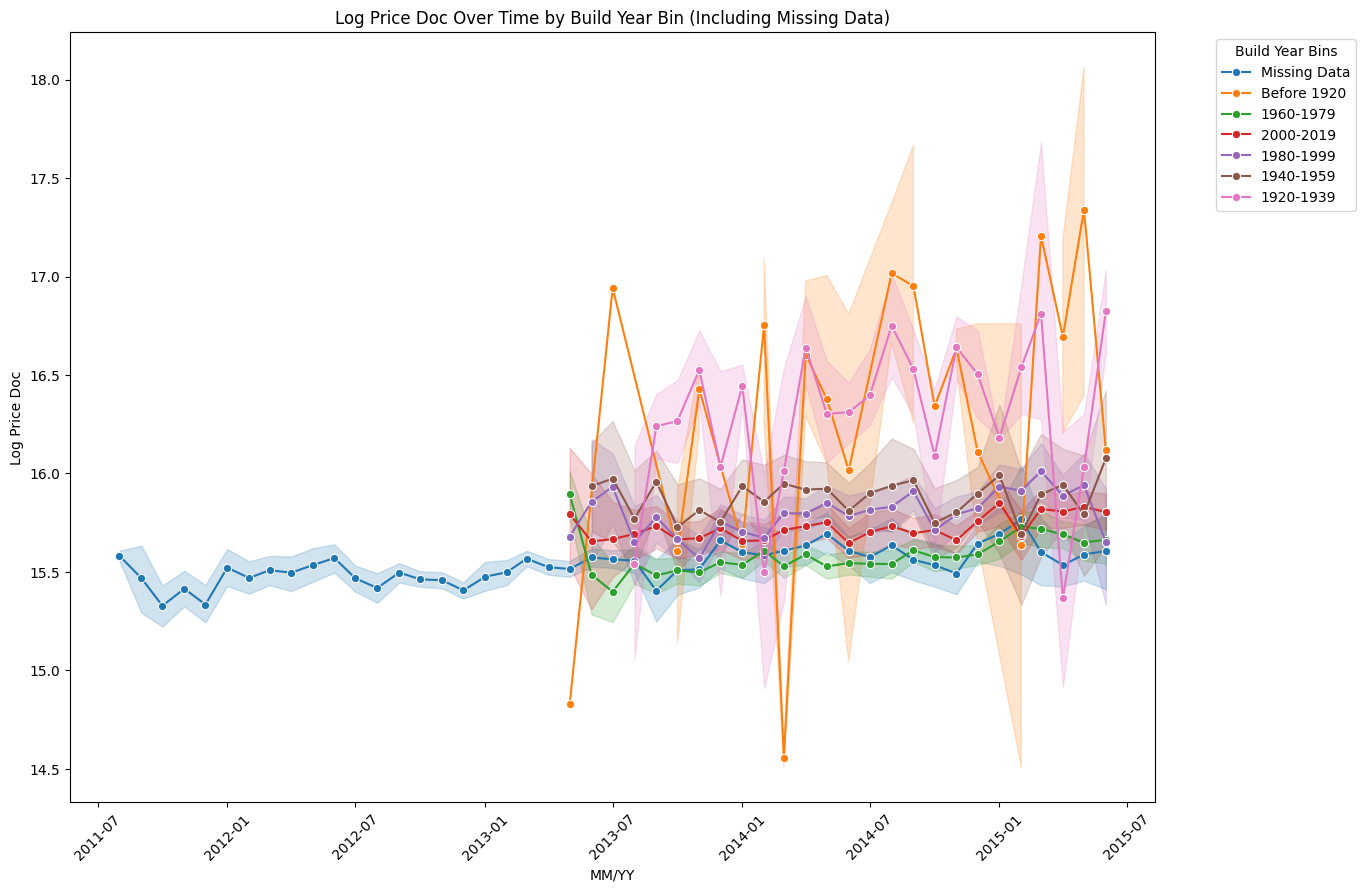

In [ ]:
train_plot['timestamp'] = pd.to_datetime(train_plot['timestamp'])
house_price_missing['timestamp'] = pd.to_datetime(house_price_missing['timestamp'])

# Convert timestamps to "YYYY-MM" format for proper sorting
train_plot['time_label'] = train_plot['timestamp'].dt.to_period('M').astype(str)
house_price_missing['time_label'] = house_price_missing['timestamp'].dt.to_period('M').astype(str)

# Add a special category for house_price_missing
house_price_missing['build_year_bin'] = "Missing Data"

# Combine datasets for visualization
plot_data = pd.concat([train_plot[['time_label', 'log_price_doc', 'build_year_bin']],
                       house_price_missing[['time_label', 'log_price_doc', 'build_year_bin']]])

# Convert time_label back to datetime for correct sorting
plot_data['time_label'] = pd.to_datetime(plot_data['time_label'], format='%Y-%m')

# Sort properly by date
plot_data = plot_data.sort_values(by='time_label')

# Plot log_price_doc over time with build_year_bin as the legend
plt.figure(figsize=(14, 10))
sns.lineplot(data=plot_data, x='time_label', y='log_price_doc', hue='build_year_bin', marker="o")

plt.xticks(rotation=45)
plt.xlabel("MM/YY")
plt.ylabel("Log Price Doc")
plt.title("Log Price Doc Over Time by Build Year Bin (Including Missing Data)")
plt.legend(title="Build Year Bins", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Analyzing Build Year Bin: Before 1920


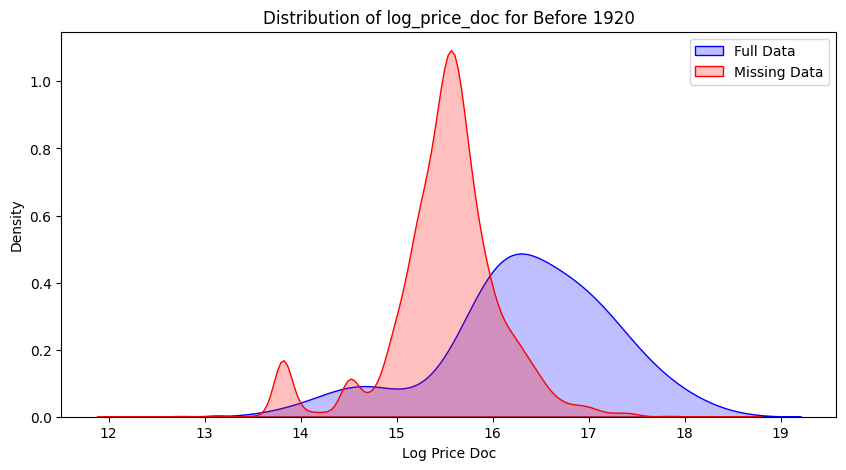

Statistics for Before 1920 (Full Data): {'Mean': 16.367530683053282, 'Median': 16.36848337279335, 'Mode': 14.508658238524095, 'Variance': 0.7199221534596564}
Statistics for (Missing Data): {'Mean': 15.507136714867041, 'Median': 15.54853852370266, 'Mode': 13.815511557963774, 'Variance': 0.3595430536830468}

Analyzing Build Year Bin: 1920-1939


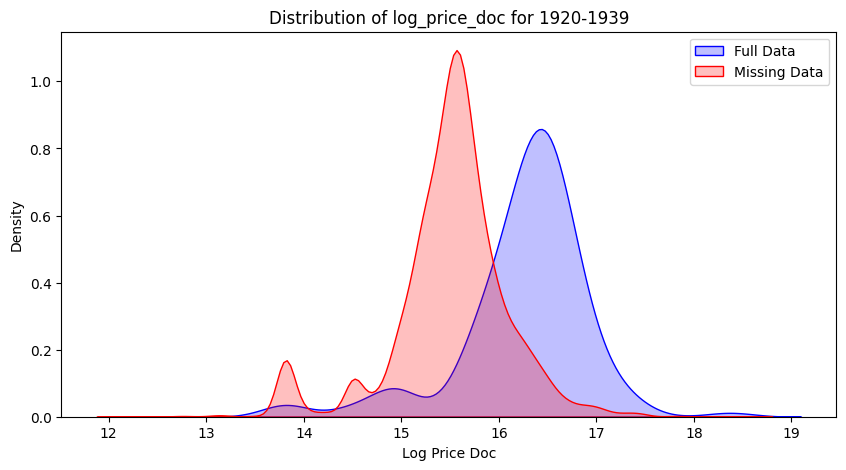

Statistics for 1920-1939 (Full Data): {'Mean': 16.25784245546654, 'Median': 16.372707899681863, 'Mode': 14.914123179965662, 'Variance': 0.42464447599768546}
Statistics for (Missing Data): {'Mean': 15.507136714867041, 'Median': 15.54853852370266, 'Mode': 13.815511557963774, 'Variance': 0.3595430536830468}

Analyzing Build Year Bin: 1940-1959


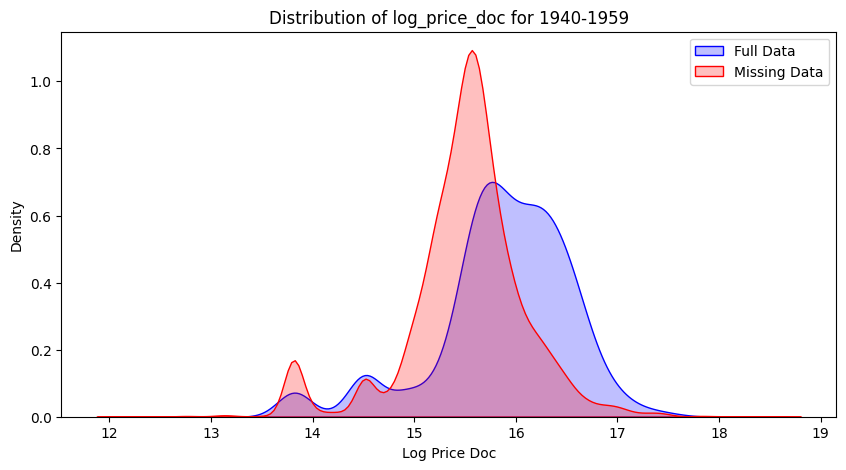

Statistics for 1940-1959 (Full Data): {'Mean': 15.872351100030281, 'Median': 15.925723879522977, 'Mode': 14.508658238524095, 'Variance': 0.44723692031463935}
Statistics for (Missing Data): {'Mean': 15.507136714867041, 'Median': 15.54853852370266, 'Mode': 13.815511557963774, 'Variance': 0.3595430536830468}

Analyzing Build Year Bin: 1960-1979


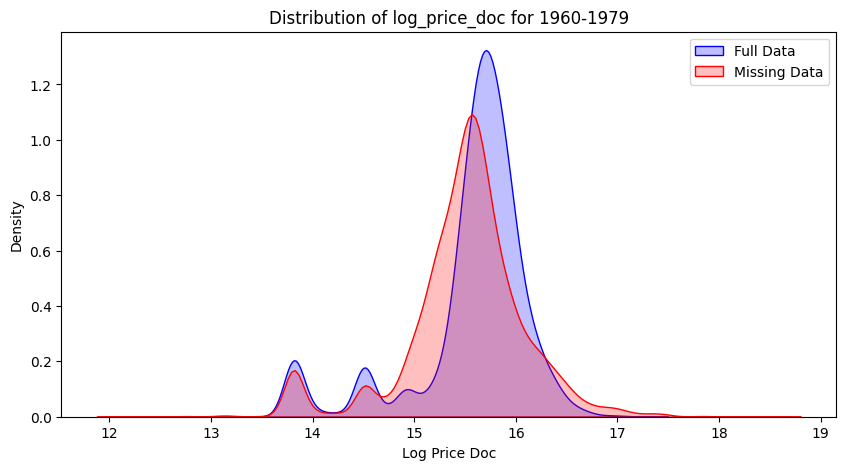

Statistics for 1960-1979 (Full Data): {'Mean': 15.569158006217942, 'Median': 15.687312888712007, 'Mode': 14.508658238524095, 'Variance': 0.33034469903223834}
Statistics for (Missing Data): {'Mean': 15.507136714867041, 'Median': 15.54853852370266, 'Mode': 13.815511557963774, 'Variance': 0.3595430536830468}

Analyzing Build Year Bin: 1980-1999


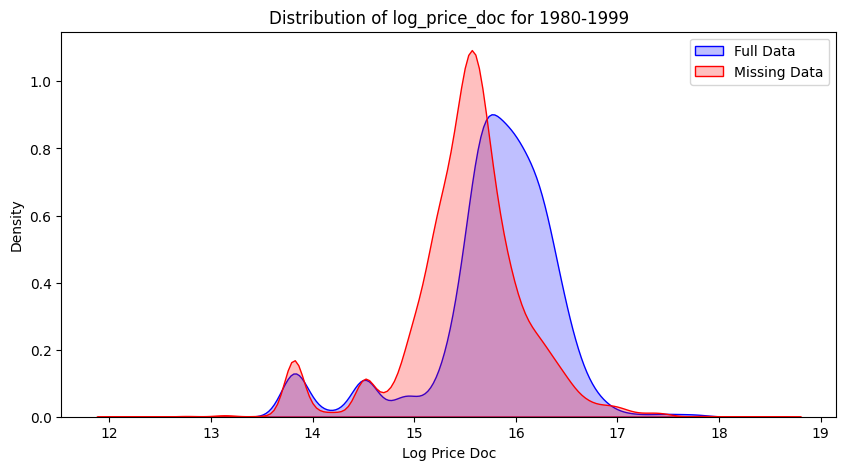

Statistics for 1980-1999 (Full Data): {'Mean': 15.784065371966822, 'Median': 15.86963441986494, 'Mode': 13.815511557963774, 'Variance': 0.3982387921108476}
Statistics for (Missing Data): {'Mean': 15.507136714867041, 'Median': 15.54853852370266, 'Mode': 13.815511557963774, 'Variance': 0.3595430536830468}

Analyzing Build Year Bin: 2000-2019


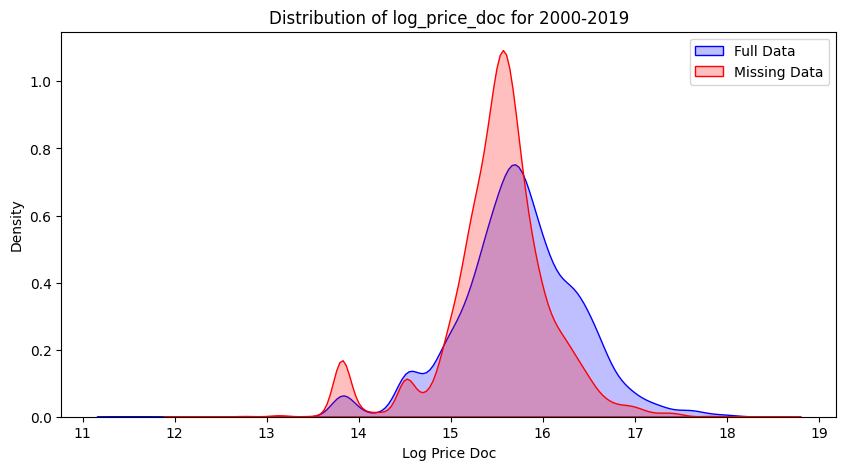

Statistics for 2000-2019 (Full Data): {'Mean': 15.721841148279537, 'Median': 15.717468968766404, 'Mode': 14.508658238524095, 'Variance': 0.4410961785290422}
Statistics for (Missing Data): {'Mean': 15.507136714867041, 'Median': 15.54853852370266, 'Mode': 13.815511557963774, 'Variance': 0.3595430536830468}


In [ ]:
numerical_features = ['full_sq', 'life_sq', 'floor', 'log_price_doc']

# Iterate over each bin and analyze log_price_doc distribution, correlation matrix, and metrics
for bin_label in bin_labels:
    print(f"\nAnalyzing Build Year Bin: {bin_label}")

    # Filter data for the current bin
    bin_data = train_plot[train_plot['build_year_bin'] == bin_label]
    # Ensure data is not empty before proceeding

    plt.figure(figsize=(10, 5))
    sns.kdeplot(bin_data['log_price_doc'], label="Full Data", fill=True, color="blue")
    sns.kdeplot(house_price_missing['log_price_doc'], label="Missing Data", fill=True, color="red")
    plt.title(f"Distribution of log_price_doc for {bin_label}")
    plt.xlabel("Log Price Doc")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


    stats_full = {
    "Mean": np.mean(bin_data['log_price_doc']),
    "Median": np.median(bin_data['log_price_doc']),
    "Mode": bin_data['log_price_doc'].mode().values[0] if not bin_data['log_price_doc'].mode().empty else np.nan,
    "Variance": np.var(bin_data['log_price_doc'])
    }

    stats_missing = {
        "Mean": np.mean(house_price_missing['log_price_doc']),
        "Median": np.median(house_price_missing['log_price_doc']),
        "Mode": house_price_missing['log_price_doc'].mode().values[0] if not house_price_missing['log_price_doc'].mode().empty else np.nan,
        "Variance": np.var(house_price_missing['log_price_doc'])
    }

    print(f"Statistics for {bin_label} (Full Data): {stats_full}")
    print(f"Statistics for (Missing Data): {stats_missing}")

In [ ]:
train_filtered = train_original.copy()
train_filtered = train_filtered.dropna(subset=['build_year'])
# Calculate the minimum timestamp date
min_date = train_filtered['timestamp'].min()

# Display result
print("Minimum timestamp in train after filtering NaN build_year:", min_date)

# Count rows before 2013-05-21 where build_year is NOT NaN
pre_may_2013 = train[(train['timestamp'] < "2013-05-21") & (train['build_year'].notna())]

# Display the result
print("Rows before 2013-05-21 with a known build_year:", len(pre_may_2013))

Minimum timestamp in train after filtering NaN build_year: 2013-05-21
Rows before 2013-05-21 with a known build_year: 0


<Figure size 1400x600 with 0 Axes>

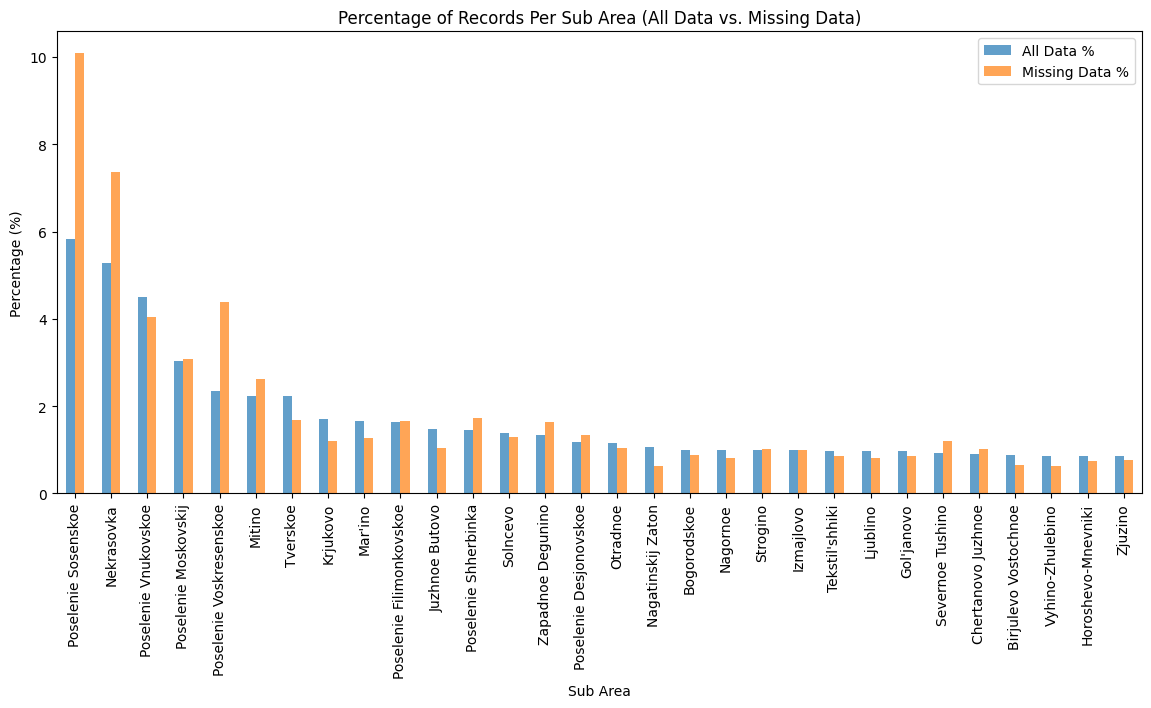

In [ ]:
# SUB-AREA ANALYSIS

sub_area_missing = house_price_missing['sub_area'].value_counts()
sub_area_all = train['sub_area'].value_counts()

# Convert to percentage relative to each dataset
sub_area_df = pd.DataFrame({
    'All Data %': (sub_area_all / sub_area_all.sum()) * 100,
    'Missing Data %': (sub_area_missing / sub_area_missing.sum()) * 100
}).fillna(0)

# Sort by overall presence in the dataset
sub_area_df.sort_values(by='All Data %', ascending=False, inplace=True)

# Plot missing percentage vs. total percentage per sub_area
plt.figure(figsize=(14, 6))
sub_area_df.head(30).plot(kind='bar', stacked=False, figsize=(14, 6), alpha=0.7)
plt.title("Percentage of Records Per Sub Area (All Data vs. Missing Data)")
plt.xlabel("Sub Area")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.legend(["All Data %", "Missing Data %"])
plt.show()


<Figure size 1000x500 with 0 Axes>

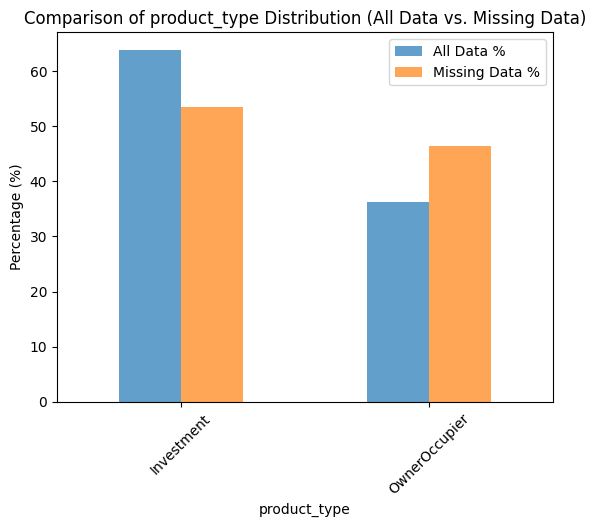

In [ ]:
categorical_features = ['product_type']

for col in categorical_features:
    # Get category distributions in missing data and full dataset
    cat_missing = house_price_missing[col].value_counts(normalize=True) * 100
    cat_all = train[col].value_counts(normalize=True) * 100

    # Merge into a single DataFrame for comparison
    cat_df = pd.DataFrame({'All Data %': cat_all, 'Missing Data %': cat_missing}).fillna(0)
    cat_df.sort_values(by='All Data %', ascending=False, inplace=True)

    # Plot categorical comparison
    plt.figure(figsize=(10, 5))
    cat_df.plot(kind='bar', stacked=False, alpha=0.7)
    plt.title(f"Comparison of {col} Distribution (All Data vs. Missing Data)")
    plt.xlabel(col)
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.legend(["All Data %", "Missing Data %"])
    plt.show()

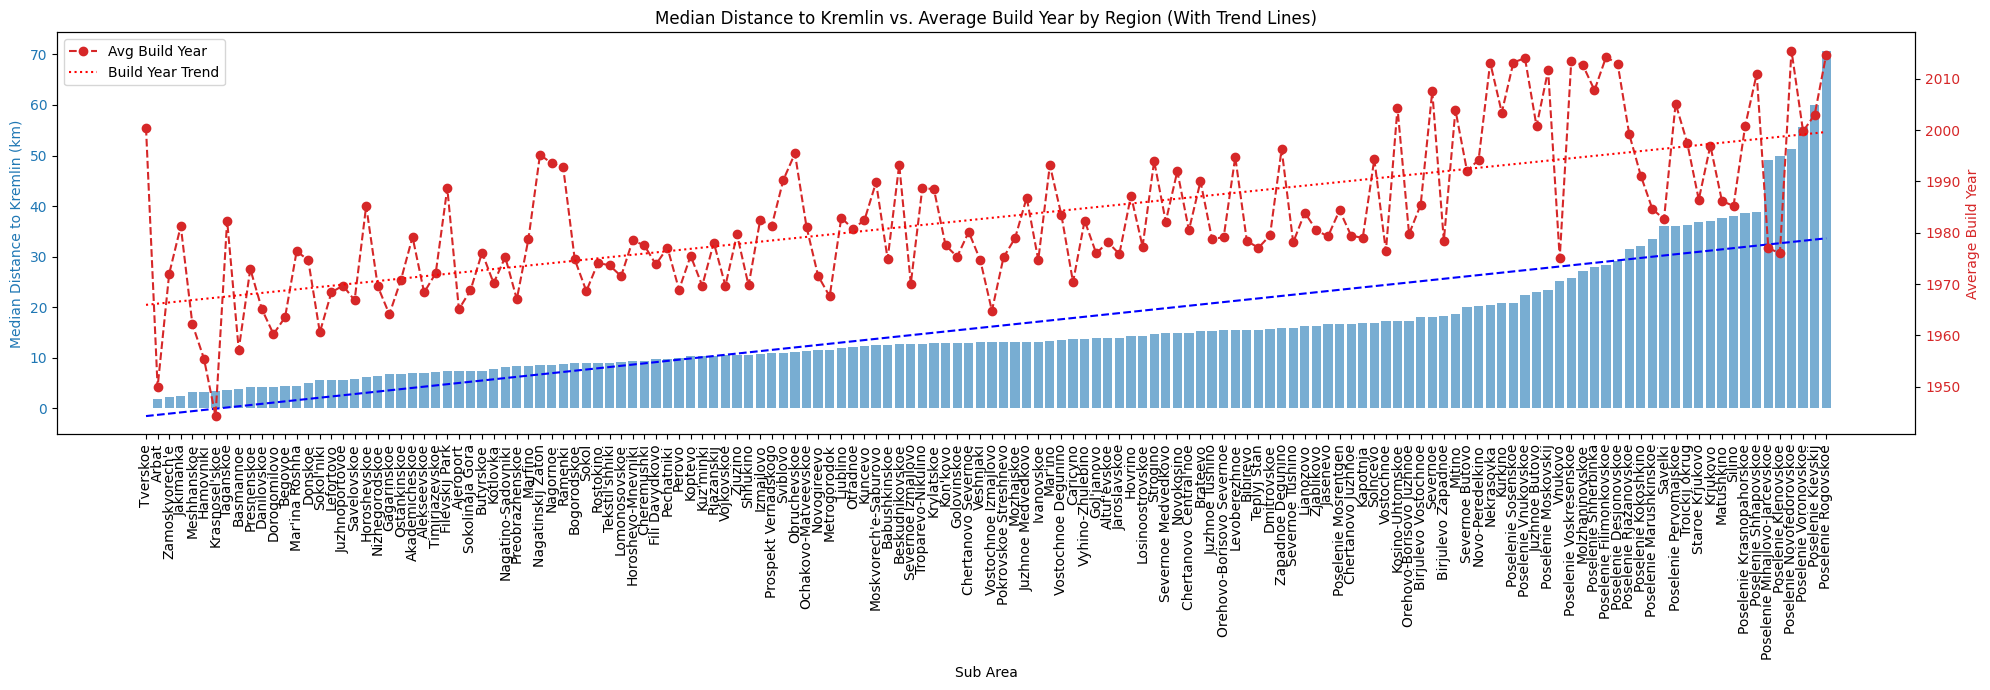

In [ ]:
# Calculate median distance to Kremlin for each region
median_distance = train.groupby('sub_area')['kremlin_km'].median()

# Calculate the average build_year for each region
average_build_year = train.groupby('sub_area')['build_year'].mean()

# Combine into a DataFrame
region_stats = pd.DataFrame({'Median Distance to Kremlin': median_distance, 'Average Build Year': average_build_year})

# Sort by median distance to Kremlin
region_stats = region_stats.sort_values(by='Median Distance to Kremlin')

# Plot distance and average build year
fig, ax1 = plt.subplots(figsize=(20, 7))

# Plot Median Distance to Kremlin
color = 'tab:blue'
ax1.set_xlabel('Sub Area')
ax1.set_ylabel('Median Distance to Kremlin (km)', color=color)
ax1.bar(region_stats.index, region_stats['Median Distance to Kremlin'], color=color, alpha=0.6, label="Median Distance")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

# Fit a trend line for Median Distance to Kremlin
x_values = np.arange(len(region_stats))
y_values = region_stats['Median Distance to Kremlin'].values
z = np.polyfit(x_values, y_values, 1)  # Linear trend
p = np.poly1d(z)
ax1.plot(region_stats.index, p(x_values), color='blue', linestyle='dashed', label="Distance Trend")

# Plot Average Build Year on a second axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Build Year', color=color)
ax2.plot(region_stats.index, region_stats['Average Build Year'], color=color, marker='o', linestyle='dashed', label="Avg Build Year")
ax2.tick_params(axis='y', labelcolor=color)

# Fit a trend line for Average Build Year
y_values2 = region_stats['Average Build Year'].values
z2 = np.polyfit(x_values, y_values2, 1)  # Linear trend
p2 = np.poly1d(z2)
ax2.plot(region_stats.index, p2(x_values), color='red', linestyle='dotted', label="Build Year Trend")

# Title and legend
plt.title("Median Distance to Kremlin vs. Average Build Year by Region (With Trend Lines)")
fig.tight_layout()
plt.legend()
plt.show()


In [ ]:
# few takes:
# 1. transactions between 2011 to mid 2013 had no info about the year the house was built
# 2. some regions had significantly more missing data in this time range
# 3.OwnerOccupier also shoud sagnificant change in na values
# 4. newer areas are Farther away to kremlin than older areas.
# this leads us to think that maybe the missing data in build year is connected for houses in those regions

In [ ]:
# couldnt be sure that there is a connection, so we chose to imputate na with the method below. we conclude that until mid 2013
# there was an issue entering the data in the features: max_floor, num_room, kitch_sq, material, state and build_year but couldnt trace it to a specific region or specific times wehre the house was built.

In [ ]:
train.loc[train["state"].notna(), "state"] = train["state"].dropna().astype(int)
train.loc[train["material"].notna(), "material"] = train["material"].dropna().astype(int)

# Print unique values to confirm conversion
print("Unique values in state after conversion:", train["state"].dropna().unique())
print("Unique values in material after conversion:", train["material"].dropna().unique())

unique_states_counts = train["state"].value_counts(dropna=True)
unique_material_counts = train["material"].value_counts(dropna=True)

# Print unique values and their counts
print("Unique values in state and their occurrences:")
print(unique_states_counts)
print("Unique material in state and their occurrences:")
print(unique_material_counts)



# probably a mistkae
train.loc[train["state"] == 33, "state"] = 3


state_category_mapping = {
    1: "Poor",
    2: "Decent",
    3: "Good",
    4: "Excellent"
}

material_category_mapping = {
    1: "type1",
    2: "type2",
    3: "type3",
    4: "type4",
    5: "type5",
    6: "type6"
}

# Map state and material columns to categorical labels
train["state"] = train["state"].map(state_category_mapping)
train["material"] = train["material"].map(material_category_mapping)

unique_states_counts = train["state"].value_counts(dropna=True)
unique_material_counts = train["material"].value_counts(dropna=True)

# Print unique values and their counts
print("Unique values in state and their occurrences:")
print(unique_states_counts)
print("Unique material in state and their occurrences:")
print(unique_material_counts)



Unique values in state after conversion: [ 3.  1.  2.  4. 33.]
Unique values in material after conversion: [1. 2. 4. 6. 5. 3.]
Unique values in state and their occurrences:
state
2.00     5844
3.00     5790
1.00     4855
4.00      422
33.00       1
Name: count, dtype: int64
Unique material in state and their occurrences:
material
1.00    14197
2.00     2993
5.00     1561
4.00     1344
6.00      803
3.00        1
Name: count, dtype: int64
Unique values in state and their occurrences:
state
Decent       5844
Good         5791
Poor         4855
Excellent     422
Name: count, dtype: int64
Unique material in state and their occurrences:
material
type1    14197
type2     2993
type5     1561
type4     1344
type6      803
type3        1
Name: count, dtype: int64


In [ ]:
def fill_mode_with_fallback(df, col, train_reference):
    overall_mode = train_reference[col].mode()[0]  # Get mode from train

    # Fill NA within each 'sub_area' group using mode from train_reference
    df[col] = df.groupby('sub_area')[col].transform(
        lambda x: x.fillna(train_reference.groupby('sub_area')[col].transform(lambda y: y.mode()[0] if not y.mode().empty else np.nan))
    )

    # Fill remaining NA with overall mode from train_reference
    df[col] = df[col].fillna(overall_mode)
    return df

# Apply to Train (Original Logic)
train = fill_mode_with_fallback(train, 'state', train)
train = fill_mode_with_fallback(train, 'material', train)

# Apply to Test using Train Statistics
test = fill_mode_with_fallback(test, 'state', train)
test = fill_mode_with_fallback(test, 'material', train)

# Check if missing values remain
print("Missing values after imputation in Train:")
print(train[['state', 'material']].isna().sum())

print("\nMissing values after imputation in Test:")
print(test[['state', 'material']].isna().sum())


<ipython-input-44-f746dc6a481b>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(train_reference.groupby('sub_area')[col].transform(lambda y: y.mode()[0] if not y.mode().empty else np.nan))


Missing values after imputation in Train:
state       0
material    0
dtype: int64

Missing values after imputation in Test:
state       0
material    0
dtype: int64


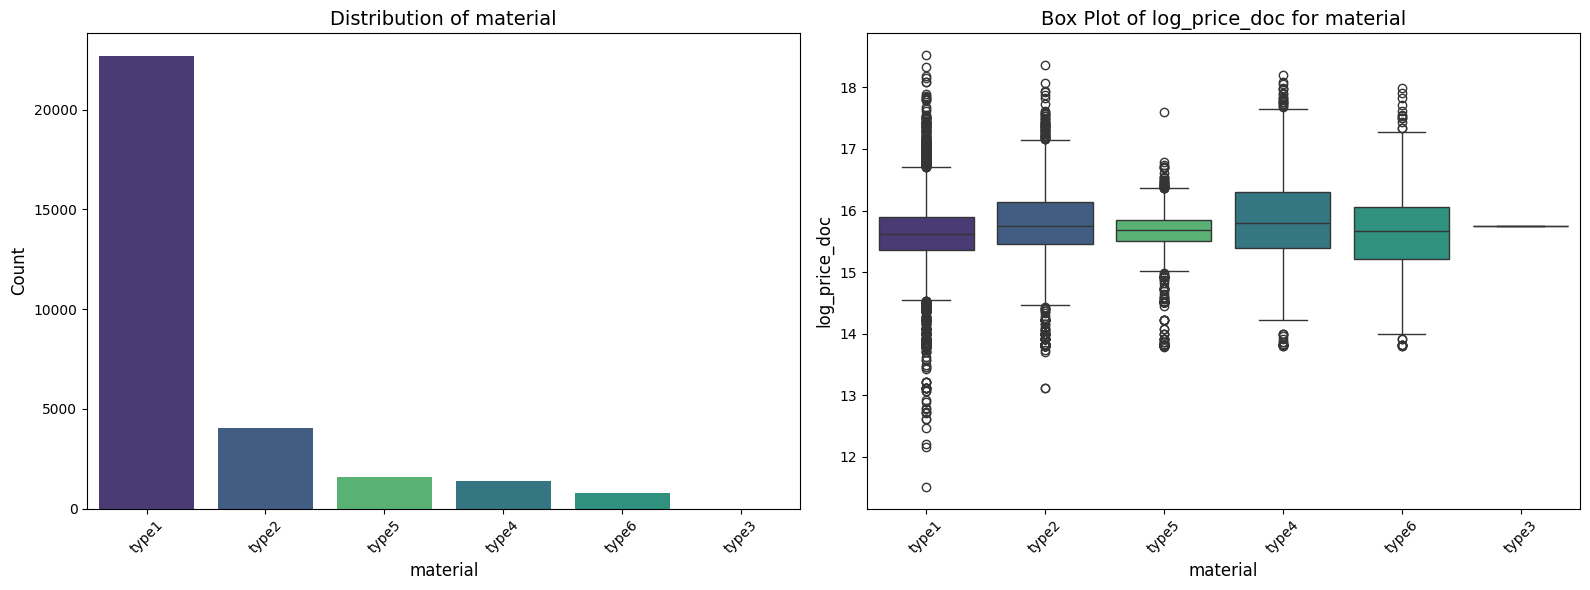

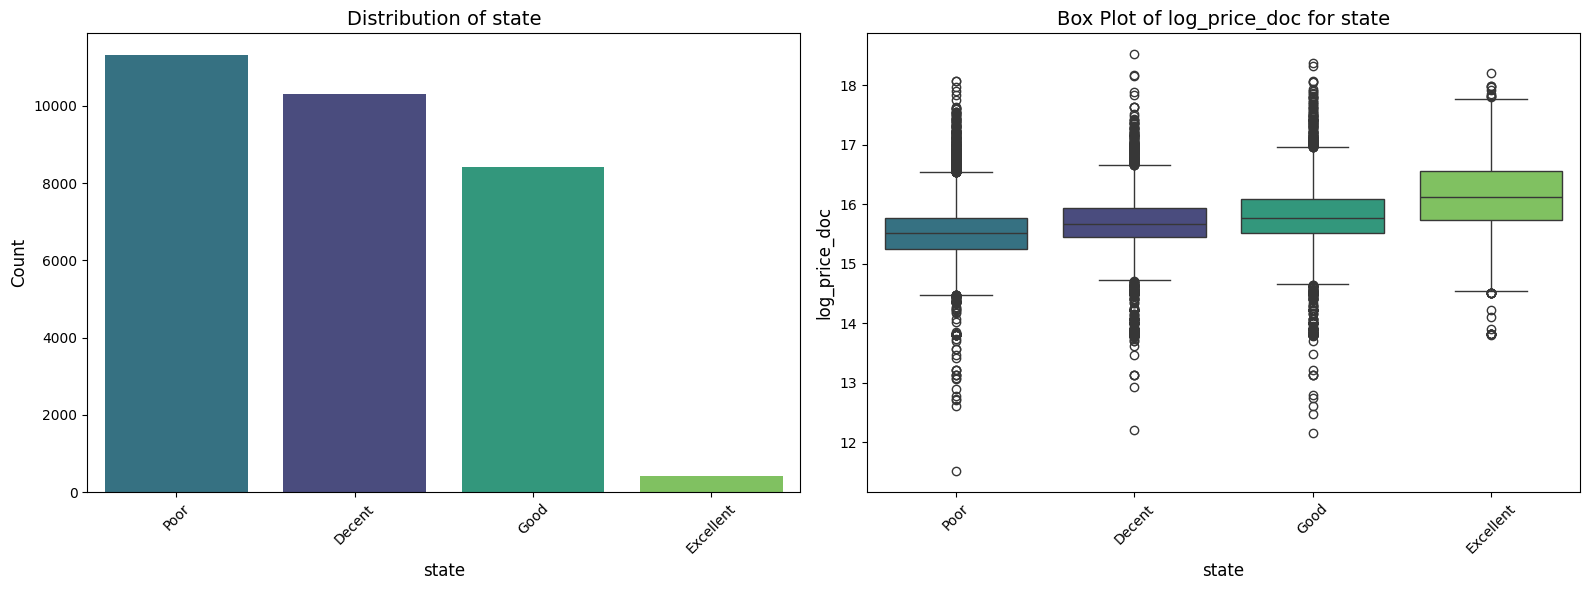

In [ ]:
# List of categorical columns to plot
categorical_columns = ['material', 'state']

# Loop through categorical columns and plot count & box plots
for col in categorical_columns:
    plt.figure(figsize=(16, 6))

    # Count Plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=train, x=col, palette='viridis', hue=col, order=train[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train, x=col, y="log_price_doc", palette='viridis', hue=col, order=train[col].value_counts().index)
    plt.title(f'Box Plot of log_price_doc for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('log_price_doc', fontsize=12)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# Ensure grouping features are of the same type in both train and test
grouping_features = ['ID_metro', 'sub_area', 'material']

for col in grouping_features:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

# Define function for test imputation based on train
def impute_test_based_on_train(test_df, train_df, col, group_cols):

    # Compute median values from train and store in dictionary
    median_map = train_df.groupby(group_cols)[col].median().to_dict()

    # Apply median imputation based on matching group
    test_df[col] = test_df.apply(
        lambda row: median_map.get(tuple(row[group_cols]), np.nan) if pd.isna(row[col]) else row[col], axis=1
    )

    # Fill remaining missing values with global median from train
    test_df[col] = test_df[col].fillna(train_df[col].median())
    return test_df

# Impute Train Data First
for col in ['floor', 'max_floor', 'kitch_sq', 'life_sq', 'num_room', 'build_year']:
    if train[col].notna().sum() > 0:  # Only apply if train has valid data
        train[col] = train.groupby(grouping_features)[col].transform(lambda x: x.fillna(x.median()))

    # Fill any remaining NA with overall median of train
    train[col] = train[col].fillna(train[col].median())

# Apply Imputation to Test Data Using Train
for col in ['floor', 'max_floor', 'kitch_sq', 'life_sq', 'num_room']:
    test = impute_test_based_on_train(test, train, col, grouping_features)

# Final Check: Print Missing Values After Imputation
print("Missing values after imputation in Train:")
print(train[['floor', 'max_floor', 'kitch_sq', 'life_sq', 'num_room']].isna().sum())

print("\nMissing values after imputation in Test:")
print(test[['floor', 'max_floor', 'kitch_sq', 'life_sq', 'num_room']].isna().sum())


Missing values after imputation in Train:
floor        0
max_floor    0
kitch_sq     0
life_sq      0
num_room     0
dtype: int64

Missing values after imputation in Test:
floor        0
max_floor    0
kitch_sq     0
life_sq      0
num_room     0
dtype: int64


In [ ]:
missing_values = train.isna().sum()
missing_percentager = (missing_values / len(train)) * 100

# Create a DataFrame summarizing missing values after imputation
na_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage (%)': missing_percentager.values
})

# Filter columns with missing percentage > 0
na_summary = na_summary[na_summary['Percentage (%)'] > 0].sort_values(by='Percentage (%)', ascending=True)

# Display the summary
print("Columns with Missing Values:")
print(na_summary)


Columns with Missing Values:
Empty DataFrame
Columns: [Column, Missing Values, Percentage (%)]
Index: []


In [ ]:
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="geo_locator", timeout=10)

# Function to get coordinates for each sub_area
def get_coordinates(sub_area):
    try:
        location = geolocator.geocode(f"{sub_area}, Moscow, Russia")
        if location:
            return (location.latitude, location.longitude)
    except Exception as e:
        print(f"Error retrieving coordinates for {sub_area}: {e}")
    return (None, None)

# Group by sub_area and calculate the mean log_price_doc
sub_area_prices = train.groupby('sub_area')['price_doc'].median().reset_index()

# Get coordinates for each sub_area
sub_area_prices[['Latitude', 'Longitude']] = sub_area_prices['sub_area'].apply(
    lambda x: pd.Series(get_coordinates(x))
)

# Remove rows where coordinates are missing
sub_area_prices = sub_area_prices.dropna()

# Create a Folium map centered around Moscow
moscow_map = folium.Map(location=[55.751244, 37.618423], zoom_start=10)

# Create a heatmap layer
heat_data = sub_area_prices[['Latitude', 'Longitude', 'price_doc']].values.tolist()
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(moscow_map)


# Display the map
moscow_map


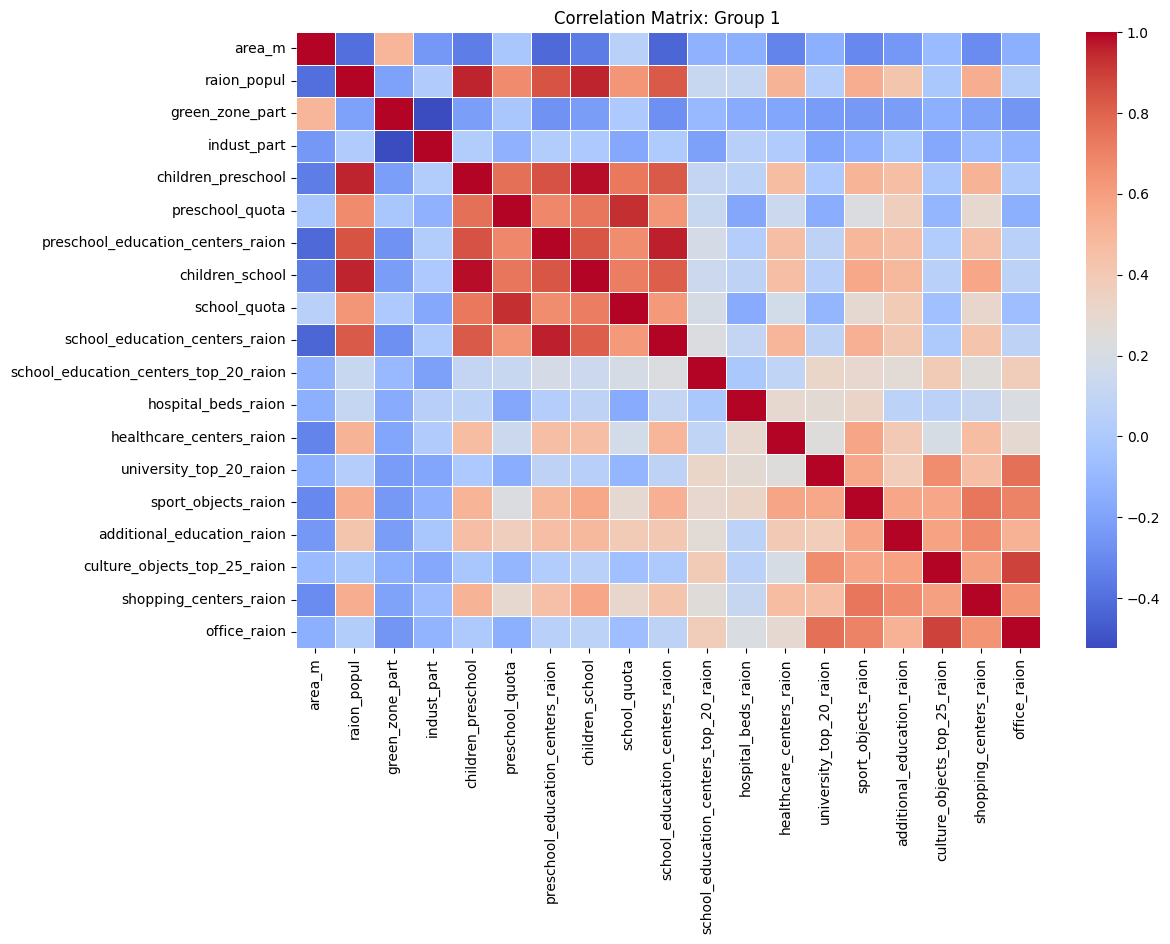

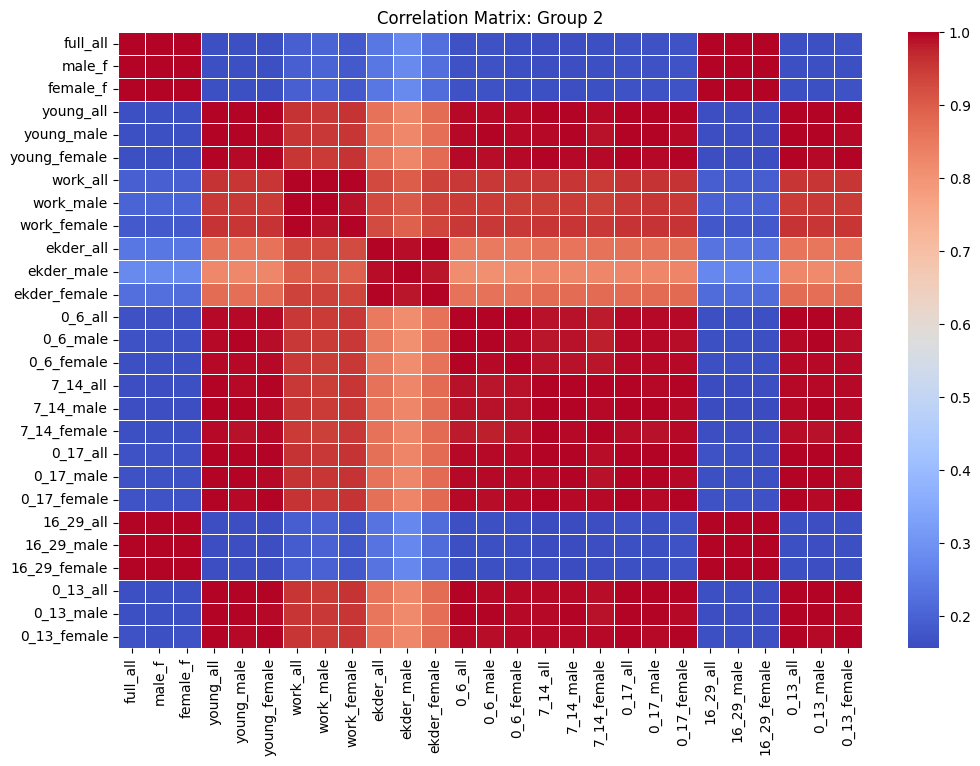

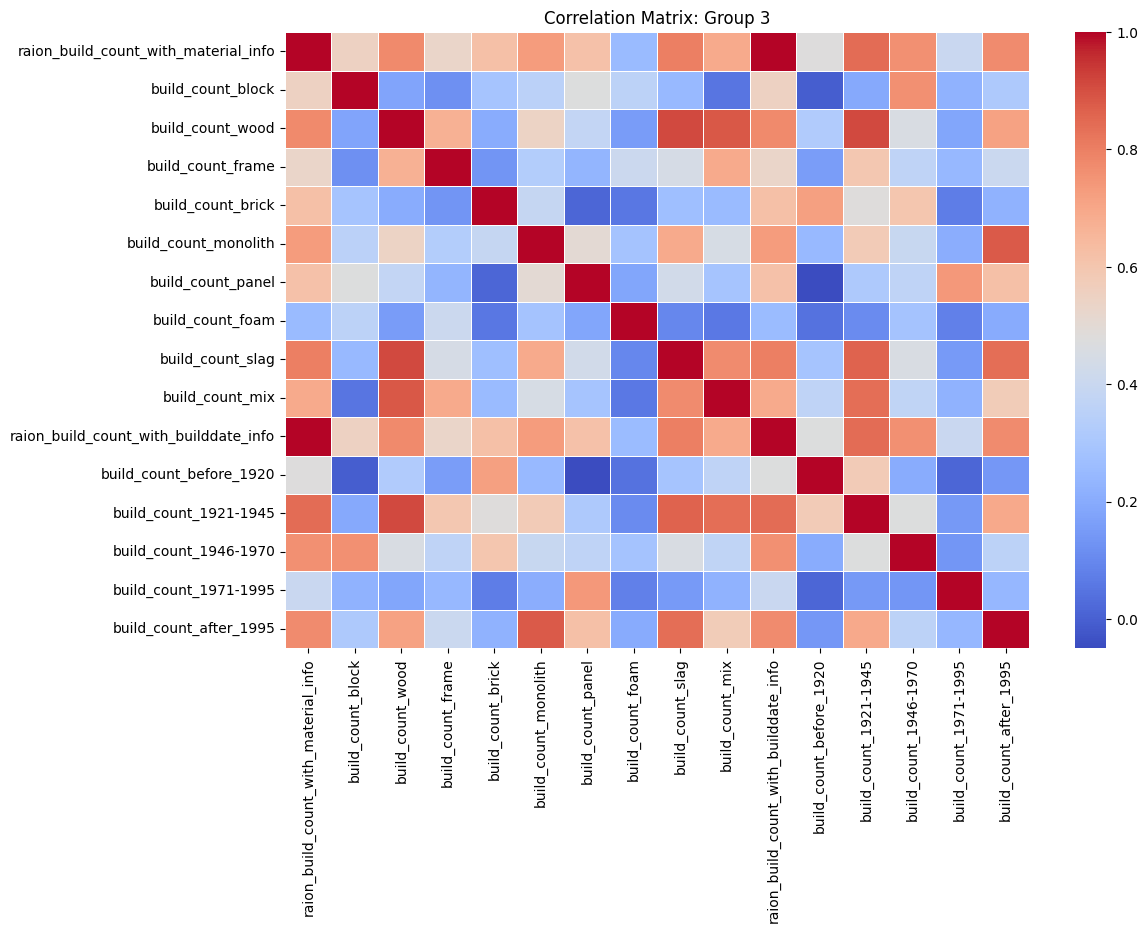

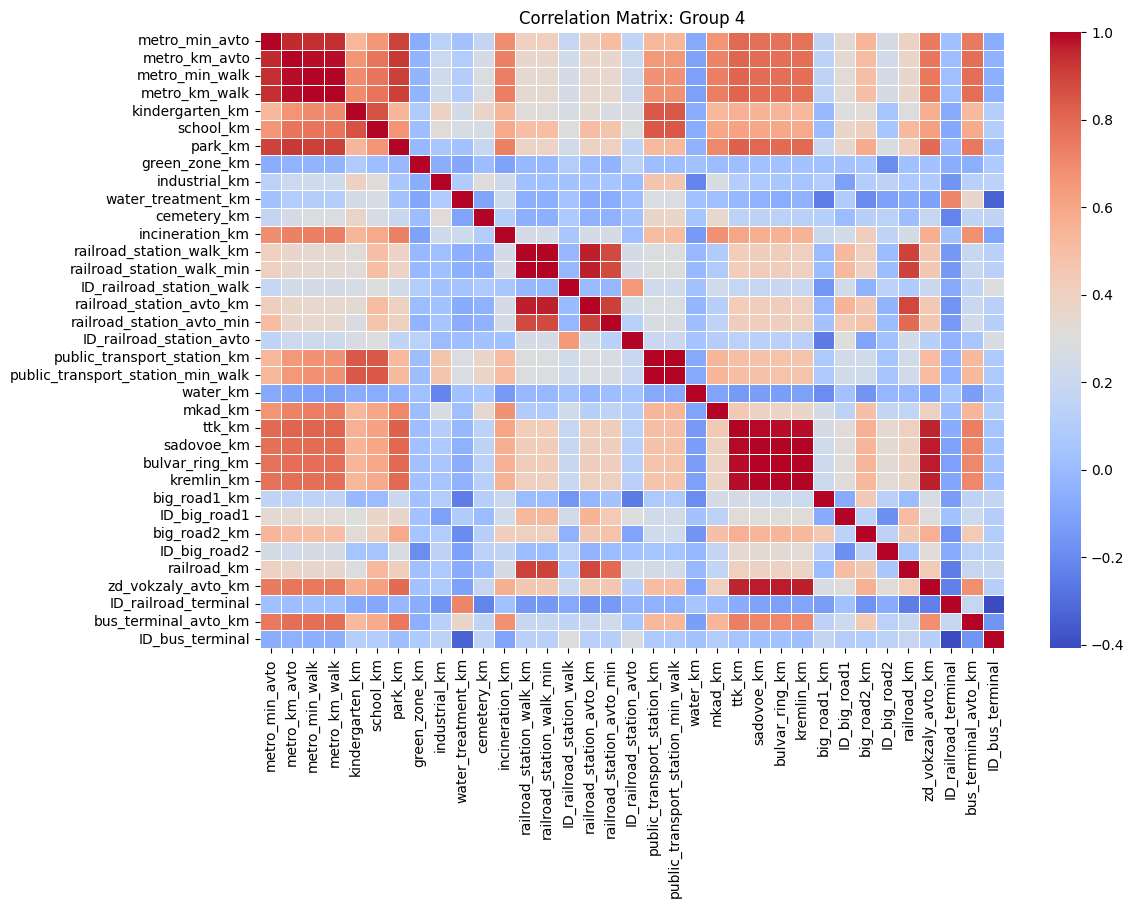

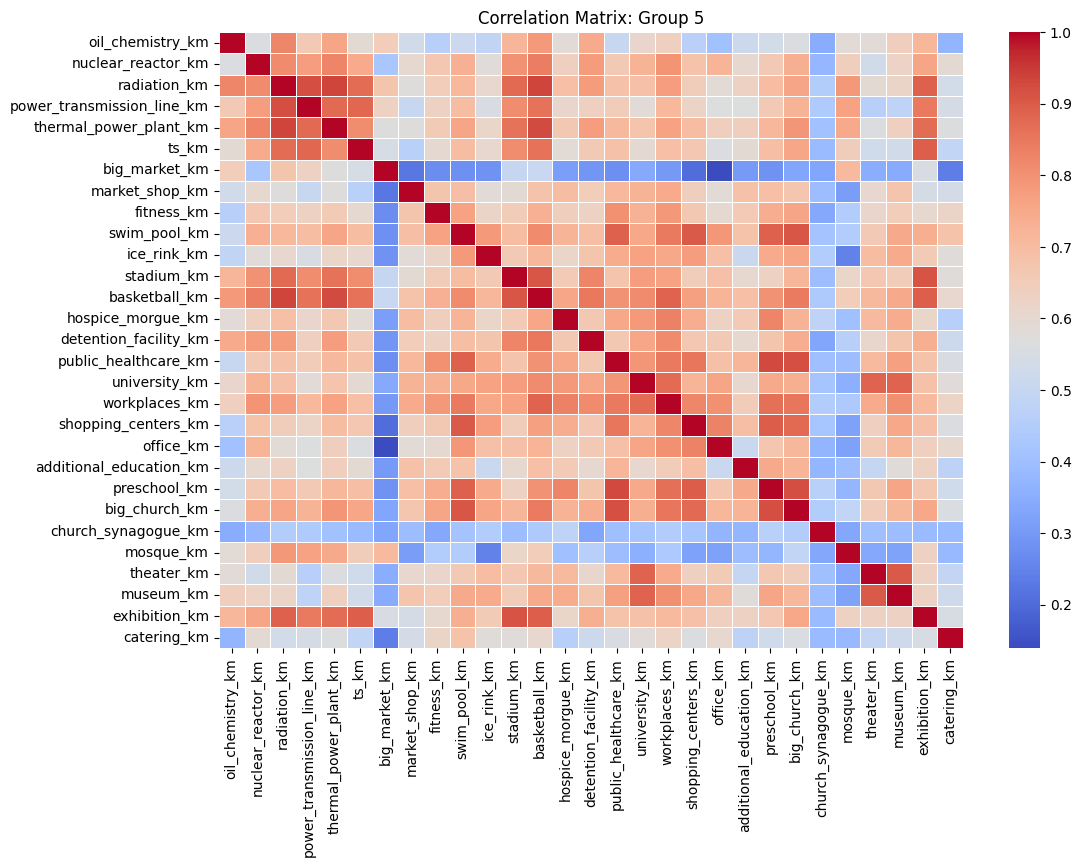

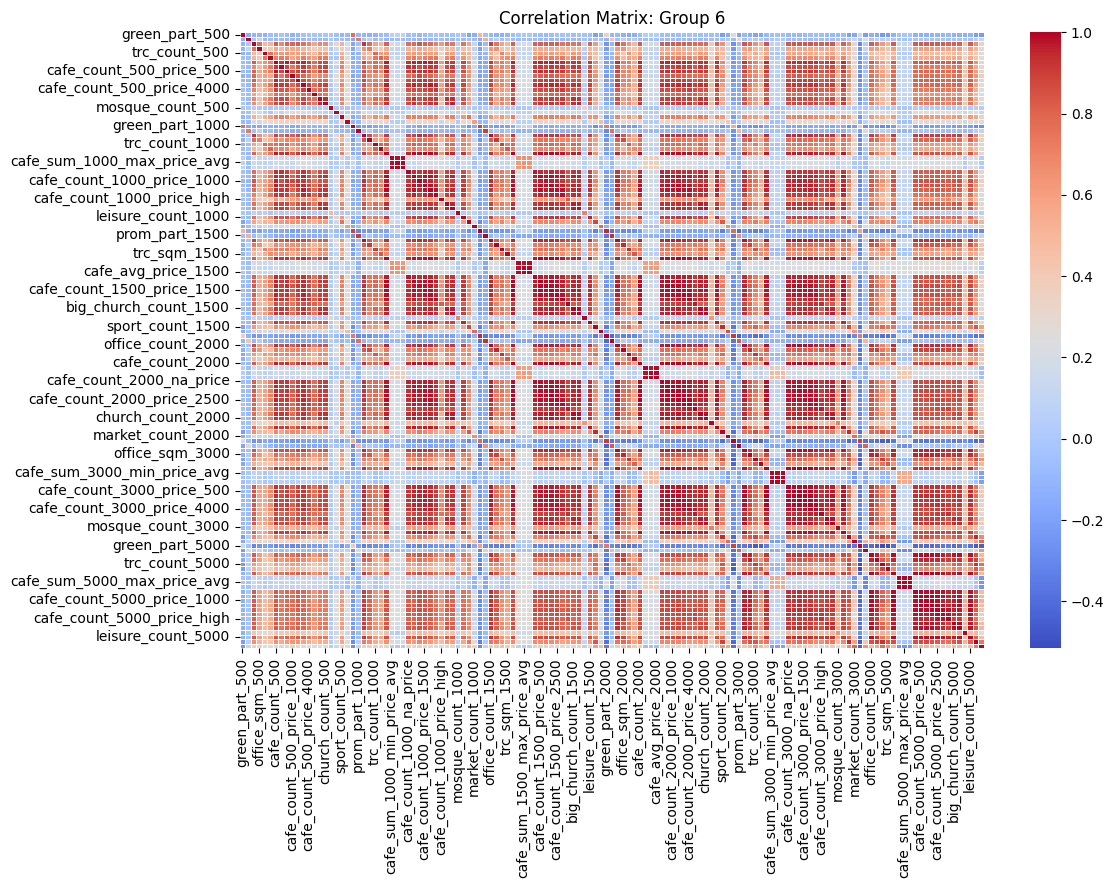

In [ ]:
def plot_correlation_matrix(df, group, group_name):
    # Ensure all selected columns are numeric
    numeric_df = df[group].apply(pd.to_numeric, errors='coerce')

    # Drop columns with all NaN values
    numeric_df = numeric_df.dropna(axis=1, how='all')

    if numeric_df.empty:
        print(f"No valid numeric columns for {group_name}")
        return

    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix: {group_name}')
    plt.show()

# Define column groups
groups = {
    "Group 1": ["area_m", "raion_popul", "green_zone_part", "indust_part", "children_preschool", "preschool_quota",
                "preschool_education_centers_raion", "children_school", "school_quota", "school_education_centers_raion",
                "school_education_centers_top_20_raion", "hospital_beds_raion", "healthcare_centers_raion",
                "university_top_20_raion", "sport_objects_raion", "additional_education_raion", "culture_objects_top_25",
                "culture_objects_top_25_raion", "shopping_centers_raion", "office_raion"],
    "Group 2": ["full_all", "male_f", "female_f", "young_all", "young_male", "young_female", "work_all", "work_male", "work_female",
                "ekder_all", "ekder_male", "ekder_female", "0_6_all", "0_6_male", "0_6_female", "7_14_all", "7_14_male", "7_14_female",
                "0_17_all", "0_17_male", "0_17_female", "16_29_all", "16_29_male", "16_29_female", "0_13_all", "0_13_male", "0_13_female"],
    "Group 3": ["raion_build_count_with_material_info", "build_count_block", "build_count_wood", "build_count_frame", "build_count_brick",
                "build_count_monolith", "build_count_panel", "build_count_foam", "build_count_slag", "build_count_mix",
                "raion_build_count_with_builddate_info", "build_count_before_1920", "build_count_1921-1945", "build_count_1946-1970",
                "build_count_1971-1995", "build_count_after_1995"],
    "Group 4": ["metro_min_avto", "metro_km_avto", "metro_min_walk", "metro_km_walk", "kindergarten_km", "school_km", "park_km", "green_zone_km",
                "industrial_km", "water_treatment_km", "cemetery_km", "incineration_km", "railroad_station_walk_km", "railroad_station_walk_min",
                "ID_railroad_station_walk", "railroad_station_avto_km", "railroad_station_avto_min", "ID_railroad_station_avto",
                "public_transport_station_km", "public_transport_station_min_walk", "water_km", "water_1line", "mkad_km", "ttk_km", "sadovoe_km",
                "bulvar_ring_km", "kremlin_km", "big_road1_km", "ID_big_road1", "big_road1_1line", "big_road2_km", "ID_big_road2", "railroad_km",
                "railroad_1line", "zd_vokzaly_avto_km", "ID_railroad_terminal", "bus_terminal_avto_km", "ID_bus_terminal"],
    "Group 5": ["oil_chemistry_km", "nuclear_reactor_km", "radiation_km", "power_transmission_line_km", "thermal_power_plant_km", "ts_km",
                "big_market_km", "market_shop_km", "fitness_km", "swim_pool_km", "ice_rink_km", "stadium_km", "basketball_km", "hospice_morgue_km",
                "detention_facility_km", "public_healthcare_km", "university_km", "workplaces_km", "shopping_centers_km", "office_km",
                "additional_education_km", "preschool_km", "big_church_km", "church_synagogue_km", "mosque_km", "theater_km", "museum_km",
                "exhibition_km", "catering_km"],
    "Group 6": [col for col in train.columns if "500" in col or "1000" in col or "1500" in col or "2000" in col or "3000" in col or "5000" in col]
}

# Plot correlation matrices
for group_name, group_columns in groups.items():
    valid_columns = [col for col in group_columns if col in train.columns]  # Ensure columns exist
    if valid_columns:
        plot_correlation_matrix(train, valid_columns, group_name)
    else:
        print(f"No valid columns for {group_name}")


In [ ]:
# Define groups based on the images
feature_groups = {
    "Group 1": ["children_preschool", "preschool_quota", "preschool_education_centers_raion",
                "children_school", "school_quota"],
    "Group 2": ["0_6_all", "0_6_male", "0_6_female", "7_14_all", "7_14_male", "7_14_female",
                "0_17_all", "0_17_male", "0_17_female"],
    "Group 3": ["ttk_km", "sadovoe_km", "bulvar_ring_km"],
    "Group 4": ["metro_min_avto", "metro_km_avto", "metro_min_walk", "metro_km_walk"],
    "Group 5": ["kremlin_km"]  # Delete all and keep only kremlin_km
}

# Flatten the list of features to be considered
all_features = [feature for group in feature_groups.values() for feature in group]

# Ensure only these features exist in the DataFrame before computing correlations
valid_features = [feature for feature in all_features if feature in train.columns]

# Compute correlations only for the valid features
correlations = train[valid_features].corrwith(train["log_price_doc"]).abs()

# Select the highest correlated feature in each group (except Group 5 where we keep only kremlin_km)
selected_features = []

for group, features in feature_groups.items():
    valid_group_features = [feature for feature in features if feature in train.columns]
    if group == "Group 5":  # Keep only kremlin_km
        selected_features.append("kremlin_km")
    elif valid_group_features:  # Check if the group has valid features
        highest_corr_feature = correlations[valid_group_features].idxmax()
        selected_features.append(highest_corr_feature)

# Drop only the unselected features from feature_groups, keeping all other columns in train
features_to_drop = set(all_features) - set(selected_features)
train.drop(columns=features_to_drop, inplace=True, errors="ignore")
test.drop(columns=features_to_drop, inplace=True, errors="ignore")

# Print the selected and dropped features
print("Selected features:", selected_features)
print("Dropped features:", features_to_drop)


Selected features: ['preschool_education_centers_raion', '7_14_female', 'sadovoe_km', 'metro_min_avto', 'kremlin_km']
Dropped features: {'0_6_all', '7_14_male', 'children_preschool', 'bulvar_ring_km', 'school_quota', '0_17_female', 'ttk_km', 'preschool_quota', 'children_school', 'metro_km_walk', 'metro_min_walk', '0_6_male', 'metro_km_avto', '0_17_all', '0_6_female', '7_14_all', '0_17_male'}


In [ ]:
train = train.drop(columns=[col for col in train.columns if 'ID' in col])
test = test.drop(columns=[col for col in test.columns if 'ID' in col])


train["timestamp"] = pd.to_datetime(train["timestamp"])
train["year"] = train["timestamp"].dt.year
train["month"] = train["timestamp"].dt.month
train["year_month"] = train["timestamp"].dt.to_period("M").astype(str)

test["timestamp"] = pd.to_datetime(test["timestamp"])
test["year"] = test["timestamp"].dt.year
test["month"] = test["timestamp"].dt.month
test["year_month"] = test["timestamp"].dt.to_period("M").astype(str)



<ipython-input-51-c0aac5216d7d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["year"] = test["timestamp"].dt.year
<ipython-input-51-c0aac5216d7d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["month"] = test["timestamp"].dt.month
<ipython-input-51-c0aac5216d7d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

In [ ]:
def apply_feature_engineering(df):
    df['resident_to_total_ratio'] = df['life_sq'] / df['full_sq']
    df['kitchen_to_total_ratio'] = df['kitch_sq'] / df['full_sq']
    df['avg_room_area'] = df['life_sq'] / df['num_room']

    # Demographic structures of subareas:
    df['young_proportion'] = df['young_all'] / df['full_all']
    df['work_proportion'] = df['work_all'] / df['full_all']
    df['retire_proportion'] = df['ekder_all'] / df['full_all']
    df['female_to_male'] = df['female_f'] / df['male_f']

    # Flags for building size
    df['large_flag'] = np.where(df['max_floor'] >= 20, 1, 0)
    df['small_flag'] = np.where(df['max_floor'] <= 20, 1, 0)

    return df

# Apply feature engineering to both train and test datasets
train = apply_feature_engineering(train)
test = apply_feature_engineering(test)



<ipython-input-52-96dfb137ff5f>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['resident_to_total_ratio'] = df['life_sq'] / df['full_sq']
<ipython-input-52-96dfb137ff5f>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['kitchen_to_total_ratio'] = df['kitch_sq'] / df['full_sq']
<ipython-input-52-96dfb137ff5f>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

In [ ]:
# noticed some values in product type were nan

unique_values = test['product_type'].unique()
value_counts = test['product_type'].value_counts(dropna=False)

print("Unique values in 'product_type' column:")
print(unique_values)
print("Count of each unique value (including NaN):")
print(value_counts)



Unique values in 'product_type' column:
['Investment' 'OwnerOccupier' nan]
Count of each unique value (including NaN):
product_type
Investment       4998
OwnerOccupier    2631
NaN                33
Name: count, dtype: int64


In [ ]:
test['product_type'].fillna('Investment', inplace=True)

<ipython-input-54-6882875c7176>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['product_type'].fillna('Investment', inplace=True)


In [ ]:
test_before_running_model = test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop price_doc if it exists
if 'price_doc' in train.columns:
    train = train.drop(columns=['price_doc'])

# Define the target variable
target_column = "log_price_doc"

# Separate features (X) and target (y)
X = train.drop(columns=[target_column].copy())

# Exclude timestamp and id if they exist
excluded_cols = ['id', 'timestamp']
X = X.drop(columns=[col for col in excluded_cols if col in X.columns], errors="ignore")

# Define target variable
y = train[target_column]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Define transformers for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Transform the dataset
X_prepared = preprocessor.fit_transform(X)

# Convert to DataFrame with proper column names
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
processed_features = numerical_features + encoded_cat_features.tolist()
X_prepared_df = pd.DataFrame(X_prepared, columns=processed_features, index=X.index)

# Print summary
print(f"Data prepared for XGBoost. Shape: {X_prepared_df.shape}")


Data prepared for XGBoost. Shape: (30471, 490)


Training XGBoost model on selected features...


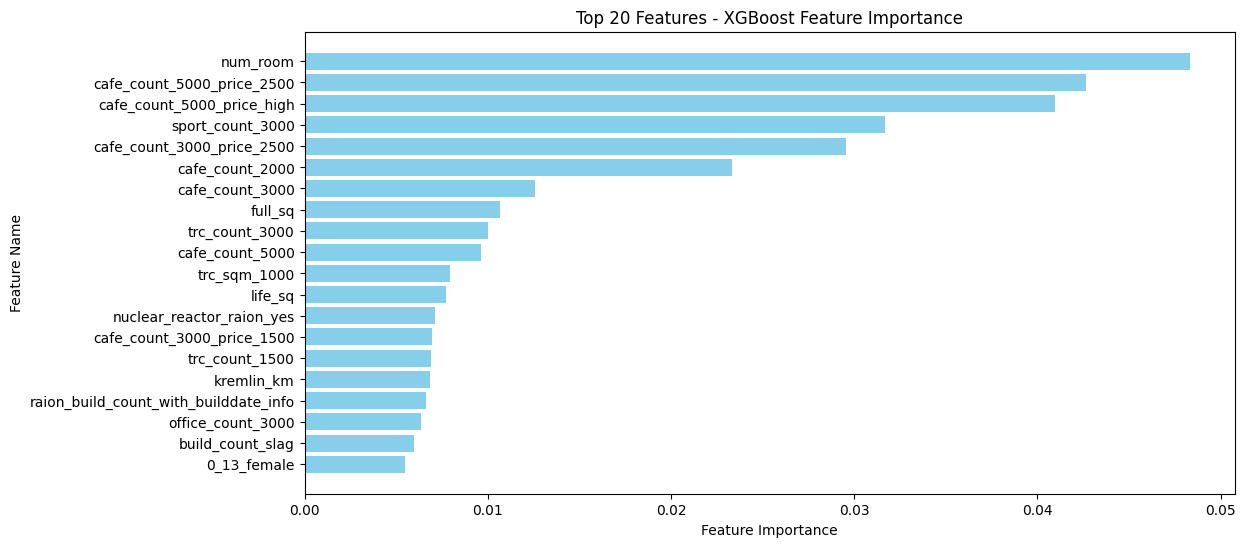

Selected top 200 features using XGBoost feature selection.
['num_room', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_high', 'sport_count_3000', 'cafe_count_3000_price_2500', 'cafe_count_2000', 'cafe_count_3000', 'full_sq', 'trc_count_3000', 'cafe_count_5000', 'trc_sqm_1000', 'life_sq', 'nuclear_reactor_raion_yes', 'cafe_count_3000_price_1500', 'trc_count_1500', 'kremlin_km', 'raion_build_count_with_builddate_info', 'office_count_3000', 'build_count_slag', '0_13_female', 'cafe_count_3000_price_1000', 'exhibition_km', 'market_shop_km', 'product_type_Investment', 'resident_to_total_ratio', 'mosque_count_5000', 'cafe_count_1000_price_1500', 'cafe_count_500_na_price', 'cafe_count_1500_price_2500', 'big_church_count_2000', 'year', 'cafe_count_2000_price_high', 'metro_min_avto', 'cafe_count_1500_price_500', 'school_education_centers_raion', 'raion_build_count_with_material_info', 'ekder_all', 'cafe_count_1000_price_2500', 'sub_area_Zjablikovo', 'cafe_count_1500_price_high', 'kitchen_t

In [ ]:
import xgboost as xgb
# Convert X_prepared_df to a NumPy array for training
X_train_array = X_prepared_df.values  # Convert to NumPy array
y_train_array = y.values  # Ensure y is also a NumPy array

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the XGBoost model
print("Training XGBoost model on selected features...")
xgb_model.fit(X_train_array, y_train_array)

# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Convert to DataFrame for easy sorting
feature_importance_df = pd.DataFrame({
    'Feature': X_prepared_df.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 20 Features - XGBoost Feature Importance")
plt.show()

# Select the top N important features (adjust N as needed)
N = 200  # Change this value to select a different number of top features
top_features = feature_importance_df['Feature'][:N].tolist()

# Ensure only existing features are kept
features_to_keep = [feature for feature in top_features if feature in X_prepared_df.columns]

# Create a new DataFrame with selected features
train_selected = pd.concat([X_prepared_df[features_to_keep], y], axis=1)

# Print summary
print(f"Selected top {N} features using XGBoost feature selection.")
print(features_to_keep)

# Overwrite train with only selected features
train = train_selected.copy()


In [ ]:
test['id'] = test_original['id']
test_ids = test[['id']].copy()


excluded_cols = ['timestamp', 'id']
X_test = test.drop(columns=[col for col in excluded_cols if col in test.columns], errors="ignore")

# Apply the Same Preprocessing as Train
X_test_prepared = preprocessor.transform(X_test)  # Transform test using fitted preprocessor

# Convert transformed data back into DataFrame
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=processed_features, index=test.index)

# Ensure Test Columns Match Train (Fix Any Missing Encoded Features)
missing_features = set(X_prepared_df.columns) - set(X_test_prepared_df.columns)
for feature in missing_features:
    X_test_prepared_df[feature] = 0  # Fill missing features with 0 to match training structure

# Ensure Column Order is Identical to Train
X_test_prepared_df = X_test_prepared_df[X_prepared_df.columns]

# Make Predictions
y_test_pred = xgb_model.predict(X_test_prepared_df)

# Restore 'id' and Create Submission
test['log_price_doc'] = y_test_pred
test['price_doc'] = np.expm1(y_test_pred)  # Reverse log transformation

submission = test[['id', 'price_doc']].set_index('id').reindex(test_ids['id']).reset_index()




<ipython-input-58-7f190db28f25>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['log_price_doc'] = y_test_pred
<ipython-input-58-7f190db28f25>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['price_doc'] = np.expm1(y_test_pred)  # Reverse log transformation


In [ ]:
import pandas as pd

# Define the file name
submission_file = "submission.csv"

# Save the submission DataFrame as an Excel file
submission.to_csv(submission_file, index=False)

# Provide a download link
from google.colab import files
files.download(submission_file)

"""

ran in kaggle and got Score: 0.33074, Private score: 0.33512

"""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'\n\nran in kaggle and got Score: 0.33074, Private score: 0.33512\n\n'

OwnerOccupier Data: (11023, 490), Investment Data: (19448, 490)
OwnerOccupier Data: (11023,), Investment Data: (19448,)
Training XGBoost model for OwnerOccupier properties...


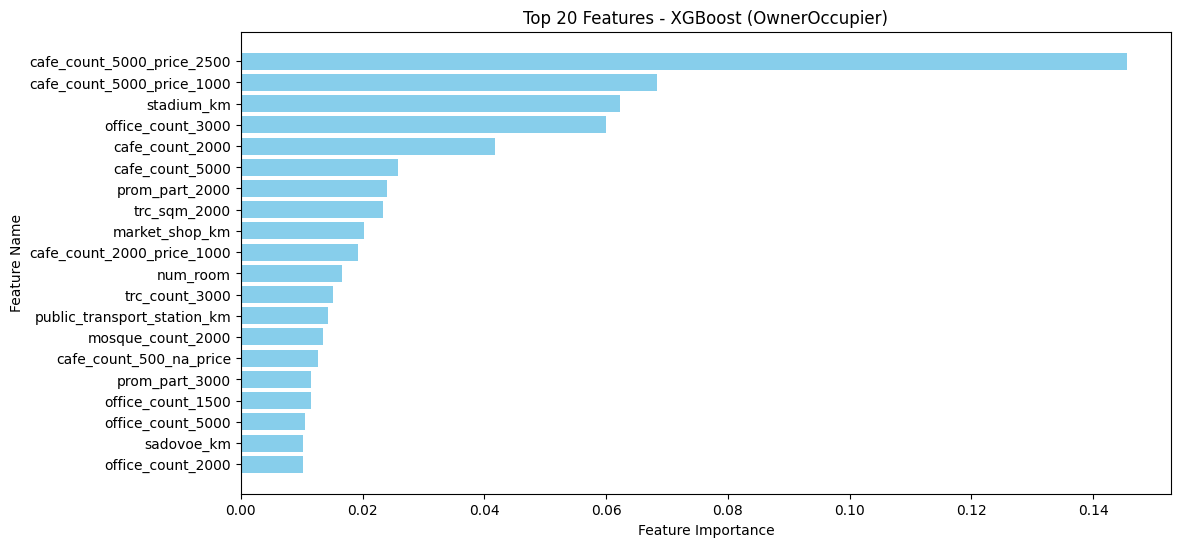

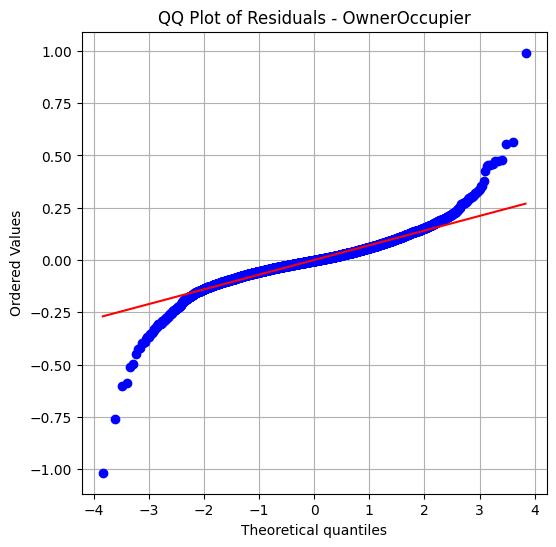

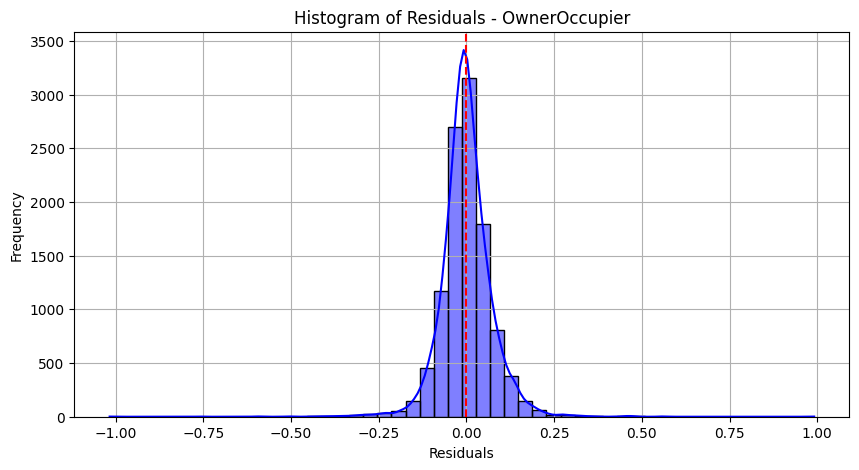

Training XGBoost model for Investment properties...


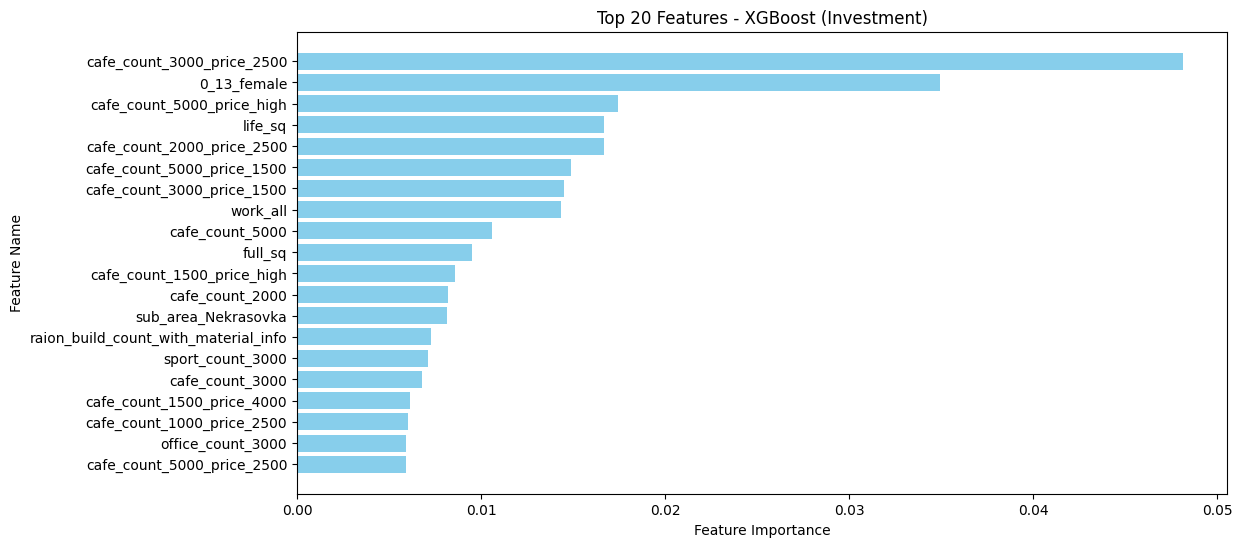

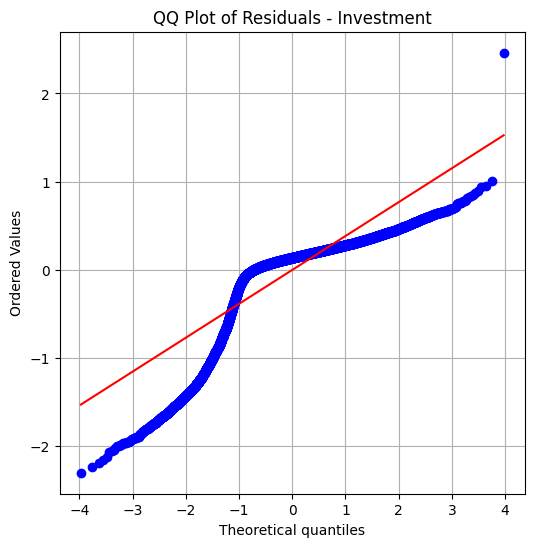

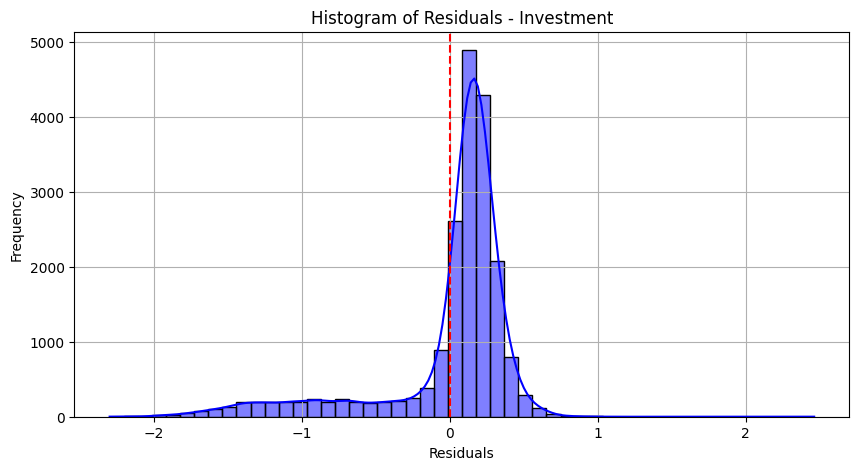

In [ ]:
x_owner = X_prepared_df[X_prepared_df["product_type_OwnerOccupier"] == 1]
x_investment = X_prepared_df[X_prepared_df["product_type_Investment"] == 1]
print(f"OwnerOccupier Data: {x_owner.shape}, Investment Data: {x_investment.shape}")
y = train[target_column]
y_owner = y[X_prepared_df["product_type_OwnerOccupier"] == 1]
y_investment = y[X_prepared_df["product_type_Investment"] == 1]
print(f"OwnerOccupier Data: {y_owner.shape}, Investment Data: {y_investment.shape}")


def train_xgboost(X, y, title):
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    # Train the model
    print(f"Training XGBoost model for {title} properties...")
    model.fit(X, y)

    # Get predictions
    y_pred = model.predict(X)

    # Compute residuals
    residuals = y - y_pred

    # Get feature importance
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)


    plt.figure(figsize=(12, 6))
    plt.barh(importance_df["Feature"][:20], importance_df["Importance"][:20], color="skyblue")
    plt.gca().invert_yaxis()
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title(f"Top 20 Features - XGBoost ({title})")
    plt.show()


    # QQ Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"QQ Plot of Residuals - {title}")
    plt.grid(True)
    plt.show()

    # Histogram of Residuals
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, bins=50, kde=True, color="blue", edgecolor="black")
    plt.axvline(x=0, color="red", linestyle="--")  # Reference line at zero
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Residuals - {title}")
    plt.grid(True)
    plt.show()

    return model


xgb_owner = train_xgboost(x_owner, y_owner, "OwnerOccupier")
xgb_investment = train_xgboost(x_investment, y_investment, "Investment")



In [ ]:
test_owner = X_test_prepared_df[X_test_prepared_df["product_type_OwnerOccupier"] == 1]
test_investment = X_test_prepared_df[X_test_prepared_df["product_type_Investment"] == 1]

# Print summary
print(f"Successfully split test data into two subsets:")
print(f"OwnerOccupier Test Data: {test_owner.shape}")
print(f"Investment Test Data: {test_investment.shape}")

print(f"Investment Test Data: {X_test_prepared_df.shape}")




Successfully split test data into two subsets:
OwnerOccupier Test Data: (2631, 490)
Investment Test Data: (5031, 490)
Investment Test Data: (7662, 490)


In [ ]:
training_features = xgb_owner.get_booster().feature_names
test_owner_subset = test_owner[training_features]
y_test_pred_owner = xgb_owner.predict(test_owner_subset)

training_features_investment = xgb_investment.get_booster().feature_names
test_investment_subset = test_investment[training_features_investment]
y_test_pred_investment = xgb_investment.predict(test_investment_subset)



In [ ]:
test_owner["log_price_doc"] = y_test_pred_owner
test_investment["log_price_doc"] = y_test_pred_investment

test_owner["price_doc"] = np.expm1(test_owner["log_price_doc"])
test_investment["price_doc"] = np.expm1(test_investment["log_price_doc"])

test_owner["id"] = test_before_running_model.loc[test_owner.index, "id"]
test_investment["id"] = test_before_running_model.loc[test_investment.index, "id"]

final_predictions = pd.concat([test_owner[["id", "price_doc"]], test_investment[["id", "price_doc"]]])

test_ids = test_before_running_model[["id"]].copy()
submission = final_predictions.set_index("id").reindex(test_ids["id"]).reset_index()


<ipython-input-63-7df92706e34a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_owner["log_price_doc"] = y_test_pred_owner
<ipython-input-63-7df92706e34a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_investment["log_price_doc"] = y_test_pred_investment
<ipython-input-63-7df92706e34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
submission_file = "submission2.csv"
submission.to_csv(submission_file, index=False)

# 🚀 Step 7: Provide a Download Link
from google.colab import files
files.download(submission_file)

print(f"✅ Predictions saved successfully: {submission_file}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Predictions saved successfully: submission2.csv


In [ ]:
# upload predictions to kaggle and recieved: Score: 0.34079, Private score: 0.34304 which is slighly higher than before. this can happen due to malformed data in investment prices.
# the general model captures the "whole image" and manages to be somewhat accurate overall, but when we divide to product types - the investment model under performes (can be seen with the residuales graphs)
# so we have decided to use the better model to identify outliers in predictions, and delete those rows in the train set.
# by doing that we improve the predictions of the investment model.


shape of y_pred_investment:  (19448,)
shape of y_investment:  (19448,)


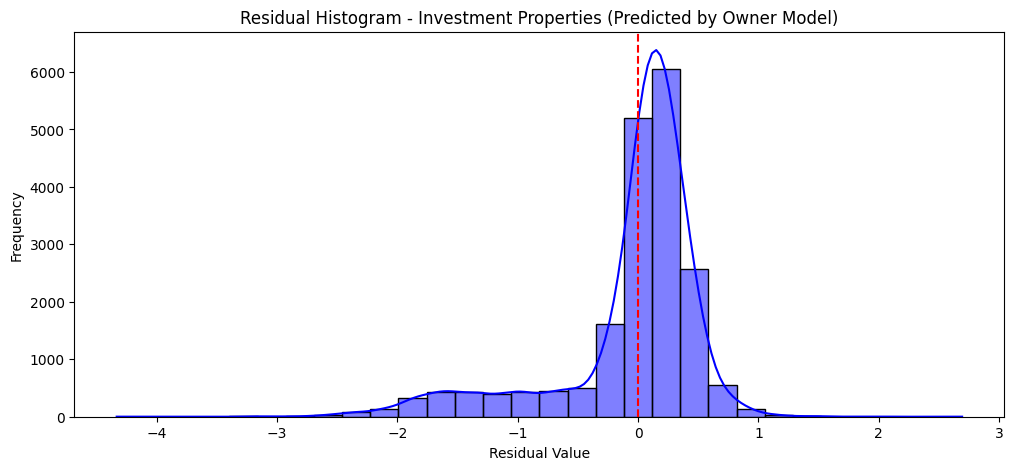

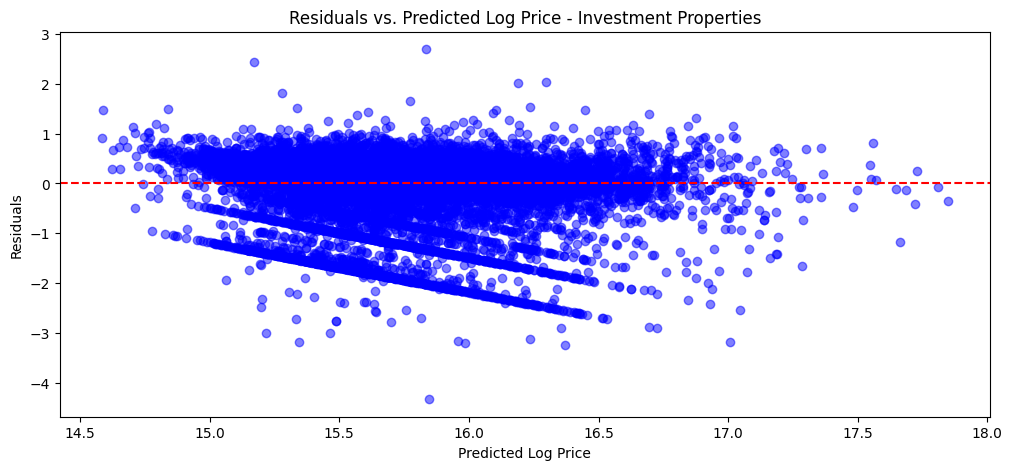

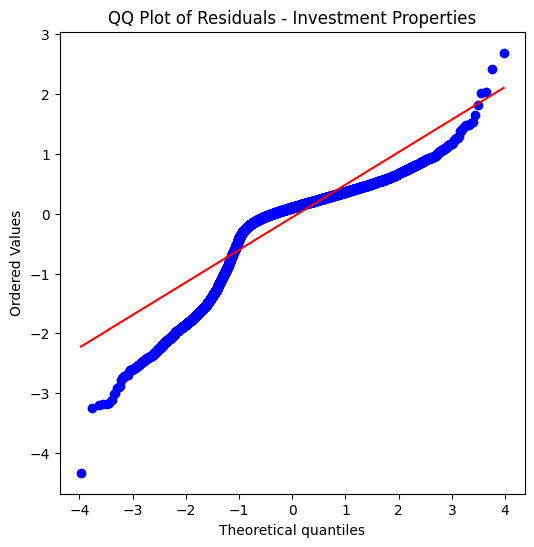

In [ ]:
import scipy.stats as stats

# Predict prices for Investment properties using the OwnerOccupier model
y_pred_investment = xgb_owner.predict(x_investment)
print("shape of y_pred_investment: ", y_pred_investment.shape)
print("shape of y_investment: ", y_investment.shape)
# Compute residuals
investment_residuals = y_investment - y_pred_investment

# Add residuals and timestamp to a DataFrame for analysis
investment_residuals_df = pd.DataFrame({
    "residuals": investment_residuals,
    "predicted_log_price": y_pred_investment
})

# Plot histogram of residuals
plt.figure(figsize=(12, 5))
sns.histplot(investment_residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")  # Line at 0 residual
plt.title("Residual Histogram - Investment Properties (Predicted by Owner Model)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(12, 5))
plt.scatter(y_pred_investment, investment_residuals, alpha=0.5, color="blue")
plt.axhline(y=0, color="red", linestyle="--")  # Line at 0 residual
plt.title("Residuals vs. Predicted Log Price - Investment Properties")
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.show()

# QQ Plot to check normality of residuals
plt.figure(figsize=(6, 6))
stats.probplot(investment_residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals - Investment Properties")
plt.show()



Removed 2626 outliers based on residuals.


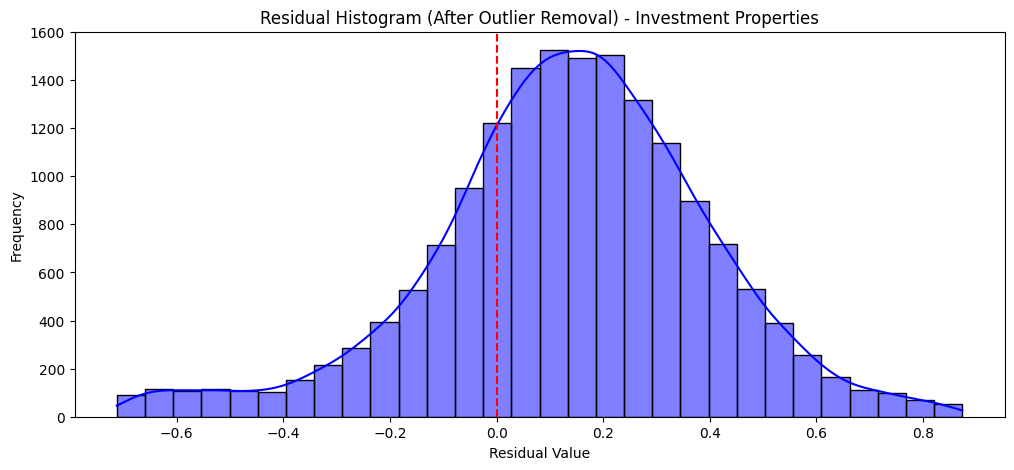

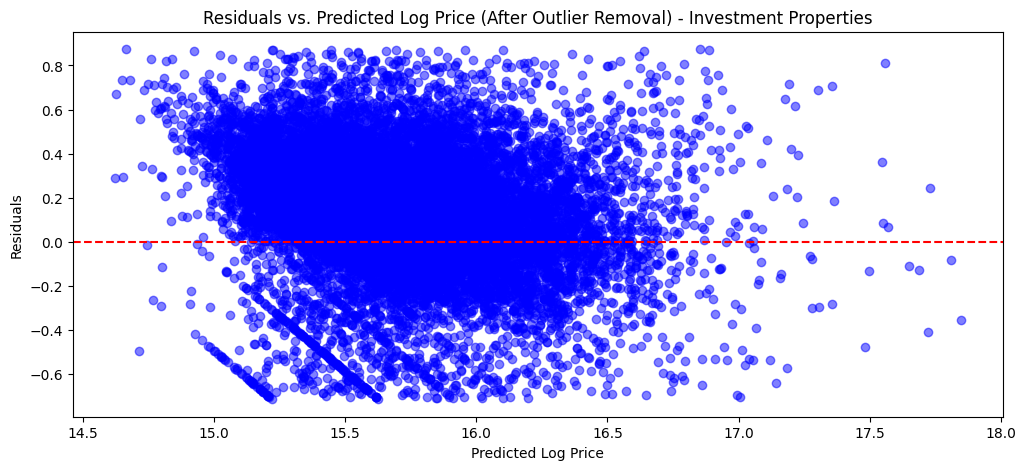

In [ ]:
# Predict prices for Investment properties using the OwnerOccupier model
y_pred_investment = xgb_owner.predict(x_investment)

# Compute residuals
investment_residuals = y_investment - y_pred_investment

# Define the outlier threshold using IQR (Interquartile Range)
Q1 = np.percentile(investment_residuals, 25)
Q3 = np.percentile(investment_residuals, 75)
IQR = Q3 - Q1

# Define acceptable residual range (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (investment_residuals < lower_bound) | (investment_residuals > upper_bound)
num_outliers = outliers.sum()


train_investment_cleaned = x_investment.loc[~outliers].copy()
investment_residuals_cleaned = investment_residuals[~outliers]
y_pred_investment_cleaned = y_pred_investment[~outliers]

# Print summary of removed rows
print(f"Removed {num_outliers} outliers based on residuals.")

# Re-run Residual Plots after Outlier Removal
plt.figure(figsize=(12, 5))
sns.histplot(investment_residuals_cleaned, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.title("Residual Histogram (After Outlier Removal) - Investment Properties")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
plt.scatter(y_pred_investment_cleaned, investment_residuals_cleaned, alpha=0.5, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals vs. Predicted Log Price (After Outlier Removal) - Investment Properties")
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.show()



In [ ]:
X_owner = X_prepared_df[X_prepared_df["product_type_OwnerOccupier"] == 1].copy()
X_investment = X_prepared_df[X_prepared_df["product_type_Investment"] == 1].copy()

y_owner = y.loc[X_owner.index]
y_investment = y.loc[X_investment.index]

print(f"📊 Data Sizes:")
print(f"OwnerOccupier: {X_owner.shape}, {y_owner.shape}")
print(f"Investment: {X_investment.shape}, {y_investment.shape}")

x_investment = X_investment.copy()

# Identify Outliers
outliers_investment = (investment_residuals < lower_bound) | (investment_residuals > upper_bound)


outlier_ids = y_investment.index[outliers_investment]

# 🚀 Remove outliers from BOTH `X_investment` and `y_investment`
X_investment_cleaned = X_investment.drop(index=outlier_ids)
y_investment_cleaned = y_investment.drop(index=outlier_ids)

# 🚀 Align to ensure perfect shape match
x_investment, y_investment = X_investment_cleaned.align(y_investment_cleaned, axis=0, join="inner")


print(f"📊 Final Data Sizes:")
print(f"OwnerOccupier: {x_owner.shape}, {y_owner.shape}")
print(f"Investment (cleaned): {x_investment.shape}, {y_investment.shape}")


📊 Data Sizes:
OwnerOccupier: (11023, 490), (11023,)
Investment: (19448, 490), (19448,)
📊 Final Data Sizes:
OwnerOccupier: (11023, 490), (11023,)
Investment (cleaned): (16822, 490), (16822,)


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.4 MB/s eta 0:00:00


[I 2025-02-10 09:44:20,804] A new study created in memory with name: no-name-4064e241-a120-4ea6-abb8-d2f848a5123e


🔹 Training XGBoost model with Time-Series CV for OwnerOccupier properties...
Trial 0 | OwnerOccupier | Fold 1 | RMSE: 0.1394
Trial 0 | OwnerOccupier | Fold 2 | RMSE: 0.1750
Trial 0 | OwnerOccupier | Fold 3 | RMSE: 0.1797
Trial 0 | OwnerOccupier | Fold 4 | RMSE: 0.1657


[I 2025-02-10 09:46:18,403] Trial 0 finished with value: 0.17039551577197198 and parameters: {'n_estimators': 400, 'learning_rate': 0.14982871100558454, 'max_depth': 6, 'subsample': 0.6903755560612128, 'colsample_bytree': 0.9385236127349607}. Best is trial 0 with value: 0.17039551577197198.


Trial 0 | OwnerOccupier | Fold 5 | RMSE: 0.1921
Trial 0 Completed | OwnerOccupier | Average RMSE: 0.1704
Trial 1 | OwnerOccupier | Fold 1 | RMSE: 0.1397
Trial 1 | OwnerOccupier | Fold 2 | RMSE: 0.1840
Trial 1 | OwnerOccupier | Fold 3 | RMSE: 0.1757
Trial 1 | OwnerOccupier | Fold 4 | RMSE: 0.1634


[I 2025-02-10 09:48:12,528] Trial 1 finished with value: 0.17256862911526588 and parameters: {'n_estimators': 376, 'learning_rate': 0.09005888965048549, 'max_depth': 8, 'subsample': 0.9199576990478584, 'colsample_bytree': 0.6302281249513215}. Best is trial 0 with value: 0.17039551577197198.


Trial 1 | OwnerOccupier | Fold 5 | RMSE: 0.2000
Trial 1 Completed | OwnerOccupier | Average RMSE: 0.1726
Trial 2 | OwnerOccupier | Fold 1 | RMSE: 0.1454
Trial 2 | OwnerOccupier | Fold 2 | RMSE: 0.1740
Trial 2 | OwnerOccupier | Fold 3 | RMSE: 0.1713
Trial 2 | OwnerOccupier | Fold 4 | RMSE: 0.1698


[I 2025-02-10 09:49:12,744] Trial 2 finished with value: 0.1703451905593433 and parameters: {'n_estimators': 226, 'learning_rate': 0.053639498561706515, 'max_depth': 8, 'subsample': 0.6571275104608576, 'colsample_bytree': 0.8544552565698897}. Best is trial 2 with value: 0.1703451905593433.


Trial 2 | OwnerOccupier | Fold 5 | RMSE: 0.1912
Trial 2 Completed | OwnerOccupier | Average RMSE: 0.1703
Trial 3 | OwnerOccupier | Fold 1 | RMSE: 0.1419
Trial 3 | OwnerOccupier | Fold 2 | RMSE: 0.1772
Trial 3 | OwnerOccupier | Fold 3 | RMSE: 0.1846
Trial 3 | OwnerOccupier | Fold 4 | RMSE: 0.1526


[I 2025-02-10 09:49:33,895] Trial 3 finished with value: 0.1711413742735861 and parameters: {'n_estimators': 338, 'learning_rate': 0.1634127817294468, 'max_depth': 3, 'subsample': 0.6332757945952718, 'colsample_bytree': 0.7000632748928193}. Best is trial 2 with value: 0.1703451905593433.


Trial 3 | OwnerOccupier | Fold 5 | RMSE: 0.1995
Trial 3 Completed | OwnerOccupier | Average RMSE: 0.1711
Trial 4 | OwnerOccupier | Fold 1 | RMSE: 0.1481
Trial 4 | OwnerOccupier | Fold 2 | RMSE: 0.1822
Trial 4 | OwnerOccupier | Fold 3 | RMSE: 0.1722
Trial 4 | OwnerOccupier | Fold 4 | RMSE: 0.1511


[I 2025-02-10 09:49:53,052] Trial 4 finished with value: 0.17043827590352487 and parameters: {'n_estimators': 349, 'learning_rate': 0.16135759279628029, 'max_depth': 3, 'subsample': 0.5918602290346421, 'colsample_bytree': 0.7786071980724771}. Best is trial 2 with value: 0.1703451905593433.


Trial 4 | OwnerOccupier | Fold 5 | RMSE: 0.1986
Trial 4 Completed | OwnerOccupier | Average RMSE: 0.1704
Trial 5 | OwnerOccupier | Fold 1 | RMSE: 0.1420
Trial 5 | OwnerOccupier | Fold 2 | RMSE: 0.1784
Trial 5 | OwnerOccupier | Fold 3 | RMSE: 0.1711
Trial 5 | OwnerOccupier | Fold 4 | RMSE: 0.1675


[I 2025-02-10 09:51:07,825] Trial 5 finished with value: 0.17002470879622403 and parameters: {'n_estimators': 264, 'learning_rate': 0.06642344402532746, 'max_depth': 7, 'subsample': 0.7140784251744052, 'colsample_bytree': 0.936070086408667}. Best is trial 5 with value: 0.17002470879622403.


Trial 5 | OwnerOccupier | Fold 5 | RMSE: 0.1912
Trial 5 Completed | OwnerOccupier | Average RMSE: 0.1700
Trial 6 | OwnerOccupier | Fold 1 | RMSE: 0.1381
Trial 6 | OwnerOccupier | Fold 2 | RMSE: 0.1737
Trial 6 | OwnerOccupier | Fold 3 | RMSE: 0.1812
Trial 6 | OwnerOccupier | Fold 4 | RMSE: 0.1551


[I 2025-02-10 09:51:26,927] Trial 6 finished with value: 0.1690190804939325 and parameters: {'n_estimators': 345, 'learning_rate': 0.0602933781844797, 'max_depth': 3, 'subsample': 0.7240345262468852, 'colsample_bytree': 0.7599005802587147}. Best is trial 6 with value: 0.1690190804939325.


Trial 6 | OwnerOccupier | Fold 5 | RMSE: 0.1971
Trial 6 Completed | OwnerOccupier | Average RMSE: 0.1690
Trial 7 | OwnerOccupier | Fold 1 | RMSE: 0.1343
Trial 7 | OwnerOccupier | Fold 2 | RMSE: 0.1806
Trial 7 | OwnerOccupier | Fold 3 | RMSE: 0.1709
Trial 7 | OwnerOccupier | Fold 4 | RMSE: 0.1523


[I 2025-02-10 09:51:57,631] Trial 7 finished with value: 0.16614098570270655 and parameters: {'n_estimators': 303, 'learning_rate': 0.11695762202313009, 'max_depth': 4, 'subsample': 0.9270549323752699, 'colsample_bytree': 0.9068472249565382}. Best is trial 7 with value: 0.16614098570270655.


Trial 7 | OwnerOccupier | Fold 5 | RMSE: 0.1926
Trial 7 Completed | OwnerOccupier | Average RMSE: 0.1661
Trial 8 | OwnerOccupier | Fold 1 | RMSE: 0.1346
Trial 8 | OwnerOccupier | Fold 2 | RMSE: 0.1698
Trial 8 | OwnerOccupier | Fold 3 | RMSE: 0.1769
Trial 8 | OwnerOccupier | Fold 4 | RMSE: 0.1662


[I 2025-02-10 09:52:19,216] Trial 8 finished with value: 0.16959524808298987 and parameters: {'n_estimators': 207, 'learning_rate': 0.17078968365646408, 'max_depth': 5, 'subsample': 0.7088827601561996, 'colsample_bytree': 0.8376065750812796}. Best is trial 7 with value: 0.16614098570270655.


Trial 8 | OwnerOccupier | Fold 5 | RMSE: 0.2005
Trial 8 Completed | OwnerOccupier | Average RMSE: 0.1696
Trial 9 | OwnerOccupier | Fold 1 | RMSE: 0.1469
Trial 9 | OwnerOccupier | Fold 2 | RMSE: 0.1832
Trial 9 | OwnerOccupier | Fold 3 | RMSE: 0.1787
Trial 9 | OwnerOccupier | Fold 4 | RMSE: 0.1694


[I 2025-02-10 09:53:54,784] Trial 9 finished with value: 0.17582901462929165 and parameters: {'n_estimators': 351, 'learning_rate': 0.1562751952454017, 'max_depth': 8, 'subsample': 0.5182859955773471, 'colsample_bytree': 0.6932080485865606}. Best is trial 7 with value: 0.16614098570270655.


Trial 9 | OwnerOccupier | Fold 5 | RMSE: 0.2009
Trial 9 Completed | OwnerOccupier | Average RMSE: 0.1758
Trial 10 | OwnerOccupier | Fold 1 | RMSE: 0.1370
Trial 10 | OwnerOccupier | Fold 2 | RMSE: 0.1842
Trial 10 | OwnerOccupier | Fold 3 | RMSE: 0.1769
Trial 10 | OwnerOccupier | Fold 4 | RMSE: 0.1616


[I 2025-02-10 09:56:06,386] Trial 10 finished with value: 0.17152937960583908 and parameters: {'n_estimators': 293, 'learning_rate': 0.10636901102189329, 'max_depth': 10, 'subsample': 0.9719367224759868, 'colsample_bytree': 0.5151464376476325}. Best is trial 7 with value: 0.16614098570270655.


Trial 10 | OwnerOccupier | Fold 5 | RMSE: 0.1979
Trial 10 Completed | OwnerOccupier | Average RMSE: 0.1715
Trial 11 | OwnerOccupier | Fold 1 | RMSE: 0.1292
Trial 11 | OwnerOccupier | Fold 2 | RMSE: 0.1774
Trial 11 | OwnerOccupier | Fold 3 | RMSE: 0.1720
Trial 11 | OwnerOccupier | Fold 4 | RMSE: 0.1562


[I 2025-02-10 09:56:33,176] Trial 11 finished with value: 0.16442440520708795 and parameters: {'n_estimators': 305, 'learning_rate': 0.10394647918248259, 'max_depth': 4, 'subsample': 0.8383930513536437, 'colsample_bytree': 0.9879896900736913}. Best is trial 11 with value: 0.16442440520708795.


Trial 11 | OwnerOccupier | Fold 5 | RMSE: 0.1873
Trial 11 Completed | OwnerOccupier | Average RMSE: 0.1644
Trial 12 | OwnerOccupier | Fold 1 | RMSE: 0.1376
Trial 12 | OwnerOccupier | Fold 2 | RMSE: 0.1795
Trial 12 | OwnerOccupier | Fold 3 | RMSE: 0.1735
Trial 12 | OwnerOccupier | Fold 4 | RMSE: 0.1572


[I 2025-02-10 09:57:08,683] Trial 12 finished with value: 0.16730379086462543 and parameters: {'n_estimators': 281, 'learning_rate': 0.10893953509618043, 'max_depth': 5, 'subsample': 0.8427426122090602, 'colsample_bytree': 0.9837037869089668}. Best is trial 11 with value: 0.16442440520708795.


Trial 12 | OwnerOccupier | Fold 5 | RMSE: 0.1887
Trial 12 Completed | OwnerOccupier | Average RMSE: 0.1673
Trial 13 | OwnerOccupier | Fold 1 | RMSE: 0.1320
Trial 13 | OwnerOccupier | Fold 2 | RMSE: 0.1773
Trial 13 | OwnerOccupier | Fold 3 | RMSE: 0.1733
Trial 13 | OwnerOccupier | Fold 4 | RMSE: 0.1557


[I 2025-02-10 09:57:42,587] Trial 13 finished with value: 0.16611186858130203 and parameters: {'n_estimators': 312, 'learning_rate': 0.08312453645820207, 'max_depth': 5, 'subsample': 0.874593827145443, 'colsample_bytree': 0.8839556805061093}. Best is trial 11 with value: 0.16442440520708795.


Trial 13 | OwnerOccupier | Fold 5 | RMSE: 0.1922
Trial 13 Completed | OwnerOccupier | Average RMSE: 0.1661
Trial 14 | OwnerOccupier | Fold 1 | RMSE: 0.1377
Trial 14 | OwnerOccupier | Fold 2 | RMSE: 0.1816
Trial 14 | OwnerOccupier | Fold 3 | RMSE: 0.1725
Trial 14 | OwnerOccupier | Fold 4 | RMSE: 0.1558


[I 2025-02-10 09:58:16,624] Trial 14 finished with value: 0.168818906153358 and parameters: {'n_estimators': 259, 'learning_rate': 0.07766211523687189, 'max_depth': 5, 'subsample': 0.8013469541481555, 'colsample_bytree': 0.8570240264341781}. Best is trial 11 with value: 0.16442440520708795.


Trial 14 | OwnerOccupier | Fold 5 | RMSE: 0.1965
Trial 14 Completed | OwnerOccupier | Average RMSE: 0.1688
Trial 15 | OwnerOccupier | Fold 1 | RMSE: 0.1330
Trial 15 | OwnerOccupier | Fold 2 | RMSE: 0.1757
Trial 15 | OwnerOccupier | Fold 3 | RMSE: 0.1759
Trial 15 | OwnerOccupier | Fold 4 | RMSE: 0.1542


[I 2025-02-10 09:58:44,447] Trial 15 finished with value: 0.166976879493339 and parameters: {'n_estimators': 317, 'learning_rate': 0.08526766813061303, 'max_depth': 4, 'subsample': 0.8357760257113691, 'colsample_bytree': 0.9901959261290296}. Best is trial 11 with value: 0.16442440520708795.


Trial 15 | OwnerOccupier | Fold 5 | RMSE: 0.1962
Trial 15 Completed | OwnerOccupier | Average RMSE: 0.1670
Trial 16 | OwnerOccupier | Fold 1 | RMSE: 0.1351
Trial 16 | OwnerOccupier | Fold 2 | RMSE: 0.1797
Trial 16 | OwnerOccupier | Fold 3 | RMSE: 0.1772
Trial 16 | OwnerOccupier | Fold 4 | RMSE: 0.1622


[I 2025-02-10 09:59:37,824] Trial 16 finished with value: 0.16917028881444843 and parameters: {'n_estimators': 320, 'learning_rate': 0.1294397040884186, 'max_depth': 6, 'subsample': 0.790257180014618, 'colsample_bytree': 0.9014525466076903}. Best is trial 11 with value: 0.16442440520708795.


Trial 16 | OwnerOccupier | Fold 5 | RMSE: 0.1916
Trial 16 Completed | OwnerOccupier | Average RMSE: 0.1692
Trial 17 | OwnerOccupier | Fold 1 | RMSE: 0.1366
Trial 17 | OwnerOccupier | Fold 2 | RMSE: 0.1756
Trial 17 | OwnerOccupier | Fold 3 | RMSE: 0.1759
Trial 17 | OwnerOccupier | Fold 4 | RMSE: 0.1609


[I 2025-02-10 10:00:05,289] Trial 17 finished with value: 0.16786947692702617 and parameters: {'n_estimators': 246, 'learning_rate': 0.07875547400275085, 'max_depth': 5, 'subsample': 0.8750263828047351, 'colsample_bytree': 0.8033446515278025}. Best is trial 11 with value: 0.16442440520708795.


Trial 17 | OwnerOccupier | Fold 5 | RMSE: 0.1903
Trial 17 Completed | OwnerOccupier | Average RMSE: 0.1679
Trial 18 | OwnerOccupier | Fold 1 | RMSE: 0.1328
Trial 18 | OwnerOccupier | Fold 2 | RMSE: 0.1762
Trial 18 | OwnerOccupier | Fold 3 | RMSE: 0.1733
Trial 18 | OwnerOccupier | Fold 4 | RMSE: 0.1562


[I 2025-02-10 10:00:37,475] Trial 18 finished with value: 0.16871235600928572 and parameters: {'n_estimators': 280, 'learning_rate': 0.19446333659768752, 'max_depth': 4, 'subsample': 0.9691918181879152, 'colsample_bytree': 0.9925079460934437}. Best is trial 11 with value: 0.16442440520708795.


Trial 18 | OwnerOccupier | Fold 5 | RMSE: 0.2050
Trial 18 Completed | OwnerOccupier | Average RMSE: 0.1687
Trial 19 | OwnerOccupier | Fold 1 | RMSE: 0.1404
Trial 19 | OwnerOccupier | Fold 2 | RMSE: 0.1819
Trial 19 | OwnerOccupier | Fold 3 | RMSE: 0.1728
Trial 19 | OwnerOccupier | Fold 4 | RMSE: 0.1694


[I 2025-02-10 10:01:54,462] Trial 19 finished with value: 0.17183752006980613 and parameters: {'n_estimators': 318, 'learning_rate': 0.1281363965736246, 'max_depth': 7, 'subsample': 0.7790158449083222, 'colsample_bytree': 0.884777436499662}. Best is trial 11 with value: 0.16442440520708795.


Trial 19 | OwnerOccupier | Fold 5 | RMSE: 0.1945
Trial 19 Completed | OwnerOccupier | Average RMSE: 0.1718


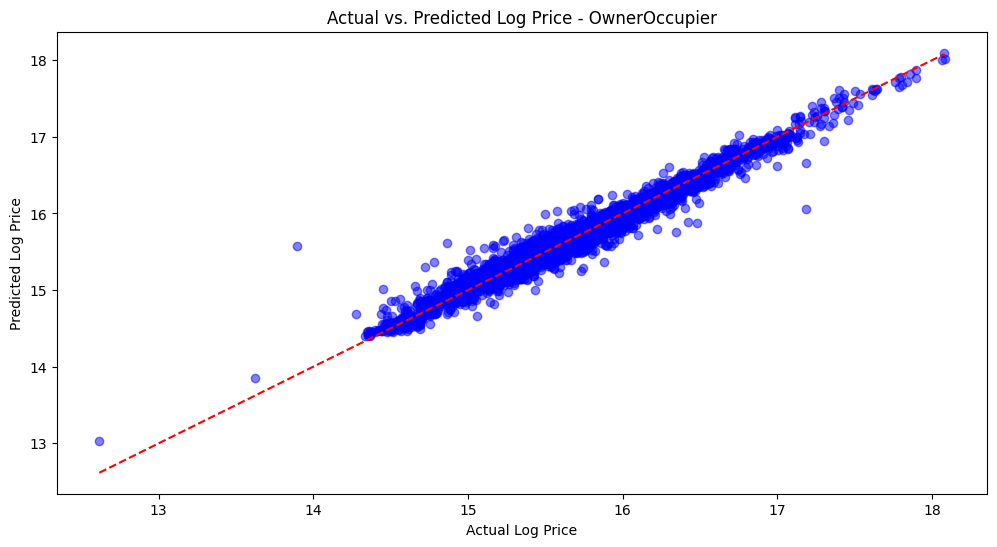

[I 2025-02-10 10:02:03,942] A new study created in memory with name: no-name-ed1ac285-a909-4f76-833b-7affd765437a


Best Parameters for OwnerOccupier: {'n_estimators': 305, 'learning_rate': 0.10394647918248259, 'max_depth': 4, 'subsample': 0.8383930513536437, 'colsample_bytree': 0.9879896900736913}
RMSE for OwnerOccupier: 0.0775
🔹 Training XGBoost model with Time-Series CV for Investment properties...
Trial 0 | Investment | Fold 1 | RMSE: 0.2068
Trial 0 | Investment | Fold 2 | RMSE: 0.1951
Trial 0 | Investment | Fold 3 | RMSE: 0.2013
Trial 0 | Investment | Fold 4 | RMSE: 0.1798


[I 2025-02-10 10:07:07,146] Trial 0 finished with value: 0.19656334789803892 and parameters: {'n_estimators': 333, 'learning_rate': 0.06946084416353114, 'max_depth': 9, 'subsample': 0.9735985880182902, 'colsample_bytree': 0.7280770872720326}. Best is trial 0 with value: 0.19656334789803892.


Trial 0 | Investment | Fold 5 | RMSE: 0.1998
Trial 0 Completed | Investment | Average RMSE: 0.1966
Trial 1 | Investment | Fold 1 | RMSE: 0.2096
Trial 1 | Investment | Fold 2 | RMSE: 0.1974
Trial 1 | Investment | Fold 3 | RMSE: 0.2022
Trial 1 | Investment | Fold 4 | RMSE: 0.1798


[I 2025-02-10 10:13:46,726] Trial 1 finished with value: 0.1981187433007611 and parameters: {'n_estimators': 264, 'learning_rate': 0.07709863999765572, 'max_depth': 10, 'subsample': 0.8739030641355603, 'colsample_bytree': 0.9247739062640012}. Best is trial 0 with value: 0.19656334789803892.


Trial 1 | Investment | Fold 5 | RMSE: 0.2016
Trial 1 Completed | Investment | Average RMSE: 0.1981
Trial 2 | Investment | Fold 1 | RMSE: 0.2075
Trial 2 | Investment | Fold 2 | RMSE: 0.1919
Trial 2 | Investment | Fold 3 | RMSE: 0.1930
Trial 2 | Investment | Fold 4 | RMSE: 0.1741


[I 2025-02-10 10:14:22,084] Trial 2 finished with value: 0.19140929357380415 and parameters: {'n_estimators': 209, 'learning_rate': 0.16006592927003072, 'max_depth': 4, 'subsample': 0.7237107192070582, 'colsample_bytree': 0.7207889708458208}. Best is trial 2 with value: 0.19140929357380415.


Trial 2 | Investment | Fold 5 | RMSE: 0.1906
Trial 2 Completed | Investment | Average RMSE: 0.1914
Trial 3 | Investment | Fold 1 | RMSE: 0.2099
Trial 3 | Investment | Fold 2 | RMSE: 0.1977
Trial 3 | Investment | Fold 3 | RMSE: 0.2034
Trial 3 | Investment | Fold 4 | RMSE: 0.1851


[I 2025-02-10 10:17:33,112] Trial 3 finished with value: 0.1999293012676613 and parameters: {'n_estimators': 244, 'learning_rate': 0.128785371182689, 'max_depth': 9, 'subsample': 0.7286101546584427, 'colsample_bytree': 0.6102276329472793}. Best is trial 2 with value: 0.19140929357380415.


Trial 3 | Investment | Fold 5 | RMSE: 0.2035
Trial 3 Completed | Investment | Average RMSE: 0.1999
Trial 4 | Investment | Fold 1 | RMSE: 0.2019
Trial 4 | Investment | Fold 2 | RMSE: 0.1864
Trial 4 | Investment | Fold 3 | RMSE: 0.1933
Trial 4 | Investment | Fold 4 | RMSE: 0.1713


[I 2025-02-10 10:18:21,659] Trial 4 finished with value: 0.18875252157122208 and parameters: {'n_estimators': 238, 'learning_rate': 0.07418087078712925, 'max_depth': 5, 'subsample': 0.8279143029466872, 'colsample_bytree': 0.5283142709171464}. Best is trial 4 with value: 0.18875252157122208.


Trial 4 | Investment | Fold 5 | RMSE: 0.1909
Trial 4 Completed | Investment | Average RMSE: 0.1888
Trial 5 | Investment | Fold 1 | RMSE: 0.2027
Trial 5 | Investment | Fold 2 | RMSE: 0.1872
Trial 5 | Investment | Fold 3 | RMSE: 0.1936
Trial 5 | Investment | Fold 4 | RMSE: 0.1725


[I 2025-02-10 10:19:28,514] Trial 5 finished with value: 0.18925638268619555 and parameters: {'n_estimators': 376, 'learning_rate': 0.05290523328153924, 'max_depth': 5, 'subsample': 0.5005370331007726, 'colsample_bytree': 0.6166062973882744}. Best is trial 4 with value: 0.18875252157122208.


Trial 5 | Investment | Fold 5 | RMSE: 0.1903
Trial 5 Completed | Investment | Average RMSE: 0.1893
Trial 6 | Investment | Fold 1 | RMSE: 0.2101
Trial 6 | Investment | Fold 2 | RMSE: 0.1967
Trial 6 | Investment | Fold 3 | RMSE: 0.2021
Trial 6 | Investment | Fold 4 | RMSE: 0.1815


[I 2025-02-10 10:22:56,132] Trial 6 finished with value: 0.198251008694552 and parameters: {'n_estimators': 232, 'learning_rate': 0.11218577518424058, 'max_depth': 9, 'subsample': 0.9766011271978647, 'colsample_bytree': 0.7244368681416167}. Best is trial 4 with value: 0.18875252157122208.


Trial 6 | Investment | Fold 5 | RMSE: 0.2009
Trial 6 Completed | Investment | Average RMSE: 0.1983
Trial 7 | Investment | Fold 1 | RMSE: 0.2023
Trial 7 | Investment | Fold 2 | RMSE: 0.1901
Trial 7 | Investment | Fold 3 | RMSE: 0.1944
Trial 7 | Investment | Fold 4 | RMSE: 0.1740


[I 2025-02-10 10:24:54,890] Trial 7 finished with value: 0.1910994098648601 and parameters: {'n_estimators': 237, 'learning_rate': 0.059650960798799404, 'max_depth': 7, 'subsample': 0.5426452427958244, 'colsample_bytree': 0.9047518643546538}. Best is trial 4 with value: 0.18875252157122208.


Trial 7 | Investment | Fold 5 | RMSE: 0.1947
Trial 7 Completed | Investment | Average RMSE: 0.1911
Trial 8 | Investment | Fold 1 | RMSE: 0.2070
Trial 8 | Investment | Fold 2 | RMSE: 0.1942
Trial 8 | Investment | Fold 3 | RMSE: 0.1996
Trial 8 | Investment | Fold 4 | RMSE: 0.1792


[I 2025-02-10 10:26:56,908] Trial 8 finished with value: 0.19581108291342947 and parameters: {'n_estimators': 275, 'learning_rate': 0.1400922034831081, 'max_depth': 7, 'subsample': 0.9616229387021176, 'colsample_bytree': 0.8067741956675922}. Best is trial 4 with value: 0.18875252157122208.


Trial 8 | Investment | Fold 5 | RMSE: 0.1990
Trial 8 Completed | Investment | Average RMSE: 0.1958
Trial 9 | Investment | Fold 1 | RMSE: 0.2171
Trial 9 | Investment | Fold 2 | RMSE: 0.1997
Trial 9 | Investment | Fold 3 | RMSE: 0.2047
Trial 9 | Investment | Fold 4 | RMSE: 0.1859


[I 2025-02-10 10:29:55,419] Trial 9 finished with value: 0.2021463293730878 and parameters: {'n_estimators': 367, 'learning_rate': 0.18654390974222718, 'max_depth': 7, 'subsample': 0.7808355588333695, 'colsample_bytree': 0.9222695207050039}. Best is trial 4 with value: 0.18875252157122208.


Trial 9 | Investment | Fold 5 | RMSE: 0.2033
Trial 9 Completed | Investment | Average RMSE: 0.2021
Trial 10 | Investment | Fold 1 | RMSE: 0.1998
Trial 10 | Investment | Fold 2 | RMSE: 0.1851
Trial 10 | Investment | Fold 3 | RMSE: 0.1912
Trial 10 | Investment | Fold 4 | RMSE: 0.1711


[I 2025-02-10 10:30:24,400] Trial 10 finished with value: 0.18704739548001273 and parameters: {'n_estimators': 301, 'learning_rate': 0.08684123841905296, 'max_depth': 3, 'subsample': 0.6149374792493834, 'colsample_bytree': 0.5029655248858078}. Best is trial 10 with value: 0.18704739548001273.


Trial 10 | Investment | Fold 5 | RMSE: 0.1881
Trial 10 Completed | Investment | Average RMSE: 0.1870
Trial 11 | Investment | Fold 1 | RMSE: 0.2000
Trial 11 | Investment | Fold 2 | RMSE: 0.1845
Trial 11 | Investment | Fold 3 | RMSE: 0.1913
Trial 11 | Investment | Fold 4 | RMSE: 0.1708


[I 2025-02-10 10:30:55,830] Trial 11 finished with value: 0.18742479849290766 and parameters: {'n_estimators': 312, 'learning_rate': 0.0901491027748392, 'max_depth': 3, 'subsample': 0.61043636397011, 'colsample_bytree': 0.5117883476534999}. Best is trial 10 with value: 0.18704739548001273.


Trial 11 | Investment | Fold 5 | RMSE: 0.1905
Trial 11 Completed | Investment | Average RMSE: 0.1874
Trial 12 | Investment | Fold 1 | RMSE: 0.2013
Trial 12 | Investment | Fold 2 | RMSE: 0.1860
Trial 12 | Investment | Fold 3 | RMSE: 0.1913
Trial 12 | Investment | Fold 4 | RMSE: 0.1707


[I 2025-02-10 10:31:25,407] Trial 12 finished with value: 0.18725585765603128 and parameters: {'n_estimators': 323, 'learning_rate': 0.09513904340202889, 'max_depth': 3, 'subsample': 0.6197599909270034, 'colsample_bytree': 0.5008649268652041}. Best is trial 10 with value: 0.18704739548001273.


Trial 12 | Investment | Fold 5 | RMSE: 0.1870
Trial 12 Completed | Investment | Average RMSE: 0.1873
Trial 13 | Investment | Fold 1 | RMSE: 0.2044
Trial 13 | Investment | Fold 2 | RMSE: 0.1868
Trial 13 | Investment | Fold 3 | RMSE: 0.1911
Trial 13 | Investment | Fold 4 | RMSE: 0.1699


[I 2025-02-10 10:31:56,983] Trial 13 finished with value: 0.18828841488670953 and parameters: {'n_estimators': 335, 'learning_rate': 0.09901015924660893, 'max_depth': 3, 'subsample': 0.6209548347082756, 'colsample_bytree': 0.5896131383063516}. Best is trial 10 with value: 0.18704739548001273.


Trial 13 | Investment | Fold 5 | RMSE: 0.1892
Trial 13 Completed | Investment | Average RMSE: 0.1883
Trial 14 | Investment | Fold 1 | RMSE: 0.2041
Trial 14 | Investment | Fold 2 | RMSE: 0.1901
Trial 14 | Investment | Fold 3 | RMSE: 0.1939
Trial 14 | Investment | Fold 4 | RMSE: 0.1741


[I 2025-02-10 10:32:49,210] Trial 14 finished with value: 0.19078789224000992 and parameters: {'n_estimators': 296, 'learning_rate': 0.08889824028237733, 'max_depth': 5, 'subsample': 0.6448673332530142, 'colsample_bytree': 0.5679817620518678}. Best is trial 10 with value: 0.18704739548001273.


Trial 14 | Investment | Fold 5 | RMSE: 0.1918
Trial 14 Completed | Investment | Average RMSE: 0.1908
Trial 15 | Investment | Fold 1 | RMSE: 0.2065
Trial 15 | Investment | Fold 2 | RMSE: 0.1892
Trial 15 | Investment | Fold 3 | RMSE: 0.1933
Trial 15 | Investment | Fold 4 | RMSE: 0.1744


[I 2025-02-10 10:33:38,990] Trial 15 finished with value: 0.1909527162761493 and parameters: {'n_estimators': 336, 'learning_rate': 0.11166401962881128, 'max_depth': 4, 'subsample': 0.6916438371001048, 'colsample_bytree': 0.6504117256581108}. Best is trial 10 with value: 0.18704739548001273.


Trial 15 | Investment | Fold 5 | RMSE: 0.1913
Trial 15 Completed | Investment | Average RMSE: 0.1910
Trial 16 | Investment | Fold 1 | RMSE: 0.2009
Trial 16 | Investment | Fold 2 | RMSE: 0.1861
Trial 16 | Investment | Fold 3 | RMSE: 0.1908
Trial 16 | Investment | Fold 4 | RMSE: 0.1706


[I 2025-02-10 10:34:12,648] Trial 16 finished with value: 0.18782119455854468 and parameters: {'n_estimators': 305, 'learning_rate': 0.08357576466200306, 'max_depth': 3, 'subsample': 0.5796770522583526, 'colsample_bytree': 0.8242247970397707}. Best is trial 10 with value: 0.18704739548001273.


Trial 16 | Investment | Fold 5 | RMSE: 0.1907
Trial 16 Completed | Investment | Average RMSE: 0.1878
Trial 17 | Investment | Fold 1 | RMSE: 0.2016
Trial 17 | Investment | Fold 2 | RMSE: 0.1871
Trial 17 | Investment | Fold 3 | RMSE: 0.1908
Trial 17 | Investment | Fold 4 | RMSE: 0.1704


[I 2025-02-10 10:35:03,106] Trial 17 finished with value: 0.18760777201584367 and parameters: {'n_estimators': 400, 'learning_rate': 0.06485726132875128, 'max_depth': 4, 'subsample': 0.6843829027724257, 'colsample_bytree': 0.662905834887459}. Best is trial 10 with value: 0.18704739548001273.


Trial 17 | Investment | Fold 5 | RMSE: 0.1881
Trial 17 Completed | Investment | Average RMSE: 0.1876
Trial 18 | Investment | Fold 1 | RMSE: 0.2102
Trial 18 | Investment | Fold 2 | RMSE: 0.1940
Trial 18 | Investment | Fold 3 | RMSE: 0.1999
Trial 18 | Investment | Fold 4 | RMSE: 0.1809


[I 2025-02-10 10:36:15,460] Trial 18 finished with value: 0.19656499907532915 and parameters: {'n_estimators': 284, 'learning_rate': 0.10840329356617996, 'max_depth': 6, 'subsample': 0.5599366986018011, 'colsample_bytree': 0.5393941917398233}. Best is trial 10 with value: 0.18704739548001273.


Trial 18 | Investment | Fold 5 | RMSE: 0.1980
Trial 18 Completed | Investment | Average RMSE: 0.1966
Trial 19 | Investment | Fold 1 | RMSE: 0.2132
Trial 19 | Investment | Fold 2 | RMSE: 0.1959
Trial 19 | Investment | Fold 3 | RMSE: 0.2016
Trial 19 | Investment | Fold 4 | RMSE: 0.1839


[I 2025-02-10 10:37:38,605] Trial 19 finished with value: 0.19816272799061982 and parameters: {'n_estimators': 355, 'learning_rate': 0.12944284812330678, 'max_depth': 6, 'subsample': 0.6675423017460652, 'colsample_bytree': 0.5052845052572302}. Best is trial 10 with value: 0.18704739548001273.


Trial 19 | Investment | Fold 5 | RMSE: 0.1961
Trial 19 Completed | Investment | Average RMSE: 0.1982


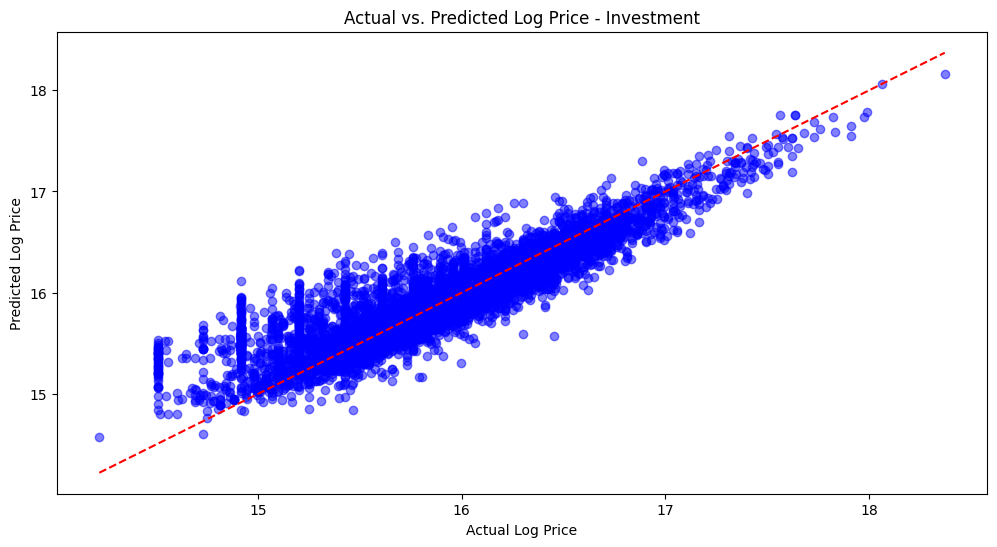

Best Parameters for Investment: {'n_estimators': 301, 'learning_rate': 0.08684123841905296, 'max_depth': 3, 'subsample': 0.6149374792493834, 'colsample_bytree': 0.5029655248858078}
RMSE for Investment: 0.1618

📈 Final RMSE Results:
RMSE for OwnerOccupier: 0.0775
RMSE for Investment: 0.1618


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import optuna


# Define Time-Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Store trial results for later analysis
trial_results = []

# Function for Optuna Optimization with Time-Series CV
def optimize_xgboost(trial, X, y, title):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1),
        "random_state": 14
    }

    rmse_scores = []  # Store RMSE for each fold

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Train XGBoost model
        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train)

        # Make predictions & compute RMSE
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

        # Print real-time RMSE for each fold
        print(f"Trial {trial.number} | {title} | Fold {fold+1} | RMSE: {rmse:.4f}")

    # Compute average RMSE across folds
    avg_rmse = np.mean(rmse_scores)

    # 🔹 Print final RMSE for this trial
    print(f"Trial {trial.number} Completed | {title} | Average RMSE: {avg_rmse:.4f}")

    # Save trial details for later analysis
    trial_results.append({"trial": trial.number, "rmse": avg_rmse, **params})

    return avg_rmse  # Optuna will minimize this value

# Train XGBoost with Optuna Optimization (Now Using Time-Series CV)
def train_xgboost_with_optuna(X, y, title):
    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: optimize_xgboost(trial, X, y, title), n_trials=20)
    best_params = study.best_params
    best_model = xgb.XGBRegressor(**best_params)
    best_model.fit(X, y)

    # Make predictions
    y_pred = best_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Plot predicted vs actual values
    plt.figure(figsize=(12, 6))
    plt.scatter(y, y_pred, alpha=0.5, color="blue")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
    plt.xlabel("Actual Log Price")
    plt.ylabel("Predicted Log Price")
    plt.title(f"Actual vs. Predicted Log Price - {title}")
    plt.show()

    print(f"Best Parameters for {title}: {best_params}")
    print(f"RMSE for {title}: {rmse:.4f}")

    return best_model, y_pred, rmse


print("🔹 Training XGBoost model with Time-Series CV for OwnerOccupier properties...")
xgb_owner_final, y_pred_owner, rmse_owner = train_xgboost_with_optuna(X_owner, y_owner, "OwnerOccupier")

print("🔹 Training XGBoost model with Time-Series CV for Investment properties...")
xgb_investment_final, y_pred_investment, rmse_investment = train_xgboost_with_optuna(x_investment, y_investment, "Investment")

print(f"\n📈 Final RMSE Results:")
print(f"RMSE for OwnerOccupier: {rmse_owner:.4f}")
print(f"RMSE for Investment: {rmse_investment:.4f}")



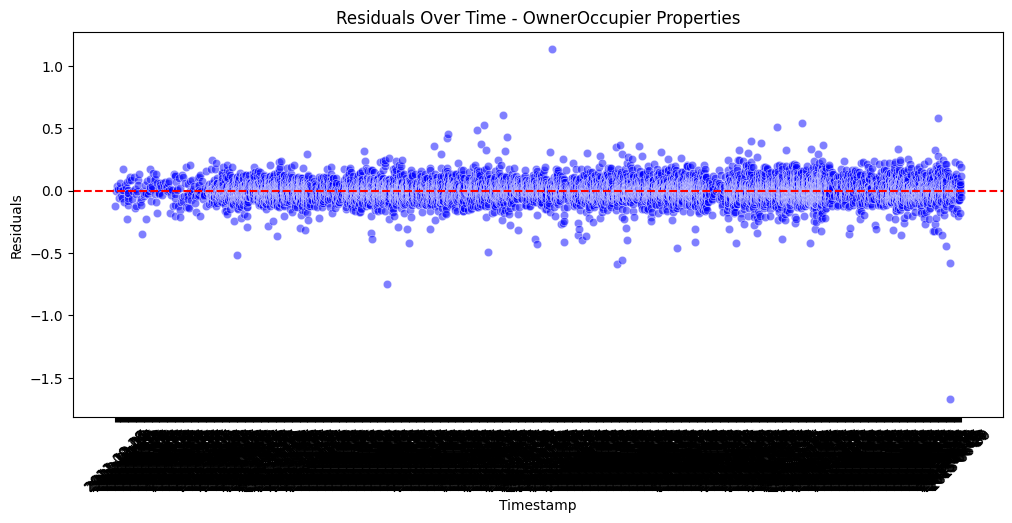

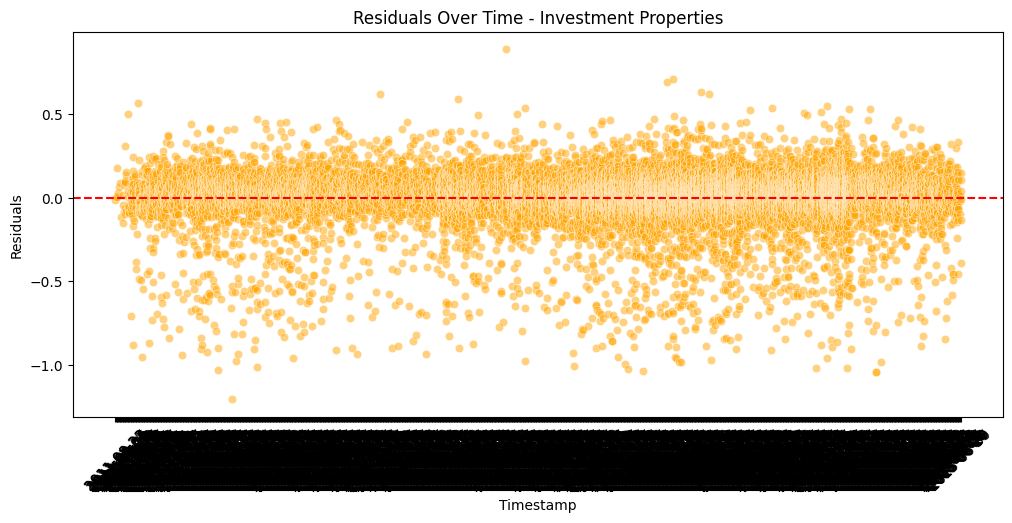

In [ ]:

# Retrieve timestamps correctly
owner_timestamps = train_original.loc[X_owner.index.intersection(train_original.index), "timestamp"]
investment_timestamps = train_original.loc[X_investment.index.intersection(train_original.index), "timestamp"]

# Compute Residuals
residuals_owner = y_owner - y_pred_owner
residuals_investment = y_investment - y_pred_investment

# Create DataFrames for Visualization
owner_residuals_df = pd.DataFrame({"timestamp": owner_timestamps, "residuals": residuals_owner})
investment_residuals_df = pd.DataFrame({"timestamp": investment_timestamps, "residuals": residuals_investment})

# Sort by timestamp to maintain chronological order
owner_residuals_df = owner_residuals_df.sort_values(by="timestamp")
investment_residuals_df = investment_residuals_df.sort_values(by="timestamp")

# Plot residuals over time for OwnerOccupier properties
plt.figure(figsize=(12, 5))
sns.scatterplot(x=owner_residuals_df["timestamp"], y=owner_residuals_df["residuals"], alpha=0.5, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals Over Time - OwnerOccupier Properties")
plt.xlabel("Timestamp")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()

# Plot residuals over time for Investment properties
plt.figure(figsize=(12, 5))
sns.scatterplot(x=investment_residuals_df["timestamp"], y=investment_residuals_df["residuals"], alpha=0.5, color="orange")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals Over Time - Investment Properties")
plt.xlabel("Timestamp")
plt.ylabel("Residuals")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Ensure the 'id' column is correctly assigned before dropping it for prediction
X_test_prepared_df["id"] = test.loc[X_test_prepared_df.index, "id"]

# Drop 'id' column before making predictions to avoid feature mismatch
test_features_owner = X_test_prepared_df[X_test_prepared_df['product_type_OwnerOccupier'] == 1].drop(columns=['id', 'log_price_doc', 'price_doc'], errors='ignore')
test_features_investment = X_test_prepared_df[X_test_prepared_df['product_type_Investment'] == 1].drop(columns=['id', 'log_price_doc', 'price_doc'], errors='ignore')

# Generate Predictions on Test Data
y_test_pred_owner = xgb_owner_final.predict(test_features_owner)
y_test_pred_investment = xgb_investment_final.predict(test_features_investment)

# Assign predictions back to the test dataset
X_test_prepared_df.loc[X_test_prepared_df['product_type_OwnerOccupier'] == 1, 'log_price_doc'] = y_test_pred_owner
X_test_prepared_df.loc[X_test_prepared_df['product_type_Investment'] == 1, 'log_price_doc'] = y_test_pred_investment

# Convert log predictions back to original scale
X_test_prepared_df['price_doc'] = np.expm1(X_test_prepared_df['log_price_doc'])

# Ensure test dataset is sorted by 'id'
submission = X_test_prepared_df[['id', 'price_doc']].sort_values(by='id')

# Save the submission file
submission.to_csv('submission3.csv', index=False)

print("Predictions completed and saved in original order!")


Predictions completed and saved in original order!


In [ ]:
submission_file = "submission3.csv"
submission.to_csv(submission_file, index=False)

# 🚀 Step 7: Provide a Download Link
from google.colab import files
files.download(submission_file)

print(f"✅ Predictions saved successfully: {submission_file}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Predictions saved successfully: submission3.csv


In [ ]:
# Compute residuals for OwnerOccupier model
residuals_owner = y_owner - xgb_owner_final.predict(X_owner)

# Compute residuals for Investment model
residuals_investment = y_investment - xgb_investment_final.predict(x_investment)



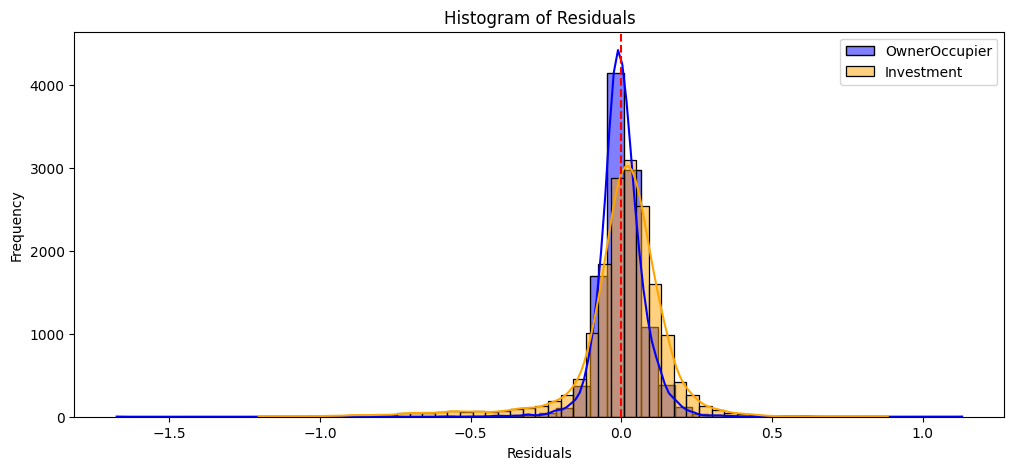

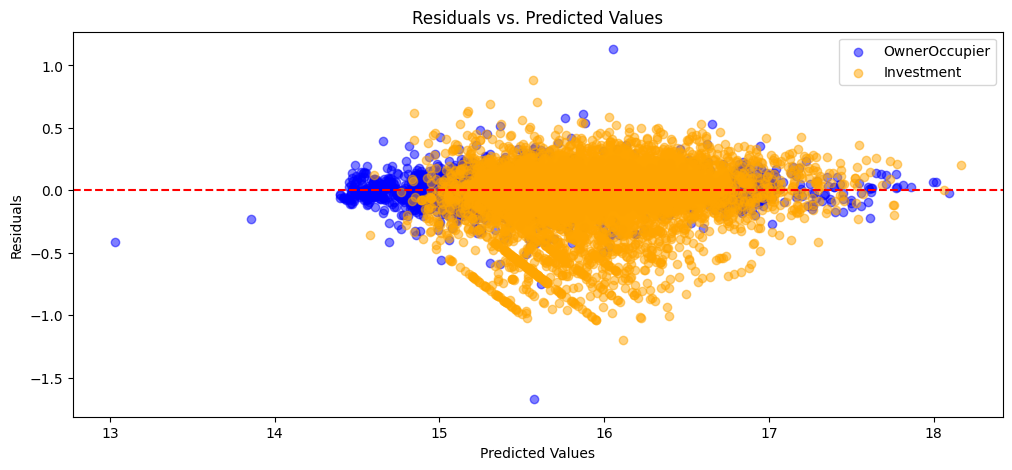

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.histplot(residuals_owner, bins=50, kde=True, color="blue", label="OwnerOccupier")
sns.histplot(residuals_investment, bins=50, kde=True, color="orange", label="Investment")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.show()


plt.figure(figsize=(12, 5))
plt.scatter(xgb_owner_final.predict(x_owner), residuals_owner, alpha=0.5, color="blue", label="OwnerOccupier")
plt.scatter(xgb_investment_final.predict(x_investment), residuals_investment, alpha=0.5, color="orange", label="Investment")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.legend()
plt.show()



In [ ]:
import numpy as np

# Compute summary statistics
summary_owner = {
    "Mean": np.mean(residuals_owner),
    "Median": np.median(residuals_owner),
    "Standard Deviation": np.std(residuals_owner),
    "Min": np.min(residuals_owner),
    "Max": np.max(residuals_owner)
}

summary_investment = {
    "Mean": np.mean(residuals_investment),
    "Median": np.median(residuals_investment),
    "Standard Deviation": np.std(residuals_investment),
    "Min": np.min(residuals_investment),
    "Max": np.max(residuals_investment)
}

print("OwnerOccupier Residual Summary:", summary_owner)
print("Investment Residual Summary:", summary_investment)


OwnerOccupier Residual Summary: {'Mean': -3.519581195655437e-05, 'Median': -0.003186697380810344, 'Standard Deviation': 0.07753636349531458, 'Min': -1.6738616969792801, 'Max': 1.1302584205363253}
Investment Residual Summary: {'Mean': 0.00024437236806961187, 'Median': 0.018730415413929613, 'Standard Deviation': 0.16178017114748366, 'Min': -1.2029994701808224, 'Max': 0.8837709924553678}


In [ ]:
# Compute residuals
residuals_owner = y_owner - xgb_owner_final.predict(x_owner)

# Compute IQR for outlier detection
Q1 = np.percentile(residuals_owner, 25)
Q3 = np.percentile(residuals_owner, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_owner = (residuals_owner < lower_bound) | (residuals_owner > upper_bound)

# Get the indices of outliers
outlier_ids = y_owner.index[outliers_owner]

# Remove outliers from both X_owner and y_owner
x_owner_cleaned = x_owner.drop(index=outlier_ids)
y_owner_cleaned = y_owner.drop(index=outlier_ids)

print(f"Removed {len(outlier_ids)} outliers from OwnerOccupier dataset.")


Removed 509 outliers from OwnerOccupier dataset.


In [ ]:
# Retrieve best parameters from previous Optuna study
best_params_owner = xgb_owner_final.get_params()  # Get the best params from the previous trained model

# Train a new model using the cleaned dataset
xgb_owner_refit = xgb.XGBRegressor(**best_params_owner)
xgb_owner_refit.fit(x_owner_cleaned, y_owner_cleaned)

# Make predictions on training data
y_pred_owner_refit = xgb_owner_refit.predict(x_owner_cleaned)

# Compute new RMSE
rmse_owner_refit = np.sqrt(mean_squared_error(y_owner_cleaned, y_pred_owner_refit))

print(f"📉 New RMSE after outlier removal: {rmse_owner_refit:.4f}")


📉 New RMSE after outlier removal: 0.0544


In [ ]:
# Ensure 'id' column is correctly assigned before making predictions
X_test_prepared_df["id"] = test.loc[X_test_prepared_df.index, "id"]

# Drop 'id' and any unnecessary columns to match training features
test_features_owner = X_test_prepared_df[X_test_prepared_df['product_type_OwnerOccupier'] == 1].drop(columns=['id', 'log_price_doc', 'price_doc'], errors='ignore')
test_features_investment = X_test_prepared_df[X_test_prepared_df['product_type_Investment'] == 1].drop(columns=['id', 'log_price_doc', 'price_doc'], errors='ignore')

# Generate Predictions using the trained models
y_test_pred_owner = xgb_owner_refit.predict(test_features_owner)
y_test_pred_investment = xgb_investment_final.predict(test_features_investment)

# Assign predictions back to the test dataset
X_test_prepared_df.loc[X_test_prepared_df['product_type_OwnerOccupier'] == 1, 'log_price_doc'] = y_test_pred_owner
X_test_prepared_df.loc[X_test_prepared_df['product_type_Investment'] == 1, 'log_price_doc'] = y_test_pred_investment

# Convert log predictions back to original scale
X_test_prepared_df['price_doc'] = np.expm1(X_test_prepared_df['log_price_doc'])

# Merge predictions back into original test dataset to preserve order
submission = test[['id']].merge(X_test_prepared_df[['id', 'price_doc']], on='id', how='left')

# Save the submission file
submission.to_csv('submission_final.csv', index=False)

print("✅ Final predictions completed and saved in original order!")


# Save the final predictions to a CSV file
submission_file = 'submission_final.csv'
submission.to_csv(submission_file, index=False)

# Provide a download link
from google.colab import files
files.download(submission_file)

print("✅ Final predictions completed and saved as 'submission_final.csv'!")

✅ Final predictions completed and saved in original order!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Final predictions completed and saved as 'submission_final.csv'!


In [ ]:
# Ensure 'id' column is correctly assigned before making predictions
X_test_prepared_df["id"] = test.loc[X_test_prepared_df.index, "id"]

# Drop 'id' and any other unnecessary columns to match training features
test_features_owner = X_test_prepared_df[X_test_prepared_df['product_type_OwnerOccupier'] == 1].drop(columns=['id', 'log_price_doc', 'price_doc'], errors='ignore')
test_features_investment = X_test_prepared_df[X_test_prepared_df['product_type_Investment'] == 1].drop(columns=['id', 'log_price_doc', 'price_doc'], errors='ignore')

# Generate Predictions using the newly trained models
y_test_pred_owner = xgb_owner_refit.predict(test_features_owner)
y_test_pred_investment = xgb_investment_final.predict(test_features_investment)  # Use the best investment model

# Assign predictions back to the test dataset
X_test_prepared_df.loc[X_test_prepared_df['product_type_OwnerOccupier'] == 1, 'log_price_doc'] = y_test_pred_owner
X_test_prepared_df.loc[X_test_prepared_df['product_type_Investment'] == 1, 'log_price_doc'] = y_test_pred_investment

# Convert log predictions back to original scale
X_test_prepared_df['price_doc'] = np.expm1(X_test_prepared_df['log_price_doc'])

# Ensure test dataset is sorted by 'id'
submission = X_test_prepared_df[['id', 'price_doc']].sort_values(by='id')


In [ ]:
# Save the final predictions to a CSV file
submission_file = 'submission_final.csv'
submission.to_csv(submission_file, index=False)

# Provide a download link
from google.colab import files
files.download(submission_file)

print("✅ Final predictions completed and saved as 'submission_final.csv'!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Final predictions completed and saved as 'submission_final.csv'!
